In [1]:
# to auto reload the modified module
% load_ext autoreload
% autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import gc

from utils import *
from data import MnistTF
from nn_kd import *
from layers import *
# from models import *

/home/deep3072/anaconda2/envs/tu36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
# check_available_device()
# seed settings
set_rand_seed(0)
gpu_id = '1'

In [4]:
# read Mnist data
try_cls2 = True
if try_cls2:
    mnist = MnistTF()
    X_train, y_train = mnist.get_train_data()
    X_val, y_val = mnist.get_validation_data()
    X_test, y_test = mnist.get_test_data()
    print_obj(X_train, 'X_train')
    print_obj(y_train, 'y_train')
    print_obj(X_val, 'X_val')
    print_obj(y_val, 'y_val')
    print_obj(X_test, 'X_test')
    print_obj(y_test, 'y_test')
    input_dims = X_train.shape[1]
    output_dims = y_train.shape[1]
    print_obj(input_dims, 'input_dims')
    print_obj(output_dims, 'output_dims')


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
X_train <class 'numpy.ndarray'> (55000, 784)
y_train <class 'numpy.ndarray'> (55000, 10)
X_val <class 'numpy.ndarray'> (5000, 784)
y_val <class 'numpy.ndarray'> (5000, 10)
X_test <class 'numpy.ndarray'> (10000, 784)
y_test <class 'numpy.ndarray'> (10000, 10)
input_dims <class 'int'> 784
output_dims <class 'int'> 10


In [5]:
def build_big_model(input_dims, output_dims, gpu_id):#, session):
    # session settings
    session = create_session(gpu_id=gpu_id)
#     tf.reset_default_graph()
    bigmodel = SoftenedNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

    bigmodel.add_layer(
        Dropout(inputs=bigmodel.h[-1], keep_prob=0.6))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
    bigmodel.add_layer(
        Dropout(inputs=bigmodel.h[-1], keep_prob=0.5))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
    bigmodel.add_layer(
        Dropout(inputs=bigmodel.h[-1], keep_prob=0.5))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    bigmodel.compile_nn(
        loss=tf.losses.softmax_cross_entropy(bigmodel.ys,bigmodel.logits)
        , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
        , metrics = ['acc'])

    return bigmodel

In [6]:
if try_cls2:
#     teacher = build_big_model(input_dims, output_dims, session)
    teacher = build_big_model(input_dims, output_dims, gpu_id)
    teacher.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=100
        ,display_steps=100
        ,earlystop_params={'monitor':'val_acc', 'patience':10}
    )

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7331639865579789681
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10965028045
locality {
  bus_id: 1
}
incarnation: 8904252214174032317
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 16.202784 , acc = 0.27 
Epoch 1 , step 100 , loss= 1.5513296 , acc = 0.92 
Epoch 1 , step 200 , loss= 1.1636225 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.7159252 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.77447504 , acc = 0.92 
Epoch 1 , step 500 , loss= 0.62275606 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.5494183 val_loss= 0.23145102 , acc = 0.9 val acc = 0.9408 
Epoch 1 finished, loss= 1.3697438 val loss= 0.23145102 ,  acc = 0.89836365 val acc = 0.9408
val_acc improved. 
Epoch 2 , step 50 , loss= 0.57670397 , acc = 0.96 
Epoch 2 , step 150 , loss= 0.53620386 , acc = 0.93 
Epoch 2 , step 250 , loss= 0.38348544 ,

Epoch 17 , step 300 , loss= 0.14143053 , acc = 0.98 
Epoch 17 , step 400 , loss= 0.18732335 , acc = 0.97 
Epoch 17 , step 500 , loss= 0.16143109 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.09426209 val_loss= 0.06068251 , acc = 0.97 val acc = 0.9808 
Epoch 17 finished, loss= 0.14346823 val loss= 0.06068251 ,  acc = 0.9884 val acc = 0.9808

Epoch 18 , step 50 , loss= 0.24613239 , acc = 0.98 
Epoch 18 , step 150 , loss= 0.19985804 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.13083194 , acc = 0.98 
Epoch 18 , step 350 , loss= 0.11590569 , acc = 0.98 
Epoch 18 , step 450 , loss= 0.06752834 , acc = 0.98 
Epoch 18 , step 549 , loss= 0.07478574 val_loss= 0.062373683 , acc = 1.0 val acc = 0.9828 
Epoch 18 finished, loss= 0.14272371 val loss= 0.062373683 ,  acc = 0.98861814 val acc = 0.9828
val_acc improved. 
Epoch 19 , step 0 , loss= 0.15257287 , acc = 0.98 
Epoch 19 , step 100 , loss= 0.075381696 , acc = 0.99 
Epoch 19 , step 200 , loss= 0.07513737 , acc = 0.97 
Epoch 19 , step 300 , loss= 0.14

Epoch 34 , step 450 , loss= 0.20380498 , acc = 0.97 
Epoch 34 , step 549 , loss= 0.08145986 val_loss= 0.056292303 , acc = 0.99 val acc = 0.9832 
Epoch 34 finished, loss= 0.10584821 val loss= 0.056292303 ,  acc = 0.99381816 val acc = 0.9832

Epoch 35 , step 0 , loss= 0.025713554 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.18849225 , acc = 0.99 
Epoch 35 , step 200 , loss= 0.17467219 , acc = 0.98 
Epoch 35 , step 300 , loss= 0.104946375 , acc = 0.99 
Epoch 35 , step 400 , loss= 0.123296626 , acc = 0.98 
Epoch 35 , step 500 , loss= 0.09068784 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.04321132 val_loss= 0.055940602 , acc = 1.0 val acc = 0.9836 
Epoch 35 finished, loss= 0.11388302 val loss= 0.055940602 ,  acc = 0.9943455 val acc = 0.9836

Epoch 36 , step 50 , loss= 0.0989928 , acc = 0.99 
Epoch 36 , step 150 , loss= 0.33965242 , acc = 0.98 
Epoch 36 , step 250 , loss= 0.101629525 , acc = 0.99 
Epoch 36 , step 350 , loss= 0.028124135 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.05843418 , acc 

Plotting loss...


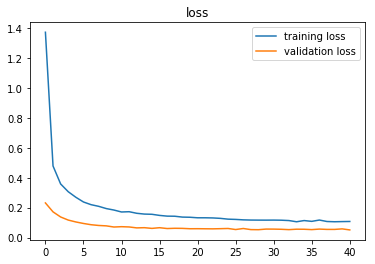

Plotting metrics...


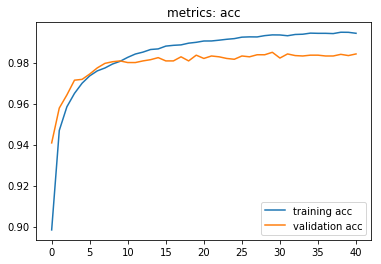

train {'acc': 0.99436367}
test {'acc': 0.9844}


In [7]:
if try_cls2:
#     gc.collect()
    teacher.plt_loss()
    teacher.plt_metrics()
    train_metric = teacher.get_metrics(X_train, y_train)
    test_metric = teacher.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

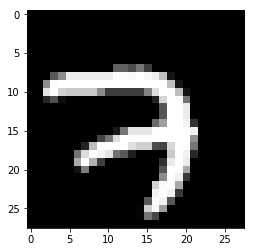

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[2.0376690e-11 2.2473094e-07 4.3459916e-03 3.3712317e-03 6.6747958e-09
 3.4645891e-09 7.4924008e-17 9.9227953e-01 9.4940425e-08 3.0387789e-06]


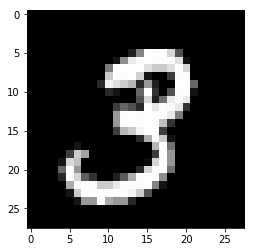

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[4.6813069e-13 1.1798041e-09 3.2066133e-08 9.9983513e-01 4.9451155e-13
 2.1557009e-06 2.7908381e-18 1.3861417e-07 1.5245911e-04 1.0111862e-05]


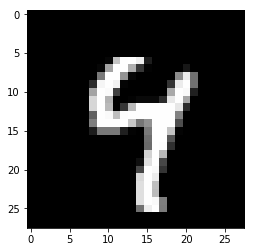

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[4.6443314e-12 2.7090949e-10 7.0566203e-10 2.6109437e-09 9.9917775e-01
 1.8199880e-07 2.4690817e-11 1.2918460e-06 2.9795743e-07 8.2039047e-04]


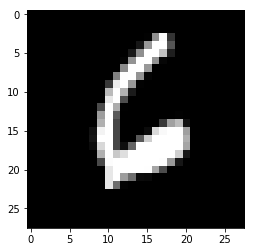

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[1.6211693e-07 6.4087367e-11 1.8501494e-08 2.0552597e-10 1.4038492e-06
 4.0668583e-06 9.9999416e-01 2.2920790e-13 8.8205944e-08 1.7994278e-08]


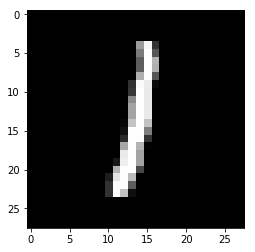

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.8854319e-21 1.0000000e+00 5.2893692e-15 1.6433759e-17 6.1630490e-14
 2.5545012e-18 1.3780259e-15 3.7917898e-11 2.3177882e-13 1.9627046e-16]


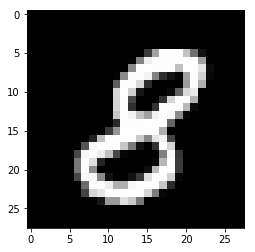

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2.3694979e-06 2.7491203e-07 8.8657634e-06 1.5337993e-05 2.1633251e-09
 3.1150518e-07 1.6992972e-08 1.0906094e-09 9.9997211e-01 7.5888784e-07]


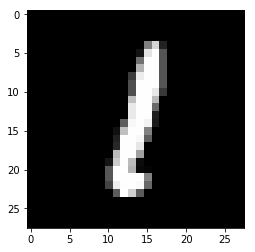

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[8.1861681e-18 1.0000000e+00 1.2794398e-14 1.7772521e-17 3.5349534e-13
 8.0508960e-18 7.7848926e-15 1.4973296e-10 6.0190481e-12 8.4489668e-16]


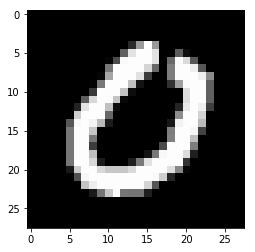

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.0000000e+00 4.6762513e-28 4.0578210e-15 4.5453000e-18 5.0255926e-16
 7.8844586e-19 1.0196023e-12 3.2585879e-14 7.8295019e-16 2.5748599e-11]


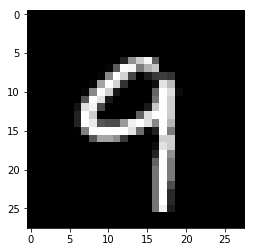

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[2.9037089e-14 4.0339963e-16 4.5607036e-11 5.8937439e-07 9.0094081e-06
 2.3140290e-09 2.4167288e-20 1.9003468e-07 1.4540003e-08 9.9999022e-01]


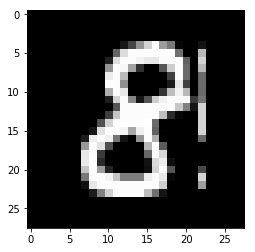

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[4.4408594e-08 5.5709144e-08 1.1111174e-06 6.6140606e-06 1.9625988e-09
 9.8739804e-08 2.8065728e-09 1.1788209e-10 9.9999201e-01 2.0686013e-08]


In [8]:
if try_cls2:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = teacher
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

## Small Model and Student Model

In [9]:

def build_small_model(input_dims, output_dims, is_student, gpu_id):#, session):
    # session settings
    session = create_session(gpu_id=gpu_id)
#     tf.reset_default_graph()
    smallmodel = StudentNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=512,activation_fn=tf.nn.relu))
    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=512,activation_fn=tf.nn.relu))
    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    if is_student:
        smallmodel.compile_student(
            loss_standard=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3) #TODO: learning rate
            , metrics = ['acc']
        )
    else:
        smallmodel.compile_nn(
            loss=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
            , metrics = ['acc']
        )
    return smallmodel

### Training Small Model without Teacher

In [10]:
train_small = True
# gc.collect()
if try_cls2 and train_small:
#     small = build_small_model(input_dims, output_dims, session, is_student=False)
    small = build_small_model(input_dims, output_dims, is_student=False, gpu_id=gpu_id)
    small.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=50
        ,display_steps=100
        ,earlystop_params={'monitor':'val_acc', 'patience':10}
    )

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11150053489734643074
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 17824641066033405360
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.1323507 , acc = 0.27 
Epoch 1 , step 100 , loss= 0.2737893 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.15508327 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.1299823 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.21411486 , acc = 0.94 
Epoch 1 , step 500 , loss= 0.19228701 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.14866343 val_loss= 0.09754912 , acc = 0.97 val acc = 0.9706 
Epoch 1 finished, loss= 0.2141149 val loss= 0.09754912 ,  acc = 0.94696367 val acc = 0.9706
val_acc improved. 
Epoch 2 , step 50 , loss= 0.181115 , acc = 0.96 
Epoch 2 , step 150 , loss= 0.05687738 , acc = 1.0 
Epoch 2 , step 250 , loss= 0.059836727

Epoch 17 , step 300 , loss= 0.023311008 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.00020908467 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.0015144023 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.018120134 val_loss= 0.086465836 , acc = 1.0 val acc = 0.982 
Epoch 17 finished, loss= 0.008342384 val loss= 0.086465836 ,  acc = 0.9998363 val acc = 0.982

Epoch 18 , step 50 , loss= 0.0016317621 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0008680999 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.025424628 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0015418829 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.00057087914 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.023640497 val_loss= 0.11094543 , acc = 1.0 val acc = 0.9826 
Epoch 18 finished, loss= 0.012825509 val loss= 0.11094543 ,  acc = 0.99956363 val acc = 0.9826

Epoch 19 , step 0 , loss= 0.0011097463 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.051584702 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.0015117556 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.0007950

Epoch 34 , step 250 , loss= 0.00017644287 , acc = 1.0 
Epoch 34 , step 350 , loss= 7.432703e-05 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.05147162 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.025185907 val_loss= 0.15555239 , acc = 1.0 val acc = 0.9834 
Epoch 34 finished, loss= 0.007455007 val loss= 0.15555239 ,  acc = 0.9998 val acc = 0.9834

Epoch 35 , step 0 , loss= 0.12681006 , acc = 0.99 
Epoch 35 , step 100 , loss= 6.806776e-07 , acc = 1.0 
Epoch 35 , step 200 , loss= 6.655366e-05 , acc = 1.0 
Epoch 35 , step 300 , loss= 3.1643285e-05 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.006010268 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.0018893081 , acc = 1.0 
Epoch 35 , step 549 , loss= 7.16442e-07 val_loss= 0.14587174 , acc = 1.0 val acc = 0.9832 
Epoch 35 finished, loss= 0.005646787 val loss= 0.14587174 ,  acc = 0.9998908 val acc = 0.9832

Epoch 36 , step 50 , loss= 8.289981e-06 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.00073328766 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.03720479 , 

Small model
Plotting loss...


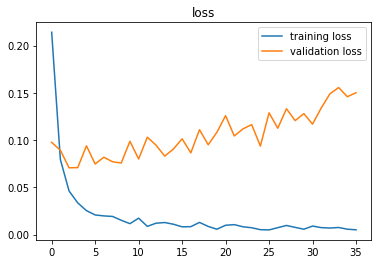

Plotting metrics...


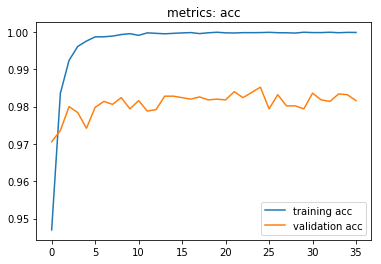

train {'acc': 0.9983818}
test {'acc': 0.983}


In [11]:
if try_cls2 and train_small:
    print('Small model')
    small.plt_loss()
    small.plt_metrics()
    train_metric = small.get_metrics(X_train, y_train)
    test_metric = small.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

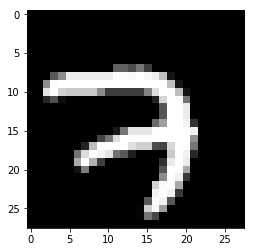

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.1037335e-22 3.1959589e-18 7.8359227e-07 2.3974239e-06 2.9681909e-29
 8.7657246e-23 4.8414689e-29 9.9999678e-01 1.6195533e-25 2.2377168e-20]


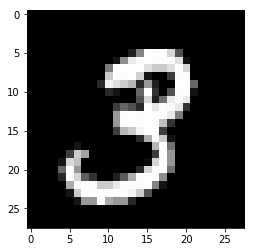

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[7.7033253e-31 7.9158244e-28 1.8194891e-24 1.0000000e+00 1.8114750e-33
 4.2579169e-15 2.5693803e-37 2.8544906e-29 6.2241794e-15 2.4222020e-13]


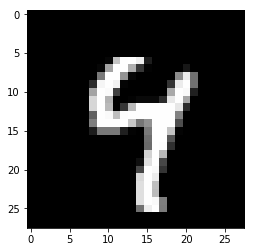

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[5.1723916e-22 3.9666332e-19 1.5978683e-17 1.7359738e-15 9.8554623e-01
 9.9549020e-18 3.8478568e-23 4.3320944e-14 3.0136138e-14 1.4453691e-02]


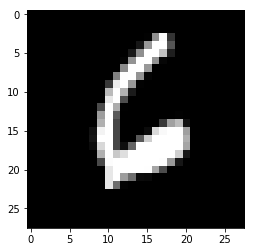

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[7.6602785e-16 2.7163833e-16 1.2848310e-12 4.7945895e-18 5.7891517e-14
 4.1244636e-13 1.0000000e+00 3.0428203e-16 5.5195604e-14 1.8845227e-15]


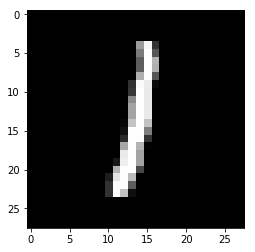

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.4447812e-26 1.0000000e+00 4.6754553e-25 1.1137677e-25 2.5121290e-16
 1.6963782e-23 2.0352386e-23 5.6096409e-16 9.4127214e-14 9.0454009e-20]


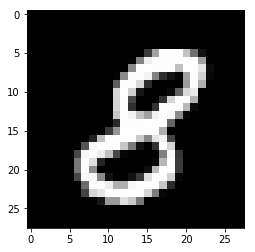

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1.3728403e-25 2.7196295e-23 2.3929960e-17 8.4142487e-19 2.2023492e-29
 4.6621119e-19 4.6825901e-27 5.7237139e-29 1.0000000e+00 7.3934490e-24]


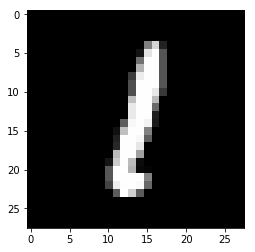

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.90696268e-26 1.00000000e+00 2.30057746e-23 1.32820375e-25
 2.14475674e-17 1.21731877e-24 1.03183025e-22 1.12052682e-17
 2.05283964e-13 1.89087447e-22]


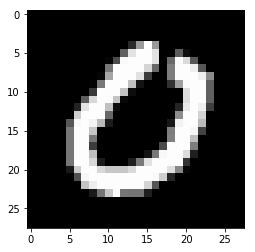

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.0000000e+00 0.0000000e+00 5.5130160e-29 0.0000000e+00 4.9409305e-29
 0.0000000e+00 2.0090373e-28 4.8770686e-24 3.2355500e-36 3.5697426e-26]


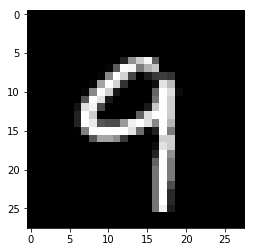

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[4.8703162e-18 3.1542720e-23 6.2370350e-16 3.1522686e-12 1.6269619e-13
 1.6560268e-15 1.3090921e-28 4.4961906e-16 2.8804666e-16 1.0000000e+00]


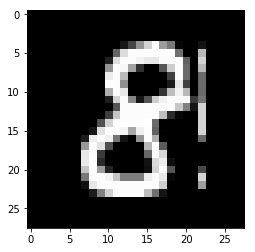

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1.5438897e-19 1.3803058e-20 8.6014381e-12 6.1451453e-15 2.3575710e-22
 1.2565430e-20 3.2859650e-20 4.2484407e-23 1.0000000e+00 7.4283210e-20]


In [12]:
if try_cls2 and train_small:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = small
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

### Experiments on Students without Effect of $T^2$

Training student with temperature = 5 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1357023015253845120
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 16588598338139207806
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.0978756 , acc = 0.42 
Epoch 1 , step 100 , loss= 0.14588137 , acc = 0.97 
Epoch 1 , step 200 , loss= 0.11430784 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.12161285 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.18135075 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.12113598 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.12180284 val_loss= 0.10932195 , acc = 0.96 val acc = 0.9698 
Epoch 1 finished, loss= 0.22268787 val loss= 0.10932195 ,  acc = 0.94598186 val acc = 0.9698
val_acc improved. 
Epoch 2 , step 50 , loss= 0.0289067

Epoch 17 , step 100 , loss= 0.00087762234 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.0049731852 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.00023048698 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0011045843 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.0055188327 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0026771096 val_loss= 0.11409591 , acc = 1.0 val acc = 0.9826 
Epoch 17 finished, loss= 0.010833163 val loss= 0.11409591 ,  acc = 0.99961823 val acc = 0.9826
val_acc improved. 
Epoch 18 , step 50 , loss= 0.0072373785 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.00030832604 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0033219103 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.00013606278 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.00043300976 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0011176395 val_loss= 0.11915984 , acc = 1.0 val acc = 0.9782 
Epoch 18 finished, loss= 0.0072419783 val loss= 0.11915984 ,  acc = 0.9998545 val acc = 0.9782

Epoch 19 , step 0 , loss= 0.0008173925 , acc = 1.0 
Epoch 19 ,

Epoch 34 , step 50 , loss= 4.167405e-06 , acc = 1.0 
Epoch 34 , step 150 , loss= 3.3987424e-05 , acc = 1.0 
Epoch 34 , step 250 , loss= 0.0067705293 , acc = 1.0 
Epoch 34 , step 350 , loss= 7.7666184e-05 , acc = 1.0 
Epoch 34 , step 450 , loss= 4.7945963e-05 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.000413834 val_loss= 0.14798063 , acc = 1.0 val acc = 0.9818 
Epoch 34 finished, loss= 0.00494359 val loss= 0.14798063 ,  acc = 0.9998545 val acc = 0.9818

Epoch 35 , step 0 , loss= 0.0005113866 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.02572669 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.0008196187 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.009178936 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.0018427924 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.0001940531 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.01996284 val_loss= 0.12772258 , acc = 1.0 val acc = 0.9842 
Epoch 35 finished, loss= 0.00512572 val loss= 0.12772258 ,  acc = 0.99983644 val acc = 0.9842

Epoch 36 , step 50 , loss= 5.762319e-06

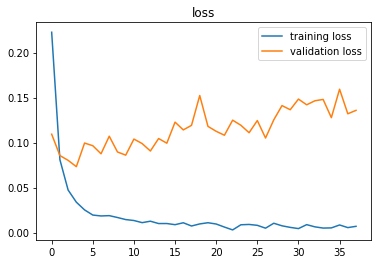

Plotting metrics...


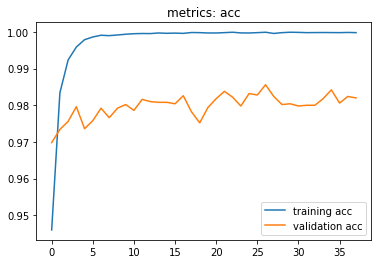

train {'acc': 0.99872726}
test {'acc': 0.9809}

Training student with temperature = 5 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15538800525235170201
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 14234454809632872438
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.1153216 , acc = 0.3 
Epoch 1 , step 100 , loss= 0.5426965 , acc = 0.92 
Epoch 1 , step 200 , loss= 0.47141752 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.4099211 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.40934747 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.3719375 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.48086742 val_loss= 0.3056012 , acc = 0.96 val acc = 0.9666 
Epoch 1 finished, loss= 0.44319335 val loss= 0.3056012 ,  acc = 0.9440727 val acc = 0.9666
val_acc im

Epoch 17 , step 500 , loss= 0.20265092 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.20862098 val_loss= 0.24318786 , acc = 1.0 val acc = 0.983 
Epoch 17 finished, loss= 0.23271082 val loss= 0.24318786 ,  acc = 0.9971454 val acc = 0.983

Epoch 18 , step 50 , loss= 0.21777496 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.22383384 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.21269967 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.2050125 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.20686153 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.18664417 val_loss= 0.23445445 , acc = 1.0 val acc = 0.9848 
Epoch 18 finished, loss= 0.20350741 val loss= 0.23445445 ,  acc = 0.9998726 val acc = 0.9848

Epoch 19 , step 0 , loss= 0.17571124 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.17512368 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.22848779 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.18501624 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.22648463 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.1656303 , acc = 1.0 
Epoch 19 , step

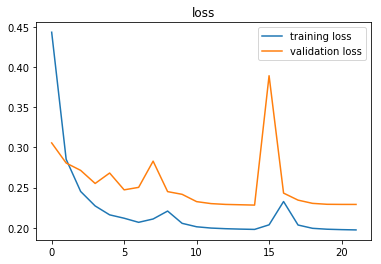

Plotting metrics...


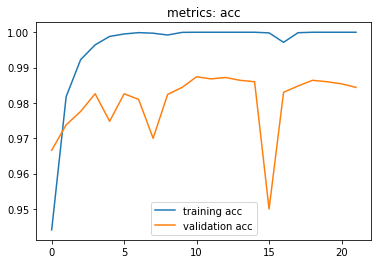

train {'acc': 1.0}
test {'acc': 0.9845}

Training student with temperature = 5 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18188947792561798113
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 18029003057985574570
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.159223 , acc = 0.37 
Epoch 1 , step 100 , loss= 0.7526043 , acc = 0.91 
Epoch 1 , step 200 , loss= 0.5550374 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.5025315 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.48598856 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.47268286 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.4406969 val_loss= 0.4918248 , acc = 0.98 val acc = 0.9616 
Epoch 1 finished, loss= 0.6182737 val loss= 0.4918248 ,  acc = 0.94245464 val acc = 0.9616
val_acc improved. 
E

Epoch 17 , step 400 , loss= 0.37947115 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.45884567 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.42208496 val_loss= 0.43473303 , acc = 1.0 val acc = 0.9794 
Epoch 17 finished, loss= 0.3962548 val loss= 0.43473303 ,  acc = 0.9999636 val acc = 0.9794

Epoch 18 , step 50 , loss= 0.39871892 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.4610689 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.43059325 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.38004145 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.33064735 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.38598278 val_loss= 0.41294304 , acc = 1.0 val acc = 0.9848 
Epoch 18 finished, loss= 0.40900037 val loss= 0.41294304 ,  acc = 0.9993818 val acc = 0.9848

Epoch 19 , step 0 , loss= 0.3403432 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.35625586 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.40485495 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.47248912 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.47256136 , acc = 1.0 
Epoch 19 , ste

Epoch 35 , step 200 , loss= 0.35666582 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.40719438 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.4116325 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.40253457 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.44214204 val_loss= 0.40552726 , acc = 1.0 val acc = 0.986 
Epoch 35 finished, loss= 0.3905248 val loss= 0.40552726 ,  acc = 1.0 val acc = 0.986

Epoch 36 , step 50 , loss= 0.40697598 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.38582137 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.38103193 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.41605055 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.37787545 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.3934828 val_loss= 0.4056908 , acc = 1.0 val acc = 0.9854 
Epoch 36 finished, loss= 0.3902638 val loss= 0.4056908 ,  acc = 1.0 val acc = 0.9854

Epoch 37 , step 0 , loss= 0.43801242 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.38696438 , acc = 1.0 
Epoch 37 , step 200 , loss= 0.36847615 , acc = 1.0 
Epoch 37 , step 300 , loss= 0.4

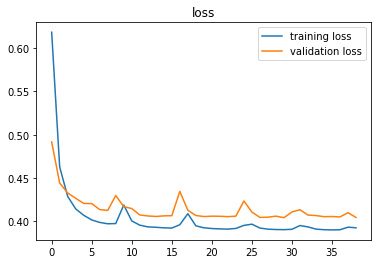

Plotting metrics...


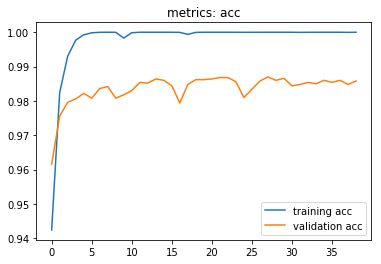

train {'acc': 1.0}
test {'acc': 0.9862}

Training student with temperature = 5 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5911340886422554511
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 6681911144491844892
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.6953502 , acc = 0.29 
Epoch 1 , step 100 , loss= 0.9267644 , acc = 0.91 
Epoch 1 , step 200 , loss= 0.7931916 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.69168335 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.6171973 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.6104011 , acc = 0.99 
Epoch 1 , step 549 , loss= 0.70628375 val_loss= 0.62938786 , acc = 0.97 val acc = 0.9714 
Epoch 1 finished, loss= 0.75882745 val loss= 0.62938786 ,  acc = 0.94640005 val acc = 0.9714
val_acc improved

Epoch 17 , step 500 , loss= 0.57371163 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.6876511 val_loss= 0.58231664 , acc = 1.0 val acc = 0.9846 
Epoch 17 finished, loss= 0.58604735 val loss= 0.58231664 ,  acc = 1.0 val acc = 0.9846

Epoch 18 , step 50 , loss= 0.57973516 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.6385408 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.62900907 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.604358 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.658371 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.646735 val_loss= 0.5825017 , acc = 1.0 val acc = 0.985 
Epoch 18 finished, loss= 0.5860385 val loss= 0.5825017 ,  acc = 1.0 val acc = 0.985

Epoch 19 , step 0 , loss= 0.5484007 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.6472316 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.5315631 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.5033067 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.5734956 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.5886092 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.6631723 val_

Epoch 35 , step 500 , loss= 0.59185404 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.624224 val_loss= 0.5808256 , acc = 1.0 val acc = 0.9848 
Epoch 35 finished, loss= 0.5843817 val loss= 0.5808256 ,  acc = 1.0 val acc = 0.9848

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.75, 'coef_hardloss': 0.25, 'temperature': 5, 'temperature_effect': 1, 'train_acc': 0.9999818, 'test_acc': 0.9841}
Plotting loss...


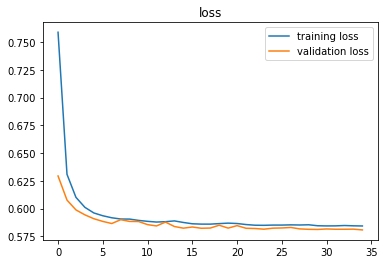

Plotting metrics...


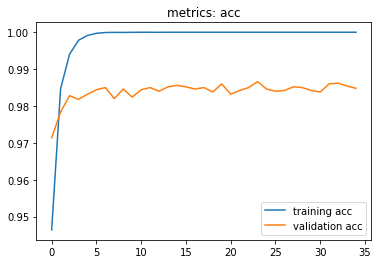

train {'acc': 0.9999818}
test {'acc': 0.9841}

Training student with temperature = 5 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6220070951714865664
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 1188385064027372705
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.4626145 , acc = 0.34 
Epoch 1 , step 100 , loss= 0.9772594 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.81582475 , acc = 0.92 
Epoch 1 , step 300 , loss= 0.80740786 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.8492855 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.8940213 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.8590129 val_loss= 0.7847227 , acc = 0.98 val acc = 0.9718 
Epoch 1 finished, loss= 0.8916379 val loss= 0.7847227 ,  acc = 0.940291 val acc = 0.9718
val_acc improved.

Epoch 17 , step 300 , loss= 0.6994637 , acc = 0.99 
Epoch 17 , step 400 , loss= 0.7588246 , acc = 0.99 
Epoch 17 , step 500 , loss= 0.78713834 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.7307978 val_loss= 0.7578688 , acc = 1.0 val acc = 0.9832 
Epoch 17 finished, loss= 0.7783817 val loss= 0.7578688 ,  acc = 0.99294543 val acc = 0.9832

Epoch 18 , step 50 , loss= 0.8231795 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.7836814 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.8135978 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.7815344 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.80820274 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.67929345 val_loss= 0.75746167 , acc = 1.0 val acc = 0.9828 
Epoch 18 finished, loss= 0.7782259 val loss= 0.75746167 ,  acc = 0.99287266 val acc = 0.9828

Epoch 19 , step 0 , loss= 0.80182654 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.68266577 , acc = 0.99 
Epoch 19 , step 200 , loss= 0.7688255 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.7749108 , acc = 1.0 
Epoch 19 , step 

Epoch 35 , step 100 , loss= 0.6929041 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.8435644 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.69270813 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.80285853 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.6960522 , acc = 0.99 
Epoch 35 , step 549 , loss= 0.78893226 val_loss= 0.75659317 , acc = 1.0 val acc = 0.9834 
Epoch 35 finished, loss= 0.7766206 val loss= 0.75659317 ,  acc = 0.9936728 val acc = 0.9834

Epoch 36 , step 50 , loss= 0.8369708 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.8600494 , acc = 0.97 
Epoch 36 , step 250 , loss= 0.7963815 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.6853412 , acc = 0.99 
Epoch 36 , step 450 , loss= 0.70679605 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.855561 val_loss= 0.756321 , acc = 1.0 val acc = 0.9822 
Epoch 36 finished, loss= 0.7766337 val loss= 0.756321 ,  acc = 0.99369085 val acc = 0.9822

Epoch 37 , step 0 , loss= 0.8374173 , acc = 0.99 
Epoch 37 , step 100 , loss= 0.8053832 , acc = 1.0 
Epoch 37 , step 200 , l

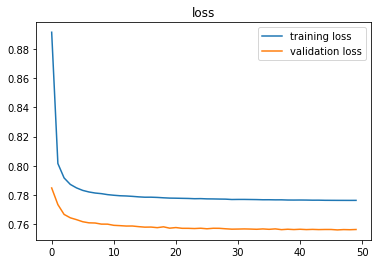

Plotting metrics...


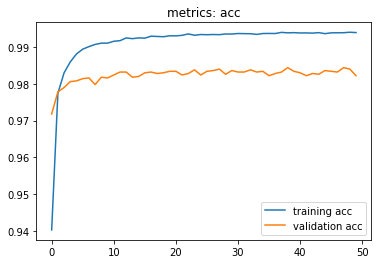

train {'acc': 0.99381816}
test {'acc': 0.9832}

Training student with temperature = 10 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8546249768513701204
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 9448029214022679079
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.055793 , acc = 0.43 
Epoch 1 , step 100 , loss= 0.16622251 , acc = 0.98 
Epoch 1 , step 200 , loss= 0.10855355 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.12616105 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.13262251 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.08126391 , acc = 1.0 
Epoch 1 , step 549 , loss= 0.09236643 val_loss= 0.10182801 , acc = 0.99 val acc = 0.9702 
Epoch 1 finished, loss= 0.2200826 val loss= 0.10182801 ,  acc = 0.946509 val acc = 0.9702
val_acc imp

Epoch 17 , step 100 , loss= 0.000119676144 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.00036435187 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.050103668 , acc = 0.99 
Epoch 17 , step 400 , loss= 0.0014975339 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.021667685 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0032002693 val_loss= 0.11113511 , acc = 1.0 val acc = 0.98 
Epoch 17 finished, loss= 0.011375514 val loss= 0.11113511 ,  acc = 0.9994364 val acc = 0.98

Epoch 18 , step 50 , loss= 0.00019713679 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0006546572 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.00026738457 , acc = 1.0 
Epoch 18 , step 350 , loss= 6.4485143e-06 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0061483467 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0002947757 val_loss= 0.118119724 , acc = 1.0 val acc = 0.9802 
Epoch 18 finished, loss= 0.007494844 val loss= 0.118119724 ,  acc = 0.9998 val acc = 0.9802

Epoch 19 , step 0 , loss= 0.02151165 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.0001215

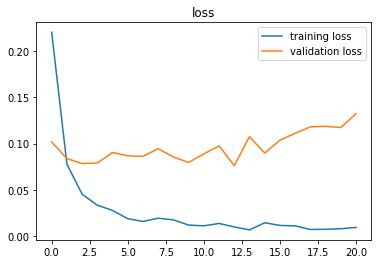

Plotting metrics...


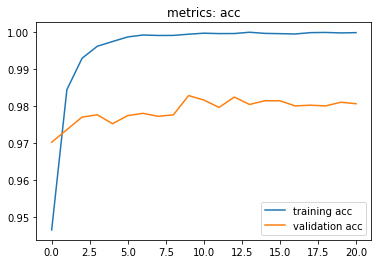

train {'acc': 0.99767274}
test {'acc': 0.9804}

Training student with temperature = 10 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4654803675008329357
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 16633740157026375124
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 4.24616 , acc = 0.14 
Epoch 1 , step 100 , loss= 0.7571668 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.69802 , acc = 0.92 
Epoch 1 , step 300 , loss= 0.61751664 , acc = 0.94 
Epoch 1 , step 400 , loss= 0.54595274 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.5750473 , acc = 0.94 
Epoch 1 , step 549 , loss= 0.5199778 val_loss= 0.50708145 , acc = 0.98 val acc = 0.968 
Epoch 1 finished, loss= 0.63176435 val loss= 0.50708145 ,  acc = 0.94298184 val acc = 0.968
val_acc impro

Epoch 17 , step 500 , loss= 0.39273596 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.39847395 val_loss= 0.4265452 , acc = 1.0 val acc = 0.9872 
Epoch 17 finished, loss= 0.39646208 val loss= 0.4265452 ,  acc = 1.0 val acc = 0.9872

Epoch 18 , step 50 , loss= 0.381511 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.40163043 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.37217978 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.39872172 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.40536514 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.424509 val_loss= 0.42749006 , acc = 1.0 val acc = 0.9876 
Epoch 18 finished, loss= 0.39624685 val loss= 0.42749006 ,  acc = 1.0 val acc = 0.9876

Epoch 19 , step 0 , loss= 0.4019285 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.37560746 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.38257608 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.3802132 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.3771697 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.40197322 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.43

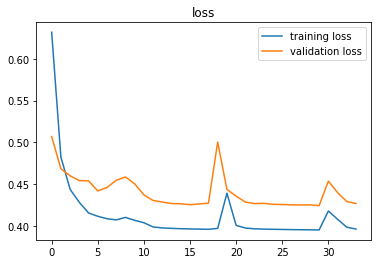

Plotting metrics...


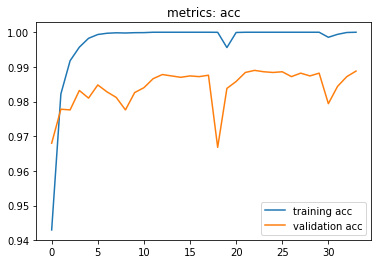

train {'acc': 1.0}
test {'acc': 0.9836}

Training student with temperature = 10 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5439290735406185391
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 17043679634329406293
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.6596057 , acc = 0.31 
Epoch 1 , step 100 , loss= 0.9764768 , acc = 0.96 
Epoch 1 , step 200 , loss= 1.0304176 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.9466801 , acc = 0.99 
Epoch 1 , step 400 , loss= 0.8381874 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.88390774 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.89451146 val_loss= 0.8818543 , acc = 0.95 val acc = 0.9618 
Epoch 1 finished, loss= 0.9925246 val loss= 0.8818543 ,  acc = 0.9430909 val acc = 0.9618
val_acc improved. 
E

Epoch 17 , step 500 , loss= 0.8010933 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.7972214 val_loss= 0.806849 , acc = 1.0 val acc = 0.9858 
Epoch 17 finished, loss= 0.7907489 val loss= 0.806849 ,  acc = 1.0 val acc = 0.9858

Epoch 18 , step 50 , loss= 0.8182075 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.7728246 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.77686477 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.8184384 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.7924778 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.7770589 val_loss= 0.8068872 , acc = 1.0 val acc = 0.9852 
Epoch 18 finished, loss= 0.7905749 val loss= 0.8068872 ,  acc = 1.0 val acc = 0.9852

Epoch 19 , step 0 , loss= 0.7883144 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.80320567 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.7670253 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.79266447 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.788553 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.8298691 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.8292552 val_l

Epoch 35 , step 400 , loss= 0.8005748 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.82439625 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.8312404 val_loss= 0.8043175 , acc = 1.0 val acc = 0.9876 
Epoch 35 finished, loss= 0.79045564 val loss= 0.8043175 ,  acc = 1.0 val acc = 0.9876
val_acc improved. 
Epoch 36 , step 50 , loss= 0.7957233 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.81240326 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.7822504 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.81967765 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.8220591 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.76990205 val_loss= 0.80396044 , acc = 1.0 val acc = 0.9874 
Epoch 36 finished, loss= 0.7899989 val loss= 0.80396044 ,  acc = 1.0 val acc = 0.9874

Epoch 37 , step 0 , loss= 0.8314909 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.82449484 , acc = 1.0 
Epoch 37 , step 200 , loss= 0.7537716 , acc = 1.0 
Epoch 37 , step 300 , loss= 0.7866489 , acc = 1.0 
Epoch 37 , step 400 , loss= 0.7618508 , acc = 1.0 
Epoch 37 , step 5

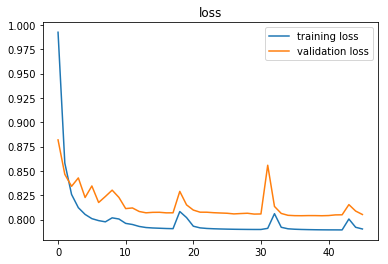

Plotting metrics...


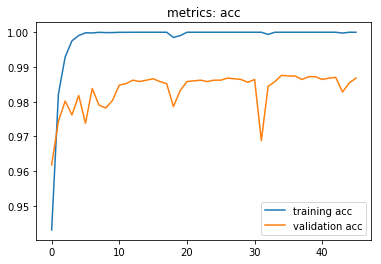

train {'acc': 1.0}
test {'acc': 0.9857}

Training student with temperature = 10 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17513895060026239288
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 710968381302241542
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.6847677 , acc = 0.27 
Epoch 1 , step 100 , loss= 1.3136485 , acc = 0.93 
Epoch 1 , step 200 , loss= 1.3447682 , acc = 0.95 
Epoch 1 , step 300 , loss= 1.253138 , acc = 0.96 
Epoch 1 , step 400 , loss= 1.2990011 , acc = 0.97 
Epoch 1 , step 500 , loss= 1.2652985 , acc = 0.96 
Epoch 1 , step 549 , loss= 1.255742 val_loss= 1.2234042 , acc = 0.96 val acc = 0.9718 
Epoch 1 finished, loss= 1.329092 val loss= 1.2234042 ,  acc = 0.94378185 val acc = 0.9718
val_acc improved. 
Epoc

Epoch 18 , step 50 , loss= 1.2175918 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.159147 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.1842766 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.1892525 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.1545604 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.1879833 val_loss= 1.1832403 , acc = 1.0 val acc = 0.9868 
Epoch 18 finished, loss= 1.1845582 val loss= 1.1832403 ,  acc = 1.0 val acc = 0.9868

Epoch 19 , step 0 , loss= 1.1268365 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.1322141 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.1256866 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.1641791 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.207411 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.1937532 , acc = 1.0 
Epoch 19 , step 549 , loss= 1.1325362 val_loss= 1.1891665 , acc = 1.0 val acc = 0.9824 
Epoch 19 finished, loss= 1.1937555 val loss= 1.1891665 ,  acc = 0.9995819 val acc = 0.9824

Epoch 20 , step 50 , loss= 1.1239781 , acc = 1.0 
Epoch 20 , step 150 , loss= 1.2306352 , 

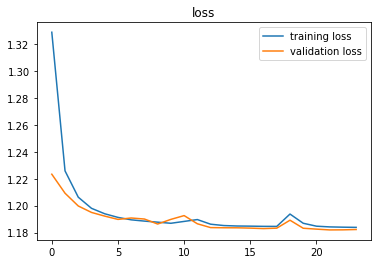

Plotting metrics...


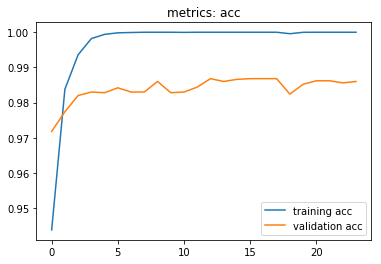

train {'acc': 1.0}
test {'acc': 0.9851}

Training student with temperature = 10 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9923695144656820337
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 13817908003904591022
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3219552 , acc = 0.38 
Epoch 1 , step 100 , loss= 1.573372 , acc = 0.93 
Epoch 1 , step 200 , loss= 1.706023 , acc = 0.92 
Epoch 1 , step 300 , loss= 1.6309239 , acc = 0.92 
Epoch 1 , step 400 , loss= 1.6315364 , acc = 0.98 
Epoch 1 , step 500 , loss= 1.545499 , acc = 0.97 
Epoch 1 , step 549 , loss= 1.5263249 val_loss= 1.5729614 , acc = 0.99 val acc = 0.9684 
Epoch 1 finished, loss= 1.634276 val loss= 1.5729614 ,  acc = 0.93292725 val acc = 0.9684
val_acc improved. 
Epoch 

Epoch 17 , step 400 , loss= 1.5799325 , acc = 0.99 
Epoch 17 , step 500 , loss= 1.5769261 , acc = 0.99 
Epoch 17 , step 549 , loss= 1.5959831 val_loss= 1.5597544 , acc = 1.0 val acc = 0.9822 
Epoch 17 finished, loss= 1.5775115 val loss= 1.5597544 ,  acc = 0.9913272 val acc = 0.9822

Epoch 18 , step 50 , loss= 1.6105263 , acc = 0.98 
Epoch 18 , step 150 , loss= 1.6376065 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.5586572 , acc = 0.99 
Epoch 18 , step 350 , loss= 1.6288801 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.624241 , acc = 0.98 
Epoch 18 , step 549 , loss= 1.6323366 val_loss= 1.5596957 , acc = 0.98 val acc = 0.983 
Epoch 18 finished, loss= 1.5773937 val loss= 1.5596957 ,  acc = 0.9917818 val acc = 0.983

Epoch 19 , step 0 , loss= 1.5111518 , acc = 0.98 
Epoch 19 , step 100 , loss= 1.6415741 , acc = 0.99 
Epoch 19 , step 200 , loss= 1.5717589 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.585073 , acc = 0.99 
Epoch 19 , step 400 , loss= 1.5459541 , acc = 0.99 
Epoch 19 , step 500 , los

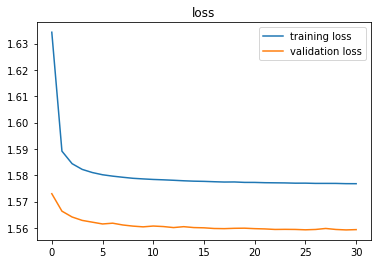

Plotting metrics...


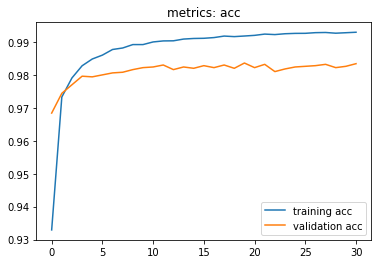

train {'acc': 0.9931273}
test {'acc': 0.9804}

Training student with temperature = 15 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3990419222461123438
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 997226073454654311
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.5731103 , acc = 0.27 
Epoch 1 , step 100 , loss= 0.193369 , acc = 0.95 
Epoch 1 , step 200 , loss= 0.0870065 , acc = 0.99 
Epoch 1 , step 300 , loss= 0.14913486 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.14771336 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.105890945 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.08087886 val_loss= 0.106520675 , acc = 0.99 val acc = 0.9684 
Epoch 1 finished, loss= 0.21726717 val loss= 0.106520675 ,  acc = 0.9463636 val acc = 0.9684
val_acc i

Epoch 17 , step 100 , loss= 0.0017003992 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.03410642 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.0006769046 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0033050734 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.045880433 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.010702323 val_loss= 0.10815114 , acc = 1.0 val acc = 0.9806 
Epoch 17 finished, loss= 0.0121329045 val loss= 0.10815114 ,  acc = 0.99958175 val acc = 0.9806

Epoch 18 , step 50 , loss= 0.0014547023 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.00056486693 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.04077886 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.00014617525 , acc = 1.0 
Epoch 18 , step 450 , loss= 4.230326e-05 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.002661221 val_loss= 0.095609516 , acc = 1.0 val acc = 0.9808 
Epoch 18 finished, loss= 0.010703644 val loss= 0.095609516 ,  acc = 0.9996727 val acc = 0.9808

Epoch 19 , step 0 , loss= 0.062162906 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.002541

Epoch 34 , step 50 , loss= 3.950087e-06 , acc = 1.0 
Epoch 34 , step 150 , loss= 1.1440662e-05 , acc = 1.0 
Epoch 34 , step 250 , loss= 0.0022183743 , acc = 1.0 
Epoch 34 , step 350 , loss= 8.43834e-06 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.002786529 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.029303117 val_loss= 0.107272804 , acc = 1.0 val acc = 0.9826 
Epoch 34 finished, loss= 0.0038301367 val loss= 0.107272804 ,  acc = 0.9998727 val acc = 0.9826

Epoch 35 , step 0 , loss= 5.5079036e-06 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.00022994194 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.00049822545 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.00021852751 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.0023424171 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.012355821 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.0026167037 val_loss= 0.12743716 , acc = 1.0 val acc = 0.9804 
Epoch 35 finished, loss= 0.005306037 val loss= 0.12743716 ,  acc = 0.9998908 val acc = 0.9804

Stop training, val_acc didn't i

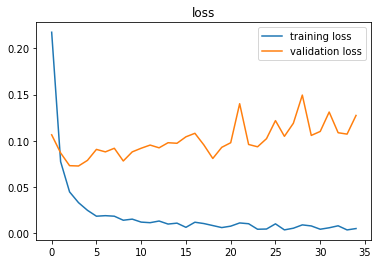

Plotting metrics...


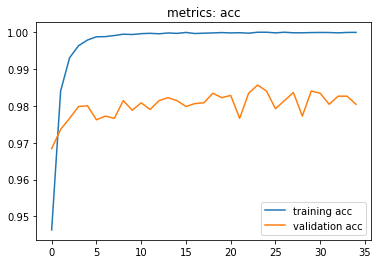

train {'acc': 0.9982727}
test {'acc': 0.9813}

Training student with temperature = 15 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1502556242146339579
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 12558132499031040105
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.5113559 , acc = 0.21 
Epoch 1 , step 100 , loss= 0.7934141 , acc = 0.92 
Epoch 1 , step 200 , loss= 0.6800885 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.62426054 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.63276803 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.62732387 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.5557993 val_loss= 0.5878897 , acc = 0.99 val acc = 0.9694 
Epoch 1 finished, loss= 0.6935754 val loss= 0.5878897 ,  acc = 0.9449636 val acc = 0.9694
val_acc imp

Epoch 17 , step 400 , loss= 0.4900668 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.48426875 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.475733 val_loss= 0.5198998 , acc = 1.0 val acc = 0.9862 
Epoch 17 finished, loss= 0.48803228 val loss= 0.5198998 ,  acc = 1.0 val acc = 0.9862
val_acc improved. 
Epoch 18 , step 50 , loss= 0.4758137 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.47410116 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.49687698 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.49469376 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.505625 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.48960608 val_loss= 0.51992637 , acc = 1.0 val acc = 0.9874 
Epoch 18 finished, loss= 0.4869544 val loss= 0.51992637 ,  acc = 1.0 val acc = 0.9874
val_acc improved. 
Epoch 19 , step 0 , loss= 0.47974667 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.48531538 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.46913266 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.5021502 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.48701382 , acc = 1.

Epoch 35 , step 100 , loss= 0.49073783 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.47924075 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.49205625 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.47814795 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.487796 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.48642397 val_loss= 0.5161546 , acc = 1.0 val acc = 0.989 
Epoch 35 finished, loss= 0.48543325 val loss= 0.5161546 ,  acc = 1.0 val acc = 0.989
val_acc improved. 
Epoch 36 , step 50 , loss= 0.4975743 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.48111165 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.47916025 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.49099693 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.48463005 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.48483413 val_loss= 0.5156303 , acc = 1.0 val acc = 0.9892 
Epoch 36 finished, loss= 0.4853564 val loss= 0.5156303 ,  acc = 1.0 val acc = 0.9892
val_acc improved. 
Epoch 37 , step 0 , loss= 0.4781591 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.5014962 , acc = 1.0 

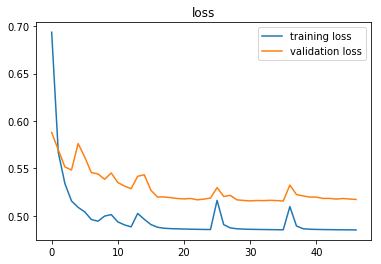

Plotting metrics...


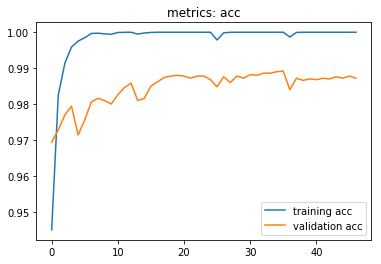

train {'acc': 1.0}
test {'acc': 0.9856}

Training student with temperature = 15 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1984050785290402725
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 1702663957840707820
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.877441 , acc = 0.29 
Epoch 1 , step 100 , loss= 1.1622938 , acc = 0.94 
Epoch 1 , step 200 , loss= 1.0857291 , acc = 0.95 
Epoch 1 , step 300 , loss= 1.139668 , acc = 0.91 
Epoch 1 , step 400 , loss= 1.0602868 , acc = 0.96 
Epoch 1 , step 500 , loss= 1.0628121 , acc = 0.97 
Epoch 1 , step 549 , loss= 1.0084559 val_loss= 1.0543205 , acc = 0.99 val acc = 0.9658 
Epoch 1 finished, loss= 1.1463312 val loss= 1.0543205 ,  acc = 0.9441636 val acc = 0.9658
val_acc improved. 
Epoch 

Epoch 17 , step 500 , loss= 0.9345868 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.9407043 val_loss= 0.99257964 , acc = 1.0 val acc = 0.9862 
Epoch 17 finished, loss= 0.97088665 val loss= 0.99257964 ,  acc = 1.0 val acc = 0.9862
val_acc improved. 
Epoch 18 , step 50 , loss= 0.96517015 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.9660806 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.96505624 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.9544533 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.97493786 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.99708813 val_loss= 0.99320734 , acc = 1.0 val acc = 0.9858 
Epoch 18 finished, loss= 0.9706987 val loss= 0.99320734 ,  acc = 1.0 val acc = 0.9858

Epoch 19 , step 0 , loss= 0.9803064 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.970443 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.9613768 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.9687427 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.959171 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.9970605 , acc = 1.0 
Epoch 19 , step 54

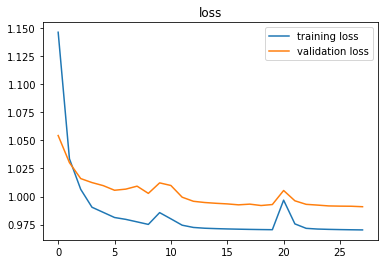

Plotting metrics...


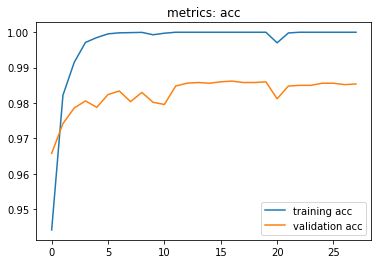

train {'acc': 1.0}
test {'acc': 0.986}

Training student with temperature = 15 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15394040389450532319
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 14982175763556926304
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.6446342 , acc = 0.29 
Epoch 1 , step 100 , loss= 1.604174 , acc = 0.93 
Epoch 1 , step 200 , loss= 1.5714159 , acc = 0.96 
Epoch 1 , step 300 , loss= 1.4994695 , acc = 0.98 
Epoch 1 , step 400 , loss= 1.483661 , acc = 0.95 
Epoch 1 , step 500 , loss= 1.5599356 , acc = 0.92 
Epoch 1 , step 549 , loss= 1.4725821 val_loss= 1.4948472 , acc = 0.99 val acc = 0.9672 
Epoch 1 finished, loss= 1.5777738 val loss= 1.4948472 ,  acc = 0.94039994 val acc = 0.9672
val_acc improved. 
Ep

Epoch 17 , step 500 , loss= 1.438275 , acc = 1.0 
Epoch 17 , step 549 , loss= 1.4424998 val_loss= 1.4739207 , acc = 1.0 val acc = 0.9772 
Epoch 17 finished, loss= 1.4561958 val loss= 1.4739207 ,  acc = 0.9999636 val acc = 0.9772

Epoch 18 , step 50 , loss= 1.4790969 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.458883 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.4386258 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.4482665 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.4617842 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.461372 val_loss= 1.4653693 , acc = 1.0 val acc = 0.9832 
Epoch 18 finished, loss= 1.4665142 val loss= 1.4653693 ,  acc = 0.99859995 val acc = 0.9832

Epoch 19 , step 0 , loss= 1.4618198 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.441846 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.4569649 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.4187521 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.4406909 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.4356393 , acc = 1.0 
Epoch 19 , step 549 , loss= 1.5110

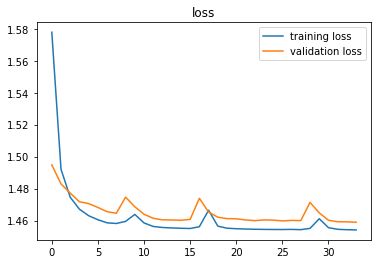

Plotting metrics...


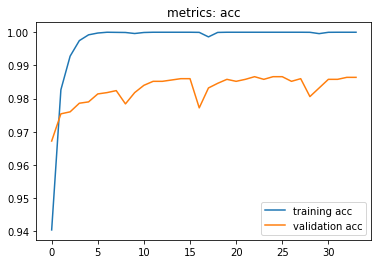

train {'acc': 1.0}
test {'acc': 0.986}

Training student with temperature = 15 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5158556692753097444
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 17006237091452233663
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3087008 , acc = 0.23 
Epoch 1 , step 100 , loss= 1.9521793 , acc = 0.91 
Epoch 1 , step 200 , loss= 2.0094936 , acc = 0.89 
Epoch 1 , step 300 , loss= 1.9841603 , acc = 0.96 
Epoch 1 , step 400 , loss= 1.9486078 , acc = 0.99 
Epoch 1 , step 500 , loss= 1.9435304 , acc = 0.97 
Epoch 1 , step 549 , loss= 1.9054812 val_loss= 1.9358639 , acc = 0.99 val acc = 0.9684 
Epoch 1 finished, loss= 1.9675335 val loss= 1.9358639 ,  acc = 0.9300727 val acc = 0.9684
val_acc improved. 
Epoc

Epoch 17 , step 500 , loss= 1.9525615 , acc = 1.0 
Epoch 17 , step 549 , loss= 1.8965404 val_loss= 1.9288881 , acc = 0.99 val acc = 0.9816 
Epoch 17 finished, loss= 1.9383607 val loss= 1.9288881 ,  acc = 0.9913818 val acc = 0.9816

Epoch 18 , step 50 , loss= 1.9787976 , acc = 0.98 
Epoch 18 , step 150 , loss= 1.9319966 , acc = 0.99 
Epoch 18 , step 250 , loss= 1.9405371 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.9760286 , acc = 0.99 
Epoch 18 , step 450 , loss= 1.9365093 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.9111965 val_loss= 1.928889 , acc = 0.98 val acc = 0.9812 
Epoch 18 finished, loss= 1.9383154 val loss= 1.928889 ,  acc = 0.9912909 val acc = 0.9812

Epoch 19 , step 0 , loss= 1.9739026 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.9146451 , acc = 0.99 
Epoch 19 , step 200 , loss= 1.9548565 , acc = 0.97 
Epoch 19 , step 300 , loss= 1.9326024 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.967845 , acc = 0.99 
Epoch 19 , step 500 , loss= 1.8926839 , acc = 1.0 
Epoch 19 , step 549 , loss

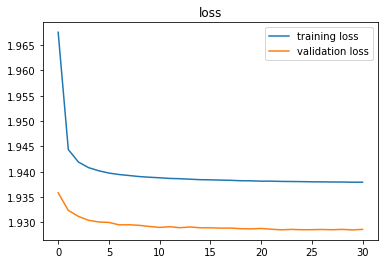

Plotting metrics...


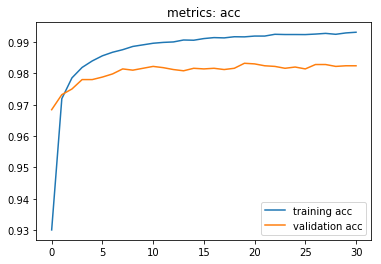

train {'acc': 0.9931091}
test {'acc': 0.9822}

Training student with temperature = 20 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2687895791987121076
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 8903980323277346849
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.234681 , acc = 0.31 
Epoch 1 , step 100 , loss= 0.13587086 , acc = 0.98 
Epoch 1 , step 200 , loss= 0.1074646 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.105636895 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.1200564 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.11713441 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.11737158 val_loss= 0.109133475 , acc = 0.98 val acc = 0.9668 
Epoch 1 finished, loss= 0.21925043 val loss= 0.109133475 ,  acc = 0.9470363 val acc = 0.9668
val_acc 

Epoch 17 , step 100 , loss= 0.00021195796 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.007200697 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.0047260877 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.00040596403 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.018012963 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0057992386 val_loss= 0.10128472 , acc = 1.0 val acc = 0.9828 
Epoch 17 finished, loss= 0.010604975 val loss= 0.10128472 ,  acc = 0.9997817 val acc = 0.9828

Epoch 18 , step 50 , loss= 0.0011380584 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0026001981 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.031024309 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.012471342 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.000784303 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0001776455 val_loss= 0.08130261 , acc = 1.0 val acc = 0.9832 
Epoch 18 finished, loss= 0.0114841405 val loss= 0.08130261 ,  acc = 0.99963635 val acc = 0.9832

Epoch 19 , step 0 , loss= 0.017571937 , acc = 1.0 
Epoch 19 , step 100 , loss= 3.224693e

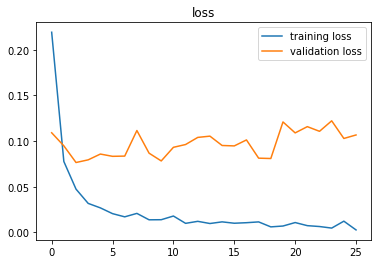

Plotting metrics...


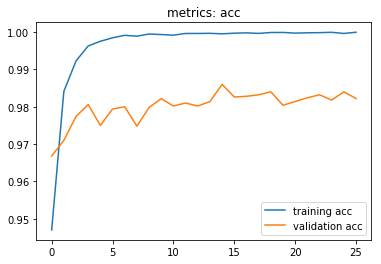

train {'acc': 0.99905455}
test {'acc': 0.9831}

Training student with temperature = 20 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12666358646889260548
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 8354438773168402255
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.035488 , acc = 0.32 
Epoch 1 , step 100 , loss= 0.74429786 , acc = 0.9 
Epoch 1 , step 200 , loss= 0.8103984 , acc = 0.91 
Epoch 1 , step 300 , loss= 0.6773186 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.64397 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.675481 , acc = 0.94 
Epoch 1 , step 549 , loss= 0.5663137 val_loss= 0.62646705 , acc = 1.0 val acc = 0.9656 
Epoch 1 finished, loss= 0.71872157 val loss= 0.62646705 ,  acc = 0.94519997 val acc = 0.9656
val_acc improv

Epoch 17 , step 400 , loss= 0.52677846 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.5235118 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.5327785 val_loss= 0.56911075 , acc = 1.0 val acc = 0.9842 
Epoch 17 finished, loss= 0.526067 val loss= 0.56911075 ,  acc = 1.0 val acc = 0.9842
val_acc improved. 
Epoch 18 , step 50 , loss= 0.53008765 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.5258605 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.526608 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.52443093 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.52692753 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.524776 val_loss= 0.5675558 , acc = 1.0 val acc = 0.9852 
Epoch 18 finished, loss= 0.525712 val loss= 0.5675558 ,  acc = 1.0 val acc = 0.9852
val_acc improved. 
Epoch 19 , step 0 , loss= 0.5268842 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.5269112 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.5201347 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.5281967 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.5251982 , acc = 1.0 
Epoch

Epoch 35 , step 100 , loss= 0.527256 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.5232919 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.5141629 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.52144104 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.51829 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.52902615 val_loss= 0.5639327 , acc = 1.0 val acc = 0.987 
Epoch 35 finished, loss= 0.5248195 val loss= 0.5639327 ,  acc = 1.0 val acc = 0.987

Epoch 36 , step 50 , loss= 0.53532535 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.51850814 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.52251655 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.5284757 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.5315405 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.52282953 val_loss= 0.5628087 , acc = 1.0 val acc = 0.987 
Epoch 36 finished, loss= 0.5247554 val loss= 0.5628087 ,  acc = 1.0 val acc = 0.987

Epoch 37 , step 0 , loss= 0.5259787 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.52683085 , acc = 1.0 
Epoch 37 , step 200 , loss= 0.52331865 , ac

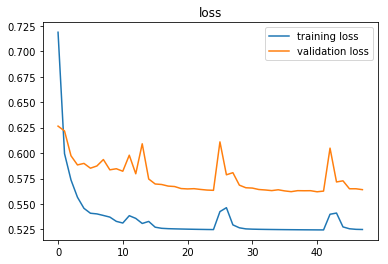

Plotting metrics...


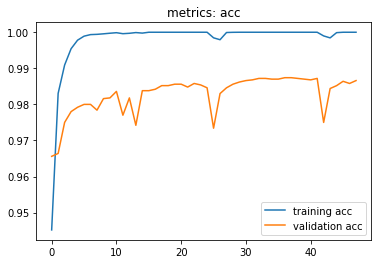

train {'acc': 1.0}
test {'acc': 0.9846}

Training student with temperature = 20 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12039732689979982193
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 16860773308175533245
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.7149296 , acc = 0.39 
Epoch 1 , step 100 , loss= 1.174214 , acc = 0.97 
Epoch 1 , step 200 , loss= 1.2010933 , acc = 0.97 
Epoch 1 , step 300 , loss= 1.1415939 , acc = 0.97 
Epoch 1 , step 400 , loss= 1.2114798 , acc = 0.94 
Epoch 1 , step 500 , loss= 1.1835117 , acc = 0.95 
Epoch 1 , step 549 , loss= 1.1453255 val_loss= 1.1265794 , acc = 0.97 val acc = 0.9682 
Epoch 1 finished, loss= 1.202786 val loss= 1.1265794 ,  acc = 0.944709 val acc = 0.9682
val_acc improved. 
Epoch

Epoch 17 , step 549 , loss= 1.0408299 val_loss= 1.073322 , acc = 1.0 val acc = 0.9872 
Epoch 17 finished, loss= 1.0495899 val loss= 1.073322 ,  acc = 1.0 val acc = 0.9872

Epoch 18 , step 50 , loss= 1.0468775 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.0485736 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.0404298 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.0407723 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.0604237 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.0453922 val_loss= 1.0740504 , acc = 1.0 val acc = 0.9864 
Epoch 18 finished, loss= 1.049423 val loss= 1.0740504 ,  acc = 1.0 val acc = 0.9864

Epoch 19 , step 0 , loss= 1.0565796 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.0489001 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.0484076 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.0532442 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.0264436 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.0609823 , acc = 1.0 
Epoch 19 , step 549 , loss= 1.0603411 val_loss= 1.0737936 , acc = 1.0 val acc = 0.9858 
Epoch 19 

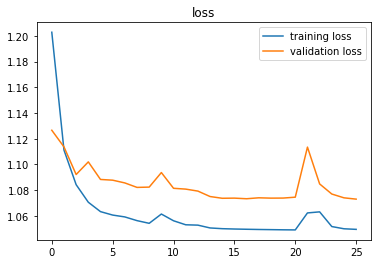

Plotting metrics...


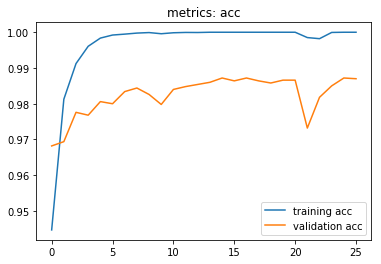

train {'acc': 1.0}
test {'acc': 0.9856}

Training student with temperature = 20 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15739923472616244187
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 8268593026768902464
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.9749084 , acc = 0.22 
Epoch 1 , step 100 , loss= 1.682578 , acc = 0.94 
Epoch 1 , step 200 , loss= 1.6283381 , acc = 0.98 
Epoch 1 , step 300 , loss= 1.6302665 , acc = 0.98 
Epoch 1 , step 400 , loss= 1.605667 , acc = 0.98 
Epoch 1 , step 500 , loss= 1.6507676 , acc = 0.98 
Epoch 1 , step 549 , loss= 1.6230679 val_loss= 1.6188864 , acc = 0.97 val acc = 0.9662 
Epoch 1 finished, loss= 1.6830596 val loss= 1.6188864 ,  acc = 0.9386728 val acc = 0.9662
val_acc improved. 
Epo

Epoch 17 , step 549 , loss= 1.5802203 val_loss= 1.5817997 , acc = 1.0 val acc = 0.9864 
Epoch 17 finished, loss= 1.573374 val loss= 1.5817997 ,  acc = 1.0 val acc = 0.9864

Epoch 18 , step 50 , loss= 1.5917304 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.5735312 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.5692538 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.5656527 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.564368 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.6022961 val_loss= 1.5817206 , acc = 1.0 val acc = 0.9866 
Epoch 18 finished, loss= 1.5732398 val loss= 1.5817206 ,  acc = 1.0 val acc = 0.9866

Epoch 19 , step 0 , loss= 1.5837576 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.5902896 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.5759131 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.5611472 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.5643721 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.5951813 , acc = 1.0 
Epoch 19 , step 549 , loss= 1.573415 val_loss= 1.5818979 , acc = 1.0 val acc = 0.9862 
Epoch 19 

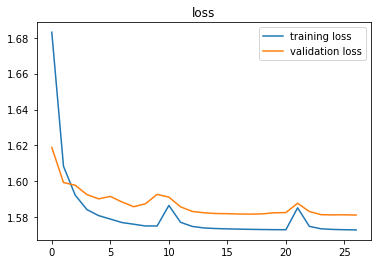

Plotting metrics...


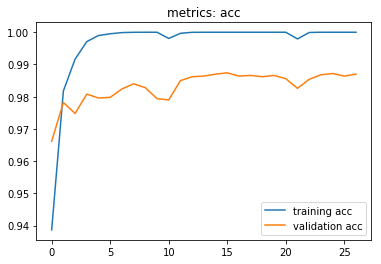

train {'acc': 1.0}
test {'acc': 0.9855}

Training student with temperature = 20 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15271404808977315483
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 18299207887632797274
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3091466 , acc = 0.28 
Epoch 1 , step 100 , loss= 2.1172454 , acc = 0.94 
Epoch 1 , step 200 , loss= 2.1307862 , acc = 0.96 
Epoch 1 , step 300 , loss= 2.1132772 , acc = 0.89 
Epoch 1 , step 400 , loss= 2.1072237 , acc = 0.98 
Epoch 1 , step 500 , loss= 2.1266062 , acc = 0.92 
Epoch 1 , step 549 , loss= 2.103653 val_loss= 2.095119 , acc = 0.99 val acc = 0.9678 
Epoch 1 finished, loss= 2.113868 val loss= 2.095119 ,  acc = 0.9272363 val acc = 0.9678
val_acc improved. 
Epoch 

Epoch 17 , step 549 , loss= 2.1251438 val_loss= 2.0908136 , acc = 1.0 val acc = 0.9812 
Epoch 17 finished, loss= 2.0963652 val loss= 2.0908136 ,  acc = 0.9906727 val acc = 0.9812

Epoch 18 , step 50 , loss= 2.1008792 , acc = 0.98 
Epoch 18 , step 150 , loss= 2.0865123 , acc = 1.0 
Epoch 18 , step 250 , loss= 2.0498219 , acc = 0.99 
Epoch 18 , step 350 , loss= 2.1120176 , acc = 0.99 
Epoch 18 , step 450 , loss= 2.1093028 , acc = 1.0 
Epoch 18 , step 549 , loss= 2.0698807 val_loss= 2.0909045 , acc = 1.0 val acc = 0.9806 
Epoch 18 finished, loss= 2.0963347 val loss= 2.0909045 ,  acc = 0.9910545 val acc = 0.9806

Epoch 19 , step 0 , loss= 2.1104026 , acc = 0.99 
Epoch 19 , step 100 , loss= 2.0986402 , acc = 0.98 
Epoch 19 , step 200 , loss= 2.1220384 , acc = 0.99 
Epoch 19 , step 300 , loss= 2.0937219 , acc = 1.0 
Epoch 19 , step 400 , loss= 2.0729573 , acc = 1.0 
Epoch 19 , step 500 , loss= 2.110921 , acc = 0.99 
Epoch 19 , step 549 , loss= 2.1055863 val_loss= 2.0907416 , acc = 1.0 val ac

Epoch 35 , step 500 , loss= 2.0769355 , acc = 0.99 
Epoch 35 , step 549 , loss= 2.0789545 val_loss= 2.0905693 , acc = 0.98 val acc = 0.9818 
Epoch 35 finished, loss= 2.096057 val loss= 2.0905693 ,  acc = 0.99254537 val acc = 0.9818

Epoch 36 , step 50 , loss= 2.1067295 , acc = 1.0 
Epoch 36 , step 150 , loss= 2.0935094 , acc = 0.99 
Epoch 36 , step 250 , loss= 2.0843742 , acc = 1.0 
Epoch 36 , step 350 , loss= 2.0789149 , acc = 1.0 
Epoch 36 , step 450 , loss= 2.0864105 , acc = 0.99 
Epoch 36 , step 549 , loss= 2.0945868 val_loss= 2.0906334 , acc = 0.99 val acc = 0.982 
Epoch 36 finished, loss= 2.0960553 val loss= 2.0906334 ,  acc = 0.99289083 val acc = 0.982

Epoch 37 , step 0 , loss= 2.078093 , acc = 1.0 
Epoch 37 , step 100 , loss= 2.1200275 , acc = 0.99 
Epoch 37 , step 200 , loss= 2.0841627 , acc = 1.0 
Epoch 37 , step 300 , loss= 2.0573592 , acc = 0.98 
Epoch 37 , step 400 , loss= 2.1153994 , acc = 0.99 
Epoch 37 , step 500 , loss= 2.0883768 , acc = 1.0 
Epoch 37 , step 549 , los

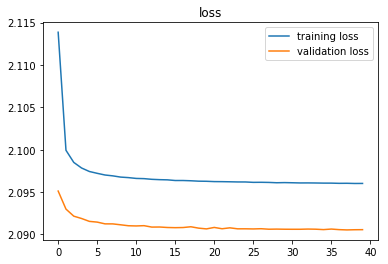

Plotting metrics...


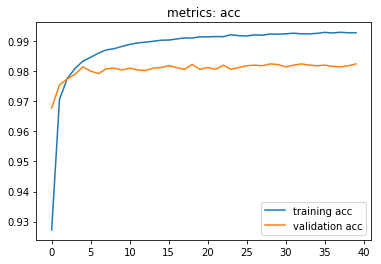

train {'acc': 0.99294543}
test {'acc': 0.9797}

Training student with temperature = 25 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2580466591694827933
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 14038831415874376609
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.5886283 , acc = 0.41 
Epoch 1 , step 100 , loss= 0.16728434 , acc = 0.96 
Epoch 1 , step 200 , loss= 0.10648798 , acc = 0.98 
Epoch 1 , step 300 , loss= 0.124995984 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.1187702 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.11743158 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.15250936 val_loss= 0.10878377 , acc = 0.96 val acc = 0.9692 
Epoch 1 finished, loss= 0.22012071 val loss= 0.10878377 ,  acc = 0.94627273 val acc = 0.9692
val_a

Epoch 17 , step 100 , loss= 0.00055773085 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.029728517 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.00659539 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0019483439 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.00047428044 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.024117047 val_loss= 0.10736516 , acc = 1.0 val acc = 0.9812 
Epoch 17 finished, loss= 0.009234008 val loss= 0.10736516 ,  acc = 0.9998 val acc = 0.9812

Epoch 18 , step 50 , loss= 0.0012723712 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.00015301316 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0014317335 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0031023354 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.000728992 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.00028605323 val_loss= 0.10347041 , acc = 1.0 val acc = 0.9812 
Epoch 18 finished, loss= 0.012931941 val loss= 0.10347041 ,  acc = 0.99963635 val acc = 0.9812

Epoch 19 , step 0 , loss= 0.0020280087 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.00014746

Epoch 34 , step 50 , loss= 0.0025655965 , acc = 1.0 
Epoch 34 , step 150 , loss= 1.9789339e-05 , acc = 1.0 
Epoch 34 , step 250 , loss= 2.9838151e-05 , acc = 1.0 
Epoch 34 , step 350 , loss= 1.22521815e-05 , acc = 1.0 
Epoch 34 , step 450 , loss= 5.9788454e-05 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.0010238276 val_loss= 0.1082686 , acc = 1.0 val acc = 0.9844 
Epoch 34 finished, loss= 0.006147638 val loss= 0.1082686 ,  acc = 0.9998726 val acc = 0.9844

Epoch 35 , step 0 , loss= 0.00013998049 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.0012037873 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.06750181 , acc = 1.0 
Epoch 35 , step 300 , loss= 9.2840826e-05 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.023792602 , acc = 1.0 
Epoch 35 , step 500 , loss= 6.443304e-05 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.0005051186 val_loss= 0.14169437 , acc = 1.0 val acc = 0.981 
Epoch 35 finished, loss= 0.004657706 val loss= 0.14169437 ,  acc = 0.9999272 val acc = 0.981

Epoch 36 , step 50 , loss= 5.122598

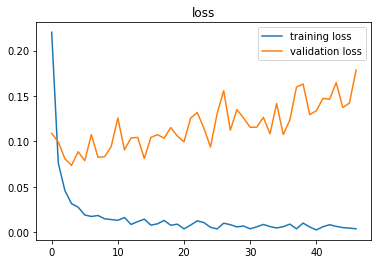

Plotting metrics...


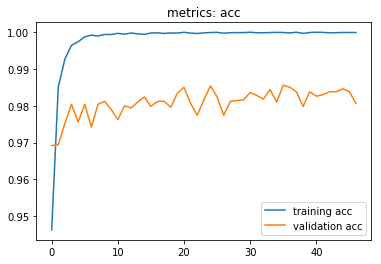

train {'acc': 0.9972364}
test {'acc': 0.9792}

Training student with temperature = 25 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6238843242387933501
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 2027276619677108578
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.127316 , acc = 0.27 
Epoch 1 , step 100 , loss= 0.7979605 , acc = 0.92 
Epoch 1 , step 200 , loss= 0.72870076 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.72157943 , acc = 0.93 
Epoch 1 , step 400 , loss= 0.6593108 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.6153516 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.64095676 val_loss= 0.6508268 , acc = 0.98 val acc = 0.9626 
Epoch 1 finished, loss= 0.7231715 val loss= 0.6508268 ,  acc = 0.9459091 val acc = 0.9626
val_acc impro

Epoch 17 , step 500 , loss= 0.5472414 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.55044067 val_loss= 0.59993935 , acc = 1.0 val acc = 0.9838 
Epoch 17 finished, loss= 0.54696965 val loss= 0.59993935 ,  acc = 0.9999636 val acc = 0.9838
val_acc improved. 
Epoch 18 , step 50 , loss= 0.5504954 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.5441659 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.54535854 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.55217654 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.54419285 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.54609084 val_loss= 0.5931318 , acc = 1.0 val acc = 0.9868 
Epoch 18 finished, loss= 0.5458458 val loss= 0.5931318 ,  acc = 0.9999818 val acc = 0.9868
val_acc improved. 
Epoch 19 , step 0 , loss= 0.54635304 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.54308486 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.5428879 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.539909 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.54807335 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.543960

Epoch 35 , step 300 , loss= 0.53416526 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.5398385 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.5430663 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.54118323 val_loss= 0.5874821 , acc = 1.0 val acc = 0.9864 
Epoch 35 finished, loss= 0.5439712 val loss= 0.5874821 ,  acc = 1.0 val acc = 0.9864

Epoch 36 , step 50 , loss= 0.54935926 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.5428186 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.54571974 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.54422075 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.544542 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.54123765 val_loss= 0.58726114 , acc = 1.0 val acc = 0.9862 
Epoch 36 finished, loss= 0.5439051 val loss= 0.58726114 ,  acc = 1.0 val acc = 0.9862

Epoch 37 , step 0 , loss= 0.5453249 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.54207224 , acc = 1.0 
Epoch 37 , step 200 , loss= 0.5414762 , acc = 1.0 
Epoch 37 , step 300 , loss= 0.5464077 , acc = 1.0 
Epoch 37 , step 400 , loss= 0.54930

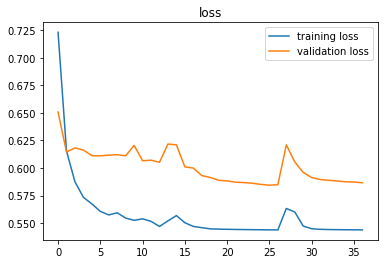

Plotting metrics...


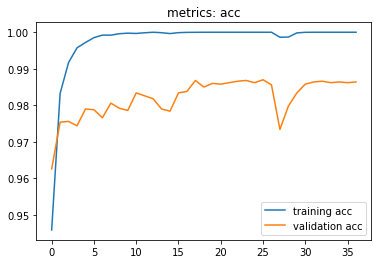

train {'acc': 1.0}
test {'acc': 0.9853}

Training student with temperature = 25 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4809398936643973407
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 17364496212020059091
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.6366932 , acc = 0.37 
Epoch 1 , step 100 , loss= 1.2328267 , acc = 0.93 
Epoch 1 , step 200 , loss= 1.1612568 , acc = 0.96 
Epoch 1 , step 300 , loss= 1.1966646 , acc = 0.94 
Epoch 1 , step 400 , loss= 1.2086283 , acc = 0.96 
Epoch 1 , step 500 , loss= 1.1523851 , acc = 0.98 
Epoch 1 , step 549 , loss= 1.1676519 val_loss= 1.1592777 , acc = 0.98 val acc = 0.9676 
Epoch 1 finished, loss= 1.2252969 val loss= 1.1592777 ,  acc = 0.9460546 val acc = 0.9676
val_acc improved. 
Epo

Epoch 17 , step 549 , loss= 1.0875348 val_loss= 1.1141468 , acc = 1.0 val acc = 0.9854 
Epoch 17 finished, loss= 1.0877923 val loss= 1.1141468 ,  acc = 1.0 val acc = 0.9854
val_acc improved. 
Epoch 18 , step 50 , loss= 1.0797877 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.0921474 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.072424 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.091957 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.0882939 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.0880123 val_loss= 1.1141146 , acc = 1.0 val acc = 0.9846 
Epoch 18 finished, loss= 1.0876458 val loss= 1.1141146 ,  acc = 1.0 val acc = 0.9846

Epoch 19 , step 0 , loss= 1.0921471 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.084004 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.0901635 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.1008986 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.0775582 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.0828536 , acc = 1.0 
Epoch 19 , step 549 , loss= 1.0839348 val_loss= 1.113833 , acc = 1.0 val acc = 

Epoch 35 , step 549 , loss= 1.0868646 val_loss= 1.1109072 , acc = 1.0 val acc = 0.987 
Epoch 35 finished, loss= 1.0869741 val loss= 1.1109072 ,  acc = 1.0 val acc = 0.987
val_acc improved. 
Epoch 36 , step 50 , loss= 1.0886118 , acc = 1.0 
Epoch 36 , step 150 , loss= 1.080121 , acc = 1.0 
Epoch 36 , step 250 , loss= 1.0904465 , acc = 1.0 
Epoch 36 , step 350 , loss= 1.0769464 , acc = 1.0 
Epoch 36 , step 450 , loss= 1.0796252 , acc = 1.0 
Epoch 36 , step 549 , loss= 1.0756235 val_loss= 1.1110989 , acc = 1.0 val acc = 0.986 
Epoch 36 finished, loss= 1.0869454 val loss= 1.1110989 ,  acc = 1.0 val acc = 0.986

Epoch 37 , step 0 , loss= 1.1005143 , acc = 1.0 
Epoch 37 , step 100 , loss= 1.0854908 , acc = 1.0 
Epoch 37 , step 200 , loss= 1.0850254 , acc = 1.0 
Epoch 37 , step 300 , loss= 1.0863215 , acc = 1.0 
Epoch 37 , step 400 , loss= 1.0877575 , acc = 1.0 
Epoch 37 , step 500 , loss= 1.0922704 , acc = 1.0 
Epoch 37 , step 549 , loss= 1.083495 val_loss= 1.1097937 , acc = 1.0 val acc = 0.

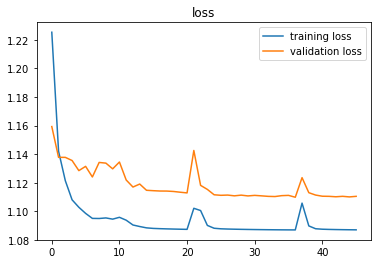

Plotting metrics...


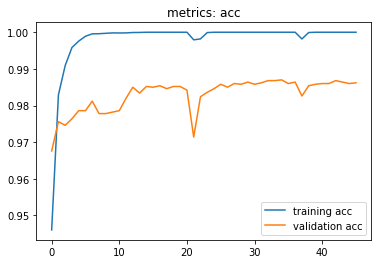

train {'acc': 1.0}
test {'acc': 0.9862}

Training student with temperature = 25 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18131685275395388365
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 9374409715389663105
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.6355078 , acc = 0.32 
Epoch 1 , step 100 , loss= 1.7053441 , acc = 0.96 
Epoch 1 , step 200 , loss= 1.6890228 , acc = 0.96 
Epoch 1 , step 300 , loss= 1.6816235 , acc = 0.97 
Epoch 1 , step 400 , loss= 1.7136074 , acc = 0.96 
Epoch 1 , step 500 , loss= 1.6849977 , acc = 0.97 
Epoch 1 , step 549 , loss= 1.6758083 val_loss= 1.6748991 , acc = 0.95 val acc = 0.9642 
Epoch 1 finished, loss= 1.7223067 val loss= 1.6748991 ,  acc = 0.9416909 val acc = 0.9642
val_acc improved. 
E

Epoch 18 , step 50 , loss= 1.6393728 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.617561 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.6341783 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.6469345 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.6319609 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.6285934 val_loss= 1.6416852 , acc = 1.0 val acc = 0.9854 
Epoch 18 finished, loss= 1.6308702 val loss= 1.6416852 ,  acc = 1.0 val acc = 0.9854
val_acc improved. 
Epoch 19 , step 0 , loss= 1.6202959 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.6384401 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.6333278 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.62112 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.6167618 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.623261 , acc = 1.0 
Epoch 19 , step 549 , loss= 1.6254616 val_loss= 1.6413157 , acc = 1.0 val acc = 0.9848 
Epoch 19 finished, loss= 1.6307305 val loss= 1.6413157 ,  acc = 1.0 val acc = 0.9848

Epoch 20 , step 50 , loss= 1.6196197 , acc = 1.0 
Epoch 20 , step 150 , loss= 1.

Epoch 36 , step 50 , loss= 1.6406907 , acc = 1.0 
Epoch 36 , step 150 , loss= 1.6387609 , acc = 1.0 
Epoch 36 , step 250 , loss= 1.6431539 , acc = 1.0 
Epoch 36 , step 350 , loss= 1.6358196 , acc = 1.0 
Epoch 36 , step 450 , loss= 1.6318275 , acc = 1.0 
Epoch 36 , step 549 , loss= 1.623527 val_loss= 1.6402035 , acc = 1.0 val acc = 0.9864 
Epoch 36 finished, loss= 1.6301092 val loss= 1.6402035 ,  acc = 1.0 val acc = 0.9864

Epoch 37 , step 0 , loss= 1.629581 , acc = 1.0 
Epoch 37 , step 100 , loss= 1.6607596 , acc = 1.0 
Epoch 37 , step 200 , loss= 1.6360065 , acc = 1.0 
Epoch 37 , step 300 , loss= 1.6452181 , acc = 1.0 
Epoch 37 , step 400 , loss= 1.6440717 , acc = 1.0 
Epoch 37 , step 500 , loss= 1.6603422 , acc = 1.0 
Epoch 37 , step 549 , loss= 1.6182103 val_loss= 1.6447549 , acc = 1.0 val acc = 0.983 
Epoch 37 finished, loss= 1.6386514 val loss= 1.6447549 ,  acc = 0.99874544 val acc = 0.983

Epoch 38 , step 50 , loss= 1.6356939 , acc = 1.0 
Epoch 38 , step 150 , loss= 1.6185123 , a

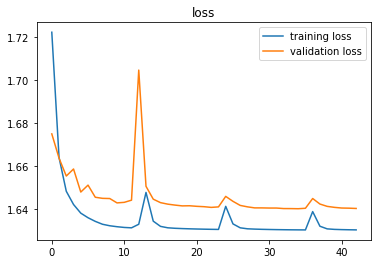

Plotting metrics...


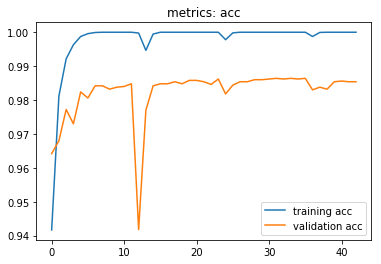

train {'acc': 1.0}
test {'acc': 0.9863}

Training student with temperature = 25 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4919268829798836988
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 9000638048263398854
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3050046 , acc = 0.23 
Epoch 1 , step 100 , loss= 2.1974556 , acc = 0.9 
Epoch 1 , step 200 , loss= 2.179533 , acc = 0.96 
Epoch 1 , step 300 , loss= 2.1943793 , acc = 0.93 
Epoch 1 , step 400 , loss= 2.2015662 , acc = 0.94 
Epoch 1 , step 500 , loss= 2.1590905 , acc = 0.96 
Epoch 1 , step 549 , loss= 2.1778507 val_loss= 2.172242 , acc = 0.95 val acc = 0.9684 
Epoch 1 finished, loss= 2.1845038 val loss= 2.172242 ,  acc = 0.9280909 val acc = 0.9684
val_acc improved. 
Epoch 2 

Epoch 17 , step 549 , loss= 2.1901116 val_loss= 2.169471 , acc = 0.98 val acc = 0.9828 
Epoch 17 finished, loss= 2.173033 val loss= 2.169471 ,  acc = 0.9910182 val acc = 0.9828

Epoch 18 , step 50 , loss= 2.1771917 , acc = 0.98 
Epoch 18 , step 150 , loss= 2.1652215 , acc = 1.0 
Epoch 18 , step 250 , loss= 2.1772733 , acc = 1.0 
Epoch 18 , step 350 , loss= 2.1611068 , acc = 1.0 
Epoch 18 , step 450 , loss= 2.169963 , acc = 1.0 
Epoch 18 , step 549 , loss= 2.1731513 val_loss= 2.1694634 , acc = 0.99 val acc = 0.9826 
Epoch 18 finished, loss= 2.1730144 val loss= 2.1694634 ,  acc = 0.9909273 val acc = 0.9826

Epoch 19 , step 0 , loss= 2.1717231 , acc = 0.98 
Epoch 19 , step 100 , loss= 2.1817265 , acc = 0.98 
Epoch 19 , step 200 , loss= 2.180314 , acc = 1.0 
Epoch 19 , step 300 , loss= 2.160831 , acc = 1.0 
Epoch 19 , step 400 , loss= 2.161429 , acc = 0.97 
Epoch 19 , step 500 , loss= 2.160528 , acc = 0.99 
Epoch 19 , step 549 , loss= 2.187221 val_loss= 2.1695046 , acc = 0.98 val acc = 0.9

Epoch 35 , step 400 , loss= 2.2025836 , acc = 0.98 
Epoch 35 , step 500 , loss= 2.1880672 , acc = 0.99 
Epoch 35 , step 549 , loss= 2.1873646 val_loss= 2.1693811 , acc = 1.0 val acc = 0.983 
Epoch 35 finished, loss= 2.1728594 val loss= 2.1693811 ,  acc = 0.9926545 val acc = 0.983

Epoch 36 , step 50 , loss= 2.1740932 , acc = 0.98 
Epoch 36 , step 150 , loss= 2.1681168 , acc = 0.99 
Epoch 36 , step 250 , loss= 2.1759171 , acc = 1.0 
Epoch 36 , step 350 , loss= 2.1663594 , acc = 0.99 
Epoch 36 , step 450 , loss= 2.1796432 , acc = 1.0 
Epoch 36 , step 549 , loss= 2.1770554 val_loss= 2.169335 , acc = 1.0 val acc = 0.9838 
Epoch 36 finished, loss= 2.1728463 val loss= 2.169335 ,  acc = 0.9925273 val acc = 0.9838

Epoch 37 , step 0 , loss= 2.1537037 , acc = 1.0 
Epoch 37 , step 100 , loss= 2.1993494 , acc = 1.0 
Epoch 37 , step 200 , loss= 2.1717043 , acc = 1.0 
Epoch 37 , step 300 , loss= 2.1524317 , acc = 0.99 
Epoch 37 , step 400 , loss= 2.1610672 , acc = 0.98 
Epoch 37 , step 500 , loss= 

Epoch 53 , step 200 , loss= 2.1704578 , acc = 0.99 
Epoch 53 , step 300 , loss= 2.1771502 , acc = 0.98 
Epoch 53 , step 400 , loss= 2.1900945 , acc = 1.0 
Epoch 53 , step 500 , loss= 2.1780157 , acc = 0.98 
Epoch 53 , step 549 , loss= 2.1725628 val_loss= 2.1693442 , acc = 0.99 val acc = 0.9838 
Epoch 53 finished, loss= 2.1727855 val loss= 2.1693442 ,  acc = 0.99294543 val acc = 0.9838

Epoch 54 , step 50 , loss= 2.1879597 , acc = 0.99 
Epoch 54 , step 150 , loss= 2.1834342 , acc = 0.99 
Epoch 54 , step 250 , loss= 2.1761243 , acc = 0.98 
Epoch 54 , step 350 , loss= 2.1614594 , acc = 0.98 
Epoch 54 , step 450 , loss= 2.1656895 , acc = 1.0 
Epoch 54 , step 549 , loss= 2.1976268 val_loss= 2.169324 , acc = 0.99 val acc = 0.9834 
Epoch 54 finished, loss= 2.1727772 val loss= 2.169324 ,  acc = 0.9931272 val acc = 0.9834

Epoch 55 , step 0 , loss= 2.144247 , acc = 1.0 
Epoch 55 , step 100 , loss= 2.1443124 , acc = 1.0 
Epoch 55 , step 200 , loss= 2.1558368 , acc = 0.99 
Epoch 55 , step 300 , l

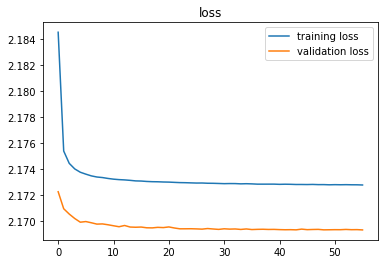

Plotting metrics...


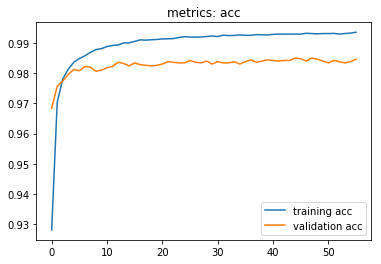

train {'acc': 0.99316365}
test {'acc': 0.982}

Training student with temperature = 30 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13316018071682600598
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 18348928604719168771
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.8041253 , acc = 0.25 
Epoch 1 , step 100 , loss= 0.17583805 , acc = 0.96 
Epoch 1 , step 200 , loss= 0.10614815 , acc = 0.98 
Epoch 1 , step 300 , loss= 0.14334837 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.13724497 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.08645973 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.10578063 val_loss= 0.093949206 , acc = 0.98 val acc = 0.9718 
Epoch 1 finished, loss= 0.22355811 val loss= 0.093949206 ,  acc = 0.94605446 val acc = 0.9718
val

Epoch 17 , step 100 , loss= 0.00030874438 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.006162492 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.0054346253 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0047581797 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.06002235 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.06689703 val_loss= 0.093014725 , acc = 0.99 val acc = 0.9804 
Epoch 17 finished, loss= 0.013474221 val loss= 0.093014725 ,  acc = 0.99961823 val acc = 0.9804

Epoch 18 , step 50 , loss= 0.00086375396 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0016391748 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.00080671685 , acc = 1.0 
Epoch 18 , step 350 , loss= 6.31028e-05 , acc = 1.0 
Epoch 18 , step 450 , loss= 5.8040434e-05 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.00093973917 val_loss= 0.10100706 , acc = 1.0 val acc = 0.9814 
Epoch 18 finished, loss= 0.00957561 val loss= 0.10100706 ,  acc = 0.99969083 val acc = 0.9814

Epoch 19 , step 0 , loss= 0.00020009288 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.0

Epoch 34 , step 150 , loss= 0.09933895 , acc = 1.0 
Epoch 34 , step 250 , loss= 0.00031977598 , acc = 1.0 
Epoch 34 , step 350 , loss= 1.7693672e-05 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.0073808962 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.0001240507 val_loss= 0.14071399 , acc = 1.0 val acc = 0.9814 
Epoch 34 finished, loss= 0.015253407 val loss= 0.14071399 ,  acc = 0.99963635 val acc = 0.9814

Epoch 35 , step 0 , loss= 0.0064613465 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.004875446 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.0051566865 , acc = 1.0 
Epoch 35 , step 300 , loss= 8.536906e-05 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.0027299526 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.06007373 , acc = 1.0 
Epoch 35 , step 549 , loss= 6.720387e-05 val_loss= 0.122483544 , acc = 1.0 val acc = 0.9816 
Epoch 35 finished, loss= 0.0071905497 val loss= 0.122483544 ,  acc = 0.9998544 val acc = 0.9816

Epoch 36 , step 50 , loss= 0.00010823537 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.033

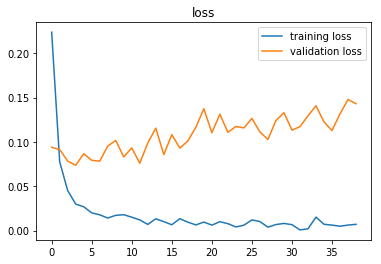

Plotting metrics...


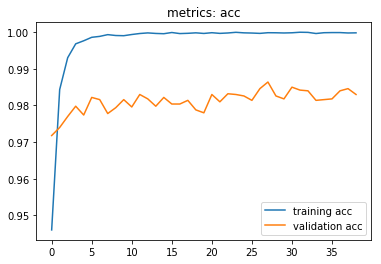

train {'acc': 0.9992545}
test {'acc': 0.9821}

Training student with temperature = 30 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13006049501674403468
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 17274369288900232274
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.153133 , acc = 0.25 
Epoch 1 , step 100 , loss= 0.7703072 , acc = 0.92 
Epoch 1 , step 200 , loss= 0.66819704 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.6304085 , acc = 0.98 
Epoch 1 , step 400 , loss= 0.61962557 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.62604344 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.6054653 val_loss= 0.6421614 , acc = 0.99 val acc = 0.9682 
Epoch 1 finished, loss= 0.72858304 val loss= 0.6421614 ,  acc = 0.9467455 val acc = 0.9682
val_acc im

Epoch 17 , step 500 , loss= 0.5533226 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.55394495 val_loss= 0.6127092 , acc = 1.0 val acc = 0.9832 
Epoch 17 finished, loss= 0.5582689 val loss= 0.6127092 ,  acc = 0.9998908 val acc = 0.9832
val_acc improved. 
Epoch 18 , step 50 , loss= 0.55454355 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.5562655 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.5510956 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.5544529 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.5574262 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.55552244 val_loss= 0.6169342 , acc = 1.0 val acc = 0.9804 
Epoch 18 finished, loss= 0.5563851 val loss= 0.6169342 ,  acc = 1.0 val acc = 0.9804

Epoch 19 , step 0 , loss= 0.55708766 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.5609981 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.5584454 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.5610301 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.5573261 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.55681753 , acc = 1.0 
Epoch 19 , ste

Epoch 35 , step 200 , loss= 0.5529171 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.5547561 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.55160713 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.5557338 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.5552697 val_loss= 0.59798217 , acc = 1.0 val acc = 0.9858 
Epoch 35 finished, loss= 0.5545087 val loss= 0.59798217 ,  acc = 1.0 val acc = 0.9858

Epoch 36 , step 50 , loss= 0.5514527 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.5512438 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.5518792 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.5507767 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.5558713 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.55382687 val_loss= 0.5977092 , acc = 1.0 val acc = 0.9856 
Epoch 36 finished, loss= 0.5544009 val loss= 0.5977092 ,  acc = 1.0 val acc = 0.9856

Epoch 37 , step 0 , loss= 0.55449736 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.5564507 , acc = 1.0 
Epoch 37 , step 200 , loss= 0.5579609 , acc = 1.0 
Epoch 37 , step 300 , loss= 0.55491704

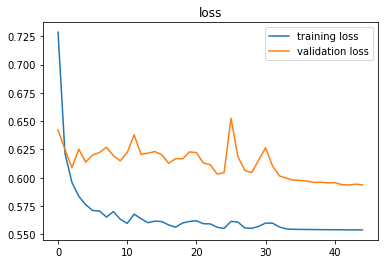

Plotting metrics...


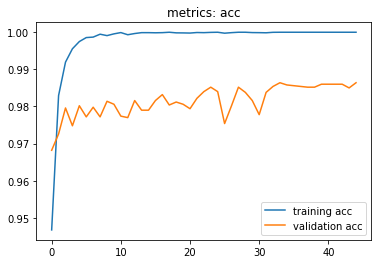

train {'acc': 1.0}
test {'acc': 0.9863}

Training student with temperature = 30 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1490494829184987959
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 5182427021428208994
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.8955333 , acc = 0.34 
Epoch 1 , step 100 , loss= 1.2406929 , acc = 0.92 
Epoch 1 , step 200 , loss= 1.1713723 , acc = 0.96 
Epoch 1 , step 300 , loss= 1.2044092 , acc = 0.96 
Epoch 1 , step 400 , loss= 1.1911789 , acc = 0.97 
Epoch 1 , step 500 , loss= 1.172181 , acc = 0.97 
Epoch 1 , step 549 , loss= 1.174718 val_loss= 1.1715854 , acc = 0.98 val acc = 0.972 
Epoch 1 finished, loss= 1.239836 val loss= 1.1715854 ,  acc = 0.9464727 val acc = 0.972
val_acc improved. 
Epoch 2 ,

Epoch 17 , step 549 , loss= 1.1093749 val_loss= 1.1335906 , acc = 1.0 val acc = 0.987 
Epoch 17 finished, loss= 1.1089742 val loss= 1.1335906 ,  acc = 1.0 val acc = 0.987
val_acc improved. 
Epoch 18 , step 50 , loss= 1.1026773 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.1115785 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.0979701 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.1116996 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.1088563 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.1087521 val_loss= 1.1322246 , acc = 1.0 val acc = 0.9868 
Epoch 18 finished, loss= 1.108479 val loss= 1.1322246 ,  acc = 1.0 val acc = 0.9868

Epoch 19 , step 0 , loss= 1.1118139 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.1061834 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.1100248 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.1173415 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.1012627 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.1051092 , acc = 1.0 
Epoch 19 , step 549 , loss= 1.1061034 val_loss= 1.1316283 , acc = 1.0 val acc =

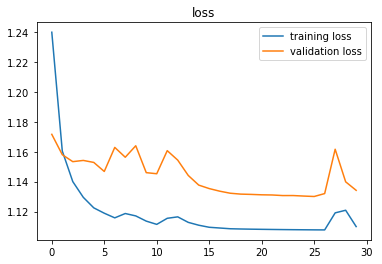

Plotting metrics...


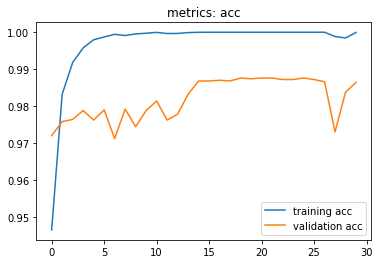

train {'acc': 0.99987274}
test {'acc': 0.984}

Training student with temperature = 30 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16886208631908847625
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 328869910879473911
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.7283514 , acc = 0.24 
Epoch 1 , step 100 , loss= 1.7650176 , acc = 0.92 
Epoch 1 , step 200 , loss= 1.726113 , acc = 0.95 
Epoch 1 , step 300 , loss= 1.7524402 , acc = 0.93 
Epoch 1 , step 400 , loss= 1.6962067 , acc = 0.99 
Epoch 1 , step 500 , loss= 1.6896459 , acc = 0.99 
Epoch 1 , step 549 , loss= 1.7309887 val_loss= 1.7014642 , acc = 0.96 val acc = 0.9702 
Epoch 1 finished, loss= 1.7455733 val loss= 1.7014642 ,  acc = 0.94472724 val acc = 0.9702
val_acc improve

Epoch 17 , step 549 , loss= 1.658204 val_loss= 1.6744113 , acc = 1.0 val acc = 0.9852 
Epoch 17 finished, loss= 1.6622499 val loss= 1.6744113 ,  acc = 1.0 val acc = 0.9852

Epoch 18 , step 50 , loss= 1.654455 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.6609658 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.6664002 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.6653861 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.6741296 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.658156 val_loss= 1.6739858 , acc = 1.0 val acc = 0.985 
Epoch 18 finished, loss= 1.6619177 val loss= 1.6739858 ,  acc = 1.0 val acc = 0.985

Epoch 19 , step 0 , loss= 1.6634326 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.6666015 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.6642057 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.6629461 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.6535524 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.6741824 , acc = 1.0 
Epoch 19 , step 549 , loss= 1.6777447 val_loss= 1.673444 , acc = 1.0 val acc = 0.9862 
Epoch 19 fin

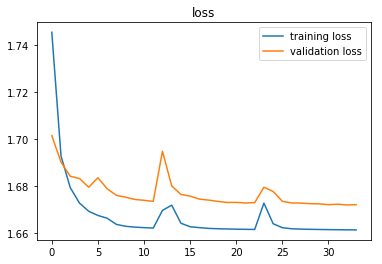

Plotting metrics...


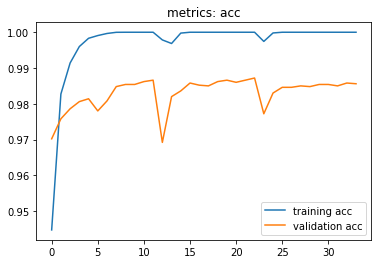

train {'acc': 1.0}
test {'acc': 0.9862}

Training student with temperature = 30 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9537826580124534211
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 6342180125807322858
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3041184 , acc = 0.41 
Epoch 1 , step 100 , loss= 2.2310157 , acc = 0.9 
Epoch 1 , step 200 , loss= 2.2213883 , acc = 0.93 
Epoch 1 , step 300 , loss= 2.2095284 , acc = 0.98 
Epoch 1 , step 400 , loss= 2.2046387 , acc = 0.99 
Epoch 1 , step 500 , loss= 2.2110534 , acc = 0.94 
Epoch 1 , step 549 , loss= 2.2121546 val_loss= 2.213941 , acc = 0.96 val acc = 0.9678 
Epoch 1 finished, loss= 2.2222373 val loss= 2.213941 ,  acc = 0.92598176 val acc = 0.9678
val_acc improved. 
Epoch 

Epoch 17 , step 500 , loss= 2.2158532 , acc = 1.0 
Epoch 17 , step 549 , loss= 2.2199726 val_loss= 2.2121358 , acc = 0.98 val acc = 0.9824 
Epoch 17 finished, loss= 2.2145605 val loss= 2.2121358 ,  acc = 0.9904364 val acc = 0.9824

Epoch 18 , step 50 , loss= 2.2241836 , acc = 1.0 
Epoch 18 , step 150 , loss= 2.2223413 , acc = 0.98 
Epoch 18 , step 250 , loss= 2.2265124 , acc = 0.99 
Epoch 18 , step 350 , loss= 2.2193158 , acc = 0.99 
Epoch 18 , step 450 , loss= 2.2162566 , acc = 0.99 
Epoch 18 , step 549 , loss= 2.2087255 val_loss= 2.2121012 , acc = 1.0 val acc = 0.9838 
Epoch 18 finished, loss= 2.2145455 val loss= 2.2121012 ,  acc = 0.9907818 val acc = 0.9838
val_acc improved. 
Epoch 19 , step 0 , loss= 2.213674 , acc = 0.99 
Epoch 19 , step 100 , loss= 2.2252624 , acc = 0.98 
Epoch 19 , step 200 , loss= 2.21395 , acc = 1.0 
Epoch 19 , step 300 , loss= 2.21901 , acc = 0.99 
Epoch 19 , step 400 , loss= 2.2238173 , acc = 1.0 
Epoch 19 , step 500 , loss= 2.234935 , acc = 0.99 
Epoch 19 ,

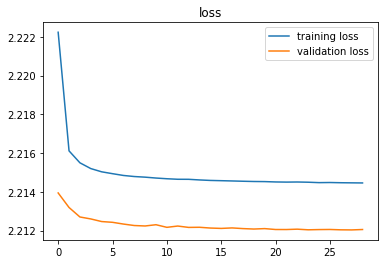

Plotting metrics...


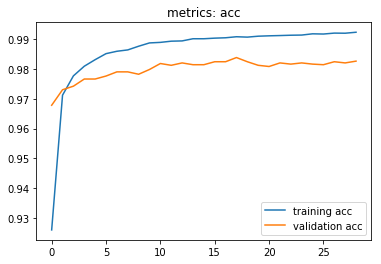

train {'acc': 0.99218184}
test {'acc': 0.9817}

{5: [{'acc': 0.9809}, {'acc': 0.9845}, {'acc': 0.9862}, {'acc': 0.9841}, {'acc': 0.9832}], 10: [{'acc': 0.9804}, {'acc': 0.9836}, {'acc': 0.9857}, {'acc': 0.9851}, {'acc': 0.9804}], 15: [{'acc': 0.9813}, {'acc': 0.9856}, {'acc': 0.986}, {'acc': 0.986}, {'acc': 0.9822}], 20: [{'acc': 0.9831}, {'acc': 0.9846}, {'acc': 0.9856}, {'acc': 0.9855}, {'acc': 0.9797}], 25: [{'acc': 0.9792}, {'acc': 0.9853}, {'acc': 0.9862}, {'acc': 0.9863}, {'acc': 0.982}], 30: [{'acc': 0.9821}, {'acc': 0.9863}, {'acc': 0.984}, {'acc': 0.9862}, {'acc': 0.9817}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            1.00           0.00            5                   1    0.9809   
1            0.75           0.25            5                   1    0.9845   
2            0.50           0.50            5                   1    0.9862   
3            0.25           0.75            5                   1    0.9841   
4            0.

In [13]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])

temperatures = [5,10,15,20,25,30]

list_exp = []
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    set_rand_seed(0)
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    coef_soft_losses = [0.0, 0.25, 0.5, 0.75, 1.0]#[1.0, 0.75, 0.5, 0.25, 0.0]
    tmp_effect = 1 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True, gpu_id=gpu_id)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=100
            ,display_steps=100
            ,earlystop_params={'monitor':'val_acc', 'patience':10}
        )
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        # show result
        print('Student performance with',dict_exp)
        student.plt_loss()
        student.plt_metrics()
        print('train',train_metric)
        print('test',test_metric)
        print()
        list_exp.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp = pd.DataFrame(list_exp)
print(test_metrics)
print(df_exp)

In [14]:
print(test_metrics)
print(df_exp)
print(df_exp['test_acc'].mean())

{5: [{'acc': 0.9809}, {'acc': 0.9845}, {'acc': 0.9862}, {'acc': 0.9841}, {'acc': 0.9832}], 10: [{'acc': 0.9804}, {'acc': 0.9836}, {'acc': 0.9857}, {'acc': 0.9851}, {'acc': 0.9804}], 15: [{'acc': 0.9813}, {'acc': 0.9856}, {'acc': 0.986}, {'acc': 0.986}, {'acc': 0.9822}], 20: [{'acc': 0.9831}, {'acc': 0.9846}, {'acc': 0.9856}, {'acc': 0.9855}, {'acc': 0.9797}], 25: [{'acc': 0.9792}, {'acc': 0.9853}, {'acc': 0.9862}, {'acc': 0.9863}, {'acc': 0.982}], 30: [{'acc': 0.9821}, {'acc': 0.9863}, {'acc': 0.984}, {'acc': 0.9862}, {'acc': 0.9817}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            1.00           0.00            5                   1    0.9809   
1            0.75           0.25            5                   1    0.9845   
2            0.50           0.50            5                   1    0.9862   
3            0.25           0.75            5                   1    0.9841   
4            0.00           1.00            5                  

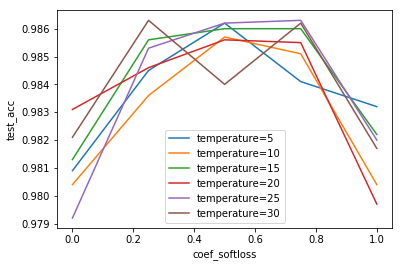

In [15]:
plot_trend(df_exp, label_x='coef_softloss', label_y='test_acc', label_line='temperature')

## Experiments on Students with $T^2$ Effect

Training student with temperature = 5 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 25 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7222761058946799708
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 501095827009532959
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.6909225 , acc = 0.5 
Epoch 1 , step 100 , loss= 0.28373763 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.11958765 , acc = 0.98 
Epoch 1 , step 300 , loss= 0.11935804 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.045154076 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.108072616 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.14674735 val_loss= 0.10056571 , acc = 0.96 val acc = 0.9688 
Epoch 1 finished, loss= 0.2087726 val loss= 0.10056571 ,  acc = 0.94954544 val acc = 0.9688
val_acc improved. 
Epoch 2 , step 50 , loss= 0.05922714

Epoch 17 , step 200 , loss= 0.00086058775 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.0029122008 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0018745902 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.04795941 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.003008849 val_loss= 0.1023643 , acc = 1.0 val acc = 0.981 
Epoch 17 finished, loss= 0.012520357 val loss= 0.1023643 ,  acc = 0.99969083 val acc = 0.981

Epoch 18 , step 50 , loss= 0.008094624 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.00022744662 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.06098054 , acc = 0.99 
Epoch 18 , step 350 , loss= 0.0005072646 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.007202746 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0072960467 val_loss= 0.1003649 , acc = 1.0 val acc = 0.9828 
Epoch 18 finished, loss= 0.008982278 val loss= 0.1003649 ,  acc = 0.9996544 val acc = 0.9828
val_acc improved. 
Epoch 19 , step 0 , loss= 0.00072697626 , acc = 1.0 
Epoch 19 , step 100 , loss= 2.624841e-05 , acc = 1.0 
Epoch 19 , step 200 , lo

Epoch 34 , step 150 , loss= 0.00041395344 , acc = 1.0 
Epoch 34 , step 250 , loss= 1.8380664e-06 , acc = 1.0 
Epoch 34 , step 350 , loss= 3.7117916e-05 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.006921855 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.004955895 val_loss= 0.15205902 , acc = 1.0 val acc = 0.9816 
Epoch 34 finished, loss= 0.0072754184 val loss= 0.15205902 ,  acc = 0.9998 val acc = 0.9816

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.0, 'coef_hardloss': 1.0, 'temperature': 5, 'temperature_effect': 25, 'train_acc': 0.99785453, 'test_acc': 0.9798}
Plotting loss...


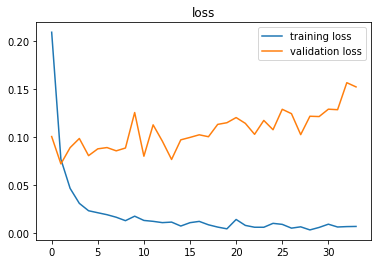

Plotting metrics...


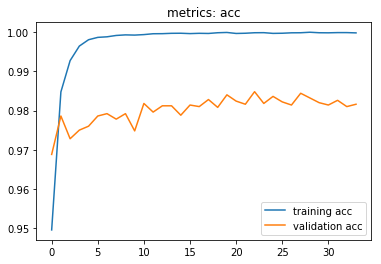

train {'acc': 0.99785453}
test {'acc': 0.9798}

Training student with temperature = 5 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 25 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5081933320225648734
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 12528439522349085528
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 17.471493 , acc = 0.39 
Epoch 1 , step 100 , loss= 6.1352587 , acc = 0.93 
Epoch 1 , step 200 , loss= 4.524439 , acc = 0.98 
Epoch 1 , step 300 , loss= 5.429598 , acc = 0.96 
Epoch 1 , step 400 , loss= 4.8645277 , acc = 0.99 
Epoch 1 , step 500 , loss= 5.3847322 , acc = 0.97 
Epoch 1 , step 549 , loss= 5.787084 val_loss= 5.012744 , acc = 0.95 val acc = 0.9746 
Epoch 1 finished, loss= 5.8244724 val loss= 5.012744 ,  acc = 0.9464545 val acc = 0.9746
val_acc improved. 

Epoch 17 , step 549 , loss= 4.815923 val_loss= 4.7851114 , acc = 1.0 val acc = 0.9848 
Epoch 17 finished, loss= 4.874823 val loss= 4.7851114 ,  acc = 0.9999818 val acc = 0.9848

Epoch 18 , step 50 , loss= 5.142369 , acc = 1.0 
Epoch 18 , step 150 , loss= 4.523589 , acc = 1.0 
Epoch 18 , step 250 , loss= 5.107134 , acc = 1.0 
Epoch 18 , step 350 , loss= 5.0336013 , acc = 1.0 
Epoch 18 , step 450 , loss= 5.0513005 , acc = 1.0 
Epoch 18 , step 549 , loss= 4.2477584 val_loss= 4.7841034 , acc = 1.0 val acc = 0.9846 
Epoch 18 finished, loss= 4.874043 val loss= 4.7841034 ,  acc = 0.9999818 val acc = 0.9846

Epoch 19 , step 0 , loss= 4.494759 , acc = 1.0 
Epoch 19 , step 100 , loss= 5.4647946 , acc = 1.0 
Epoch 19 , step 200 , loss= 5.99233 , acc = 1.0 
Epoch 19 , step 300 , loss= 5.747167 , acc = 1.0 
Epoch 19 , step 400 , loss= 5.04186 , acc = 1.0 
Epoch 19 , step 500 , loss= 4.7818213 , acc = 1.0 
Epoch 19 , step 549 , loss= 5.10281 val_loss= 4.7821665 , acc = 1.0 val acc = 0.9842 
Epoch 19

Student performance with {'coef_softloss': 0.25, 'coef_hardloss': 0.75, 'temperature': 5, 'temperature_effect': 25, 'train_acc': 0.9998, 'test_acc': 0.9845}
Plotting loss...


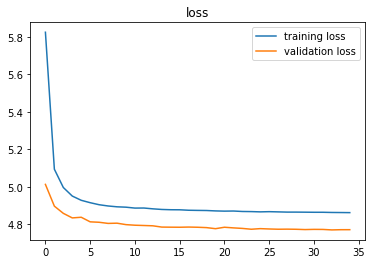

Plotting metrics...


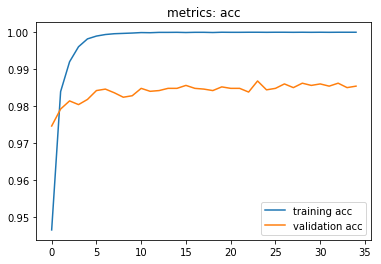

train {'acc': 0.9998}
test {'acc': 0.9845}

Training student with temperature = 5 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 25 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15380989895765759430
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 11428880191933446217
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 31.368326 , acc = 0.4 
Epoch 1 , step 100 , loss= 12.014845 , acc = 0.95 
Epoch 1 , step 200 , loss= 11.627739 , acc = 0.96 
Epoch 1 , step 300 , loss= 10.395809 , acc = 0.97 
Epoch 1 , step 400 , loss= 10.299883 , acc = 0.95 
Epoch 1 , step 500 , loss= 10.806844 , acc = 0.99 
Epoch 1 , step 549 , loss= 10.727401 val_loss= 9.90365 , acc = 0.99 val acc = 0.9722 
Epoch 1 finished, loss= 11.244086 val loss= 9.90365 ,  acc = 0.9450182 val acc = 0.9722
val_acc improved. 
Epoc

Epoch 18 , step 150 , loss= 9.365823 , acc = 1.0 
Epoch 18 , step 250 , loss= 9.190594 , acc = 0.99 
Epoch 18 , step 350 , loss= 10.417236 , acc = 1.0 
Epoch 18 , step 450 , loss= 9.733115 , acc = 1.0 
Epoch 18 , step 549 , loss= 9.325103 val_loss= 9.503562 , acc = 1.0 val acc = 0.9834 
Epoch 18 finished, loss= 9.734101 val loss= 9.503562 ,  acc = 0.99901813 val acc = 0.9834

Epoch 19 , step 0 , loss= 10.423348 , acc = 1.0 
Epoch 19 , step 100 , loss= 9.811347 , acc = 1.0 
Epoch 19 , step 200 , loss= 10.9520855 , acc = 1.0 
Epoch 19 , step 300 , loss= 10.264773 , acc = 1.0 
Epoch 19 , step 400 , loss= 9.266773 , acc = 1.0 
Epoch 19 , step 500 , loss= 10.017651 , acc = 0.99 
Epoch 19 , step 549 , loss= 9.904657 val_loss= 9.495354 , acc = 1.0 val acc = 0.9836 
Epoch 19 finished, loss= 9.732186 val loss= 9.495354 ,  acc = 0.9991273 val acc = 0.9836

Epoch 20 , step 50 , loss= 9.505557 , acc = 1.0 
Epoch 20 , step 150 , loss= 11.76936 , acc = 1.0 
Epoch 20 , step 250 , loss= 9.590657 , acc

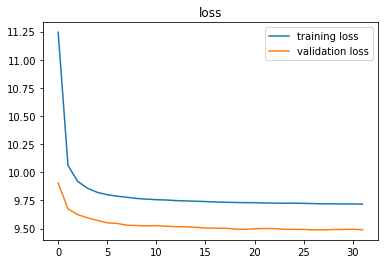

Plotting metrics...


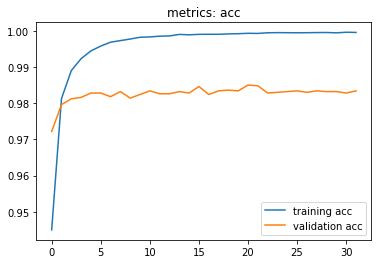

train {'acc': 0.9994364}
test {'acc': 0.9843}

Training student with temperature = 5 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 25 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8025188442427055832
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 17518786348194792413
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 46.416702 , acc = 0.31 
Epoch 1 , step 100 , loss= 18.853704 , acc = 0.91 
Epoch 1 , step 200 , loss= 17.170458 , acc = 0.94 
Epoch 1 , step 300 , loss= 16.963148 , acc = 0.96 
Epoch 1 , step 400 , loss= 17.334673 , acc = 0.97 
Epoch 1 , step 500 , loss= 16.578276 , acc = 0.98 
Epoch 1 , step 549 , loss= 15.0407095 val_loss= 14.693513 , acc = 0.98 val acc = 0.973 
Epoch 1 finished, loss= 16.73261 val loss= 14.693513 ,  acc = 0.9423636 val acc = 0.973
val_acc improved

Epoch 17 , step 500 , loss= 14.318389 , acc = 1.0 
Epoch 17 , step 549 , loss= 13.036697 val_loss= 14.23337 , acc = 1.0 val acc = 0.9836 
Epoch 17 finished, loss= 14.59648 val loss= 14.23337 ,  acc = 0.99618185 val acc = 0.9836

Epoch 18 , step 50 , loss= 13.825955 , acc = 1.0 
Epoch 18 , step 150 , loss= 14.809548 , acc = 0.99 
Epoch 18 , step 250 , loss= 13.564702 , acc = 1.0 
Epoch 18 , step 350 , loss= 15.771453 , acc = 1.0 
Epoch 18 , step 450 , loss= 15.432922 , acc = 0.99 
Epoch 18 , step 549 , loss= 14.3838 val_loss= 14.221362 , acc = 1.0 val acc = 0.9836 
Epoch 18 finished, loss= 14.59446 val loss= 14.221362 ,  acc = 0.996509 val acc = 0.9836

Epoch 19 , step 0 , loss= 14.800652 , acc = 1.0 
Epoch 19 , step 100 , loss= 12.707643 , acc = 1.0 
Epoch 19 , step 200 , loss= 15.391979 , acc = 0.99 
Epoch 19 , step 300 , loss= 13.629288 , acc = 1.0 
Epoch 19 , step 400 , loss= 15.379121 , acc = 1.0 
Epoch 19 , step 500 , loss= 16.324738 , acc = 1.0 
Epoch 19 , step 549 , loss= 14.809

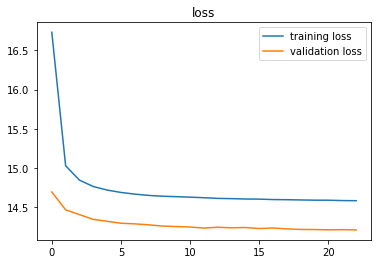

Plotting metrics...


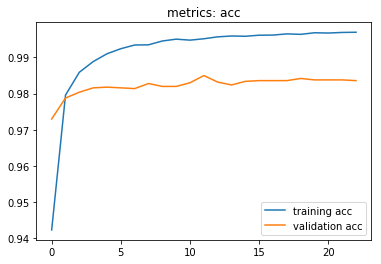

train {'acc': 0.9965091}
test {'acc': 0.9819}

Training student with temperature = 5 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 25 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8482767657753496507
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 14686427775396935767
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 58.274727 , acc = 0.53 
Epoch 1 , step 100 , loss= 24.512556 , acc = 0.93 
Epoch 1 , step 200 , loss= 17.5213 , acc = 0.95 
Epoch 1 , step 300 , loss= 20.27611 , acc = 0.97 
Epoch 1 , step 400 , loss= 20.067656 , acc = 0.95 
Epoch 1 , step 500 , loss= 22.932482 , acc = 0.97 
Epoch 1 , step 549 , loss= 18.540403 val_loss= 19.626303 , acc = 0.99 val acc = 0.9712 
Epoch 1 finished, loss= 22.147556 val loss= 19.626303 ,  acc = 0.94112724 val acc = 0.9712
val_acc improved. 

Epoch 17 , step 500 , loss= 18.207441 , acc = 1.0 
Epoch 17 , step 549 , loss= 20.886316 val_loss= 18.940392 , acc = 0.99 val acc = 0.9822 
Epoch 17 finished, loss= 19.45511 val loss= 18.940392 ,  acc = 0.9927637 val acc = 0.9822

Epoch 18 , step 50 , loss= 20.18752 , acc = 1.0 
Epoch 18 , step 150 , loss= 19.795025 , acc = 0.99 
Epoch 18 , step 250 , loss= 21.674208 , acc = 0.98 
Epoch 18 , step 350 , loss= 20.835674 , acc = 0.99 
Epoch 18 , step 450 , loss= 18.60263 , acc = 1.0 
Epoch 18 , step 549 , loss= 17.48552 val_loss= 18.940662 , acc = 0.99 val acc = 0.9824 
Epoch 18 finished, loss= 19.451982 val loss= 18.940662 ,  acc = 0.99278176 val acc = 0.9824

Epoch 19 , step 0 , loss= 21.423925 , acc = 0.99 
Epoch 19 , step 100 , loss= 20.133484 , acc = 0.99 
Epoch 19 , step 200 , loss= 17.97497 , acc = 1.0 
Epoch 19 , step 300 , loss= 18.73206 , acc = 1.0 
Epoch 19 , step 400 , loss= 20.65964 , acc = 0.97 
Epoch 19 , step 500 , loss= 19.011045 , acc = 1.0 
Epoch 19 , step 549 , loss= 1

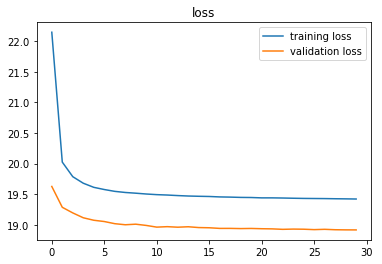

Plotting metrics...


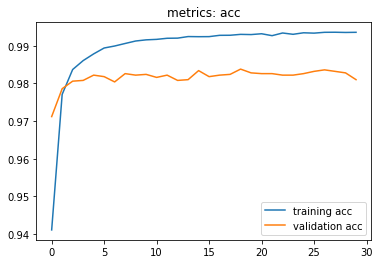

train {'acc': 0.9933091}
test {'acc': 0.9817}

Training student with temperature = 10 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13779401903832344642
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 3140805646365154573
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.4471023 , acc = 0.36 
Epoch 1 , step 100 , loss= 0.21921295 , acc = 0.95 
Epoch 1 , step 200 , loss= 0.27209437 , acc = 0.94 
Epoch 1 , step 300 , loss= 0.15416016 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.10124224 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.09668933 , acc = 0.99 
Epoch 1 , step 549 , loss= 0.06324539 val_loss= 0.11667939 , acc = 0.99 val acc = 0.9622 
Epoch 1 finished, loss= 0.21302257 val loss= 0.11667939 ,  acc = 0.9479817 val acc = 0.9622
val_a

Epoch 17 , step 100 , loss= 0.02450621 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.00025087126 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.0002515722 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0015744669 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.00025940442 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0056666513 val_loss= 0.09062699 , acc = 1.0 val acc = 0.9846 
Epoch 17 finished, loss= 0.008341128 val loss= 0.09062699 ,  acc = 0.9997454 val acc = 0.9846
val_acc improved. 
Epoch 18 , step 50 , loss= 0.0010337809 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0011374073 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.003707029 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0003784208 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.00042415864 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.00023133692 val_loss= 0.09113514 , acc = 1.0 val acc = 0.9836 
Epoch 18 finished, loss= 0.010629251 val loss= 0.09113514 ,  acc = 0.99965453 val acc = 0.9836

Epoch 19 , step 0 , loss= 0.0005080417 , acc = 1.0 
Epoch 19 , step

Epoch 34 , step 50 , loss= 0.00015641846 , acc = 1.0 
Epoch 34 , step 150 , loss= 3.254151e-06 , acc = 1.0 
Epoch 34 , step 250 , loss= 1.755635e-05 , acc = 1.0 
Epoch 34 , step 350 , loss= 5.3308566e-05 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.0009570411 , acc = 1.0 
Epoch 34 , step 549 , loss= 2.1331613e-05 val_loss= 0.14316453 , acc = 1.0 val acc = 0.9816 
Epoch 34 finished, loss= 0.003015802 val loss= 0.14316453 ,  acc = 0.9999272 val acc = 0.9816

Epoch 35 , step 0 , loss= 0.00030035124 , acc = 1.0 
Epoch 35 , step 100 , loss= 1.9131471e-06 , acc = 1.0 
Epoch 35 , step 200 , loss= 9.109478e-05 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.0093619935 , acc = 1.0 
Epoch 35 , step 400 , loss= 2.9752055e-06 , acc = 1.0 
Epoch 35 , step 500 , loss= 2.169278e-05 , acc = 1.0 
Epoch 35 , step 549 , loss= 6.58044e-05 val_loss= 0.17334554 , acc = 1.0 val acc = 0.9776 
Epoch 35 finished, loss= 0.008138341 val loss= 0.17334554 ,  acc = 0.9998363 val acc = 0.9776

Epoch 36 , step 50 , loss= 6.8

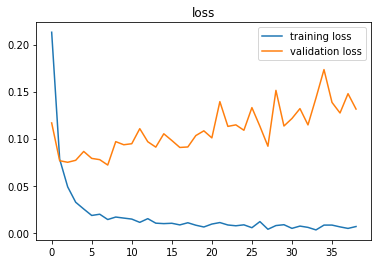

Plotting metrics...


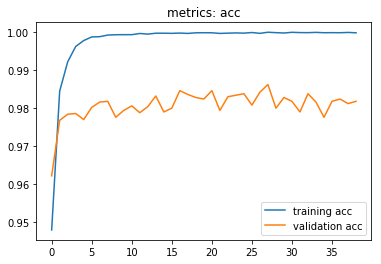

train {'acc': 0.9989455}
test {'acc': 0.9828}

Training student with temperature = 10 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12359741161064105801
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 3028757421359316223
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 61.002266 , acc = 0.37 
Epoch 1 , step 100 , loss= 40.746754 , acc = 0.94 
Epoch 1 , step 200 , loss= 39.388454 , acc = 0.97 
Epoch 1 , step 300 , loss= 39.762993 , acc = 0.98 
Epoch 1 , step 400 , loss= 42.540424 , acc = 0.95 
Epoch 1 , step 500 , loss= 39.909485 , acc = 0.99 
Epoch 1 , step 549 , loss= 39.728104 val_loss= 39.44311 , acc = 0.99 val acc = 0.9746 
Epoch 1 finished, loss= 41.184048 val loss= 39.44311 ,  acc = 0.9428183 val acc = 0.9746
val_acc improv

Epoch 18 , step 50 , loss= 39.855717 , acc = 1.0 
Epoch 18 , step 150 , loss= 38.753696 , acc = 1.0 
Epoch 18 , step 250 , loss= 41.24123 , acc = 1.0 
Epoch 18 , step 350 , loss= 37.82676 , acc = 1.0 
Epoch 18 , step 450 , loss= 40.753273 , acc = 1.0 
Epoch 18 , step 549 , loss= 40.583096 val_loss= 39.04451 , acc = 1.0 val acc = 0.9842 
Epoch 18 finished, loss= 39.445713 val loss= 39.04451 ,  acc = 0.9999272 val acc = 0.9842
val_acc improved. 
Epoch 19 , step 0 , loss= 40.62362 , acc = 1.0 
Epoch 19 , step 100 , loss= 40.030304 , acc = 1.0 
Epoch 19 , step 200 , loss= 37.907883 , acc = 1.0 
Epoch 19 , step 300 , loss= 39.424774 , acc = 1.0 
Epoch 19 , step 400 , loss= 37.114094 , acc = 1.0 
Epoch 19 , step 500 , loss= 40.864075 , acc = 1.0 
Epoch 19 , step 549 , loss= 38.8575 val_loss= 39.037556 , acc = 1.0 val acc = 0.9848 
Epoch 19 finished, loss= 39.443523 val loss= 39.037556 ,  acc = 0.9999818 val acc = 0.9848
val_acc improved. 
Epoch 20 , step 50 , loss= 40.368526 , acc = 1.0 
Epo

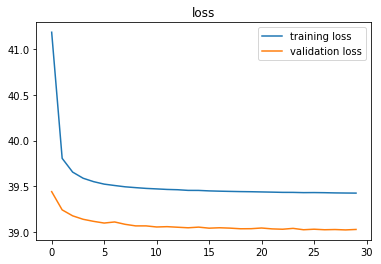

Plotting metrics...


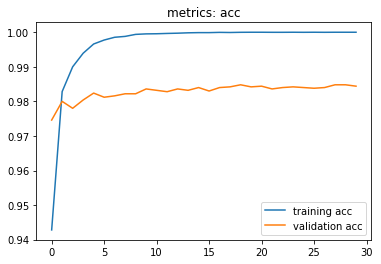

train {'acc': 0.9999818}
test {'acc': 0.9845}

Training student with temperature = 10 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17646210627861546672
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 17110241895166408983
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 118.31307 , acc = 0.45 
Epoch 1 , step 100 , loss= 87.06239 , acc = 0.88 
Epoch 1 , step 200 , loss= 81.29221 , acc = 0.96 
Epoch 1 , step 300 , loss= 79.29021 , acc = 0.96 
Epoch 1 , step 400 , loss= 80.46292 , acc = 0.95 
Epoch 1 , step 500 , loss= 76.50333 , acc = 0.97 
Epoch 1 , step 549 , loss= 83.424736 val_loss= 78.726875 , acc = 0.97 val acc = 0.9714 
Epoch 1 finished, loss= 81.9316 val loss= 78.726875 ,  acc = 0.9390545 val acc = 0.9714
val_acc improved. 
E

Epoch 18 , step 50 , loss= 81.19688 , acc = 1.0 
Epoch 18 , step 150 , loss= 80.982285 , acc = 1.0 
Epoch 18 , step 250 , loss= 78.93105 , acc = 1.0 
Epoch 18 , step 350 , loss= 77.072845 , acc = 1.0 
Epoch 18 , step 450 , loss= 80.29176 , acc = 1.0 
Epoch 18 , step 549 , loss= 80.53558 val_loss= 78.02957 , acc = 1.0 val acc = 0.9838 
Epoch 18 finished, loss= 78.88301 val loss= 78.02957 ,  acc = 0.99852717 val acc = 0.9838

Epoch 19 , step 0 , loss= 82.33358 , acc = 1.0 
Epoch 19 , step 100 , loss= 79.5559 , acc = 1.0 
Epoch 19 , step 200 , loss= 83.30727 , acc = 1.0 
Epoch 19 , step 300 , loss= 77.75255 , acc = 1.0 
Epoch 19 , step 400 , loss= 78.13484 , acc = 1.0 
Epoch 19 , step 500 , loss= 76.62757 , acc = 1.0 
Epoch 19 , step 549 , loss= 77.201744 val_loss= 78.012825 , acc = 1.0 val acc = 0.9842 
Epoch 19 finished, loss= 78.87628 val loss= 78.012825 ,  acc = 0.99874544 val acc = 0.9842

Epoch 20 , step 50 , loss= 74.59367 , acc = 1.0 
Epoch 20 , step 150 , loss= 79.06543 , acc = 1

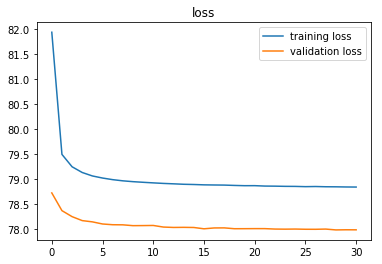

Plotting metrics...


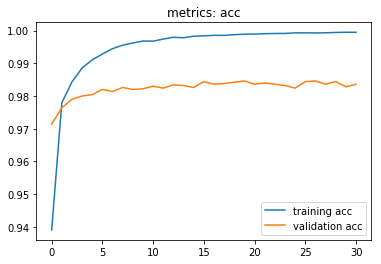

train {'acc': 0.9994909}
test {'acc': 0.9829}

Training student with temperature = 10 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15509006656620696577
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 1934358249803162152
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 176.58888 , acc = 0.31 
Epoch 1 , step 100 , loss= 123.587715 , acc = 0.93 
Epoch 1 , step 200 , loss= 121.263374 , acc = 0.98 
Epoch 1 , step 300 , loss= 125.22782 , acc = 0.93 
Epoch 1 , step 400 , loss= 123.83485 , acc = 0.99 
Epoch 1 , step 500 , loss= 124.780136 , acc = 0.98 
Epoch 1 , step 549 , loss= 115.57423 val_loss= 117.96217 , acc = 0.94 val acc = 0.97 
Epoch 1 finished, loss= 122.66017 val loss= 117.96217 ,  acc = 0.93527275 val acc = 0.97
val_acc impr

Epoch 17 , step 500 , loss= 120.47702 , acc = 1.0 
Epoch 17 , step 549 , loss= 119.986595 val_loss= 117.01125 , acc = 1.0 val acc = 0.983 
Epoch 17 finished, loss= 118.323 val loss= 117.01125 ,  acc = 0.9951091 val acc = 0.983

Epoch 18 , step 50 , loss= 116.28678 , acc = 1.0 
Epoch 18 , step 150 , loss= 116.24374 , acc = 1.0 
Epoch 18 , step 250 , loss= 118.59311 , acc = 0.99 
Epoch 18 , step 350 , loss= 119.909096 , acc = 1.0 
Epoch 18 , step 450 , loss= 117.12115 , acc = 0.99 
Epoch 18 , step 549 , loss= 119.54482 val_loss= 117.03614 , acc = 0.99 val acc = 0.9828 
Epoch 18 finished, loss= 118.31641 val loss= 117.03614 ,  acc = 0.99545455 val acc = 0.9828

Epoch 19 , step 0 , loss= 120.79693 , acc = 1.0 
Epoch 19 , step 100 , loss= 116.155045 , acc = 0.98 
Epoch 19 , step 200 , loss= 124.467606 , acc = 1.0 
Epoch 19 , step 300 , loss= 123.80572 , acc = 0.99 
Epoch 19 , step 400 , loss= 114.76584 , acc = 0.98 
Epoch 19 , step 500 , loss= 113.07302 , acc = 1.0 
Epoch 19 , step 549 , lo

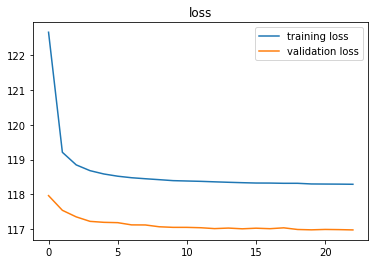

Plotting metrics...


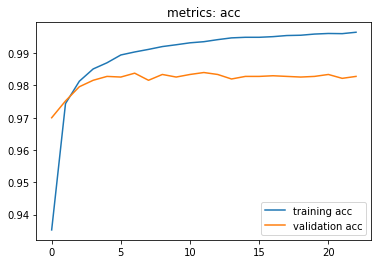

train {'acc': 0.9961636}
test {'acc': 0.9817}

Training student with temperature = 10 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15390801043653915155
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 3273319935068303891
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 231.21686 , acc = 0.29 
Epoch 1 , step 100 , loss= 165.11166 , acc = 0.93 
Epoch 1 , step 200 , loss= 162.59567 , acc = 0.94 
Epoch 1 , step 300 , loss= 160.21083 , acc = 0.96 
Epoch 1 , step 400 , loss= 147.99867 , acc = 0.97 
Epoch 1 , step 500 , loss= 166.64128 , acc = 0.95 
Epoch 1 , step 549 , loss= 155.0516 val_loss= 157.28702 , acc = 0.99 val acc = 0.9664 
Epoch 1 finished, loss= 163.34363 val loss= 157.28702 ,  acc = 0.93230915 val acc = 0.9664
val_acc improv

Epoch 17 , step 500 , loss= 154.9078 , acc = 0.99 
Epoch 17 , step 549 , loss= 165.17514 val_loss= 155.98009 , acc = 0.98 val acc = 0.9816 
Epoch 17 finished, loss= 157.75278 val loss= 155.98009 ,  acc = 0.99141824 val acc = 0.9816

Epoch 18 , step 50 , loss= 151.63637 , acc = 1.0 
Epoch 18 , step 150 , loss= 152.82191 , acc = 0.99 
Epoch 18 , step 250 , loss= 150.69012 , acc = 1.0 
Epoch 18 , step 350 , loss= 158.10645 , acc = 1.0 
Epoch 18 , step 450 , loss= 160.01175 , acc = 0.98 
Epoch 18 , step 549 , loss= 159.59744 val_loss= 155.97472 , acc = 0.97 val acc = 0.9804 
Epoch 18 finished, loss= 157.74628 val loss= 155.97472 ,  acc = 0.9915636 val acc = 0.9804

Epoch 19 , step 0 , loss= 157.05429 , acc = 1.0 
Epoch 19 , step 100 , loss= 152.38263 , acc = 1.0 
Epoch 19 , step 200 , loss= 167.12555 , acc = 1.0 
Epoch 19 , step 300 , loss= 159.08916 , acc = 0.99 
Epoch 19 , step 400 , loss= 163.49011 , acc = 0.99 
Epoch 19 , step 500 , loss= 158.24477 , acc = 0.99 
Epoch 19 , step 549 , l

Epoch 35 , step 200 , loss= 164.0557 , acc = 0.98 
Epoch 35 , step 300 , loss= 163.22981 , acc = 1.0 
Epoch 35 , step 400 , loss= 158.93958 , acc = 0.99 
Epoch 35 , step 500 , loss= 165.29858 , acc = 0.99 
Epoch 35 , step 549 , loss= 166.8194 val_loss= 155.92923 , acc = 1.0 val acc = 0.9818 
Epoch 35 finished, loss= 157.66829 val loss= 155.92923 ,  acc = 0.99345446 val acc = 0.9818

Epoch 36 , step 50 , loss= 161.54245 , acc = 0.99 
Epoch 36 , step 150 , loss= 161.9314 , acc = 0.99 
Epoch 36 , step 250 , loss= 160.10532 , acc = 0.98 
Epoch 36 , step 350 , loss= 156.57579 , acc = 1.0 
Epoch 36 , step 450 , loss= 151.8135 , acc = 0.98 
Epoch 36 , step 549 , loss= 155.16135 val_loss= 155.93953 , acc = 1.0 val acc = 0.9822 
Epoch 36 finished, loss= 157.66467 val loss= 155.93953 ,  acc = 0.9932 val acc = 0.9822

Epoch 37 , step 0 , loss= 155.17535 , acc = 1.0 
Epoch 37 , step 100 , loss= 162.13892 , acc = 1.0 
Epoch 37 , step 200 , loss= 159.38745 , acc = 0.99 
Epoch 37 , step 300 , loss= 1

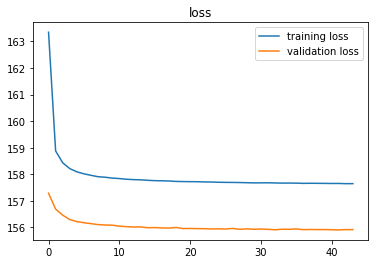

Plotting metrics...


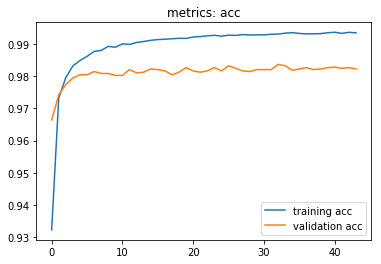

train {'acc': 0.99341816}
test {'acc': 0.9811}

Training student with temperature = 15 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16946210390697143292
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 12878707891762017140
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 4.4478254 , acc = 0.22 
Epoch 1 , step 100 , loss= 0.20909046 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.12900597 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.11990272 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.071730144 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.066564225 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.10579915 val_loss= 0.105912894 , acc = 0.95 val acc = 0.9686 
Epoch 1 finished, loss= 0.22380795 val loss= 0.105912894 ,  acc = 0.94601804 val acc = 0.968

Epoch 17 , step 100 , loss= 0.0032224834 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.03627108 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.01791397 , acc = 1.0 
Epoch 17 , step 400 , loss= 3.650812e-05 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.018465422 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0011446363 val_loss= 0.10419016 , acc = 1.0 val acc = 0.9802 
Epoch 17 finished, loss= 0.010854102 val loss= 0.10419016 ,  acc = 0.99969083 val acc = 0.9802

Epoch 18 , step 50 , loss= 0.0016407995 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0007277409 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0005987793 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0030887993 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.01667155 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.00025908326 val_loss= 0.08832024 , acc = 1.0 val acc = 0.9842 
Epoch 18 finished, loss= 0.010430917 val loss= 0.08832024 ,  acc = 0.99965453 val acc = 0.9842
val_acc improved. 
Epoch 19 , step 0 , loss= 0.0026995952 , acc = 1.0 
Epoch 19 , step 100 ,

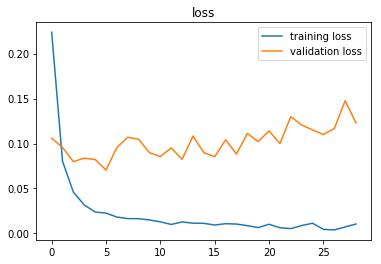

Plotting metrics...


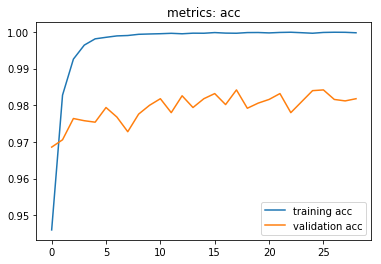

train {'acc': 0.9972182}
test {'acc': 0.9797}

Training student with temperature = 15 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4312132741912485878
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 907764028547514577
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 132.53204 , acc = 0.47 
Epoch 1 , step 100 , loss= 112.21134 , acc = 0.96 
Epoch 1 , step 200 , loss= 113.188576 , acc = 0.96 
Epoch 1 , step 300 , loss= 111.24348 , acc = 0.95 
Epoch 1 , step 400 , loss= 107.09692 , acc = 0.99 
Epoch 1 , step 500 , loss= 109.731125 , acc = 1.0 
Epoch 1 , step 549 , loss= 111.25935 val_loss= 109.03727 , acc = 0.96 val acc = 0.972 
Epoch 1 finished, loss= 111.073975 val loss= 109.03727 ,  acc = 0.94092727 val acc = 0.972
val_acc impro

Epoch 17 , step 500 , loss= 109.17738 , acc = 1.0 
Epoch 17 , step 549 , loss= 107.52227 val_loss= 108.55056 , acc = 1.0 val acc = 0.9838 
Epoch 17 finished, loss= 109.04331 val loss= 108.55056 ,  acc = 0.999909 val acc = 0.9838

Epoch 18 , step 50 , loss= 110.23188 , acc = 1.0 
Epoch 18 , step 150 , loss= 107.731606 , acc = 1.0 
Epoch 18 , step 250 , loss= 108.67719 , acc = 1.0 
Epoch 18 , step 350 , loss= 110.781876 , acc = 1.0 
Epoch 18 , step 450 , loss= 110.03018 , acc = 1.0 
Epoch 18 , step 549 , loss= 109.07314 val_loss= 108.5452 , acc = 1.0 val acc = 0.9834 
Epoch 18 finished, loss= 109.03784 val loss= 108.5452 ,  acc = 0.9999272 val acc = 0.9834

Epoch 19 , step 0 , loss= 109.10635 , acc = 1.0 
Epoch 19 , step 100 , loss= 110.90657 , acc = 1.0 
Epoch 19 , step 200 , loss= 110.02252 , acc = 1.0 
Epoch 19 , step 300 , loss= 110.07665 , acc = 1.0 
Epoch 19 , step 400 , loss= 106.075226 , acc = 1.0 
Epoch 19 , step 500 , loss= 109.55356 , acc = 1.0 
Epoch 19 , step 549 , loss= 109

Epoch 35 , step 400 , loss= 108.42997 , acc = 1.0 
Epoch 35 , step 500 , loss= 109.409256 , acc = 1.0 
Epoch 35 , step 549 , loss= 110.33353 val_loss= 108.52859 , acc = 1.0 val acc = 0.9856 
Epoch 35 finished, loss= 109.0121 val loss= 108.52859 ,  acc = 1.0 val acc = 0.9856

Epoch 36 , step 50 , loss= 106.179276 , acc = 1.0 
Epoch 36 , step 150 , loss= 111.296425 , acc = 1.0 
Epoch 36 , step 250 , loss= 107.973595 , acc = 1.0 
Epoch 36 , step 350 , loss= 107.46661 , acc = 1.0 
Epoch 36 , step 450 , loss= 108.03453 , acc = 1.0 
Epoch 36 , step 549 , loss= 104.80297 val_loss= 108.5257 , acc = 1.0 val acc = 0.9846 
Epoch 36 finished, loss= 109.01153 val loss= 108.5257 ,  acc = 1.0 val acc = 0.9846

Epoch 37 , step 0 , loss= 107.26067 , acc = 1.0 
Epoch 37 , step 100 , loss= 112.25981 , acc = 1.0 
Epoch 37 , step 200 , loss= 110.67283 , acc = 1.0 
Epoch 37 , step 300 , loss= 110.51675 , acc = 1.0 
Epoch 37 , step 400 , loss= 110.32198 , acc = 1.0 
Epoch 37 , step 500 , loss= 109.36516 , ac

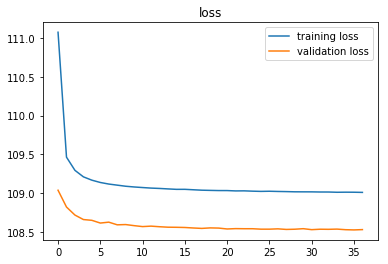

Plotting metrics...


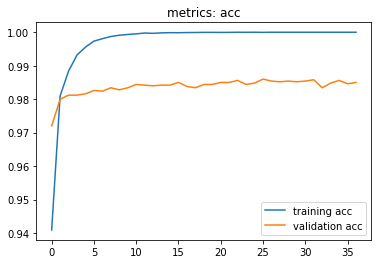

train {'acc': 0.9999818}
test {'acc': 0.9832}

Training student with temperature = 15 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13851919501606257552
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 3955144140426537931
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 260.44992 , acc = 0.43 
Epoch 1 , step 100 , loss= 221.35716 , acc = 0.93 
Epoch 1 , step 200 , loss= 224.41599 , acc = 0.93 
Epoch 1 , step 300 , loss= 222.55275 , acc = 0.96 
Epoch 1 , step 400 , loss= 223.48837 , acc = 0.97 
Epoch 1 , step 500 , loss= 216.47954 , acc = 0.98 
Epoch 1 , step 549 , loss= 217.5063 val_loss= 217.86758 , acc = 0.96 val acc = 0.9704 
Epoch 1 finished, loss= 221.60374 val loss= 217.86758 ,  acc = 0.9345273 val acc = 0.9704
val_acc improve

Epoch 17 , step 500 , loss= 219.92021 , acc = 1.0 
Epoch 17 , step 549 , loss= 216.43289 val_loss= 217.08376 , acc = 0.99 val acc = 0.9834 
Epoch 17 finished, loss= 218.07452 val loss= 217.08376 ,  acc = 0.99816364 val acc = 0.9834

Epoch 18 , step 50 , loss= 215.58838 , acc = 0.99 
Epoch 18 , step 150 , loss= 212.71716 , acc = 1.0 
Epoch 18 , step 250 , loss= 218.9824 , acc = 1.0 
Epoch 18 , step 350 , loss= 222.5873 , acc = 1.0 
Epoch 18 , step 450 , loss= 219.86351 , acc = 1.0 
Epoch 18 , step 549 , loss= 213.04575 val_loss= 217.03102 , acc = 1.0 val acc = 0.984 
Epoch 18 finished, loss= 218.06918 val loss= 217.03102 ,  acc = 0.9985636 val acc = 0.984

Epoch 19 , step 0 , loss= 220.83304 , acc = 1.0 
Epoch 19 , step 100 , loss= 218.69817 , acc = 1.0 
Epoch 19 , step 200 , loss= 224.70409 , acc = 0.99 
Epoch 19 , step 300 , loss= 216.84276 , acc = 1.0 
Epoch 19 , step 400 , loss= 219.92941 , acc = 1.0 
Epoch 19 , step 500 , loss= 221.02571 , acc = 1.0 
Epoch 19 , step 549 , loss= 219

Epoch 35 , step 400 , loss= 224.13495 , acc = 1.0 
Epoch 35 , step 500 , loss= 217.93376 , acc = 1.0 
Epoch 35 , step 549 , loss= 216.18352 val_loss= 217.00983 , acc = 1.0 val acc = 0.9844 
Epoch 35 finished, loss= 218.0177 val loss= 217.00983 ,  acc = 0.99954545 val acc = 0.9844

Epoch 36 , step 50 , loss= 221.21953 , acc = 1.0 
Epoch 36 , step 150 , loss= 216.18608 , acc = 1.0 
Epoch 36 , step 250 , loss= 215.302 , acc = 1.0 
Epoch 36 , step 350 , loss= 220.70897 , acc = 1.0 
Epoch 36 , step 450 , loss= 213.5352 , acc = 1.0 
Epoch 36 , step 549 , loss= 229.24202 val_loss= 216.99797 , acc = 1.0 val acc = 0.9838 
Epoch 36 finished, loss= 218.02151 val loss= 216.99797 ,  acc = 0.9996181 val acc = 0.9838

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.5, 'coef_hardloss': 0.5, 'temperature': 15, 'temperature_effect': 225, 'train_acc': 0.9994, 'test_acc': 0.9824}
Plotting loss...


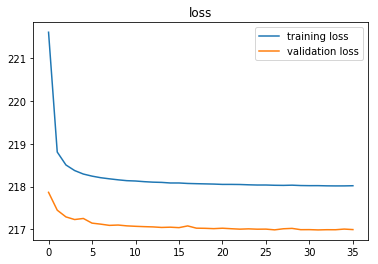

Plotting metrics...


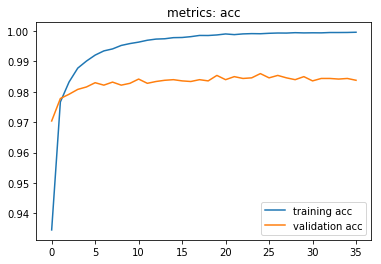

train {'acc': 0.9994}
test {'acc': 0.9824}

Training student with temperature = 15 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6281780971923973843
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 7620934360367459218
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 393.16174 , acc = 0.24 
Epoch 1 , step 100 , loss= 339.47562 , acc = 0.9 
Epoch 1 , step 200 , loss= 332.7089 , acc = 0.95 
Epoch 1 , step 300 , loss= 330.4004 , acc = 0.96 
Epoch 1 , step 400 , loss= 323.75235 , acc = 0.94 
Epoch 1 , step 500 , loss= 328.3781 , acc = 0.97 
Epoch 1 , step 549 , loss= 326.07086 val_loss= 326.73706 , acc = 0.98 val acc = 0.9702 
Epoch 1 finished, loss= 332.44745 val loss= 326.73706 ,  acc = 0.92759997 val acc = 0.9702
val_acc improved. 


Epoch 17 , step 549 , loss= 327.7934 val_loss= 325.49823 , acc = 1.0 val acc = 0.9816 
Epoch 17 finished, loss= 327.10364 val loss= 325.49823 ,  acc = 0.9948182 val acc = 0.9816

Epoch 18 , step 50 , loss= 327.282 , acc = 1.0 
Epoch 18 , step 150 , loss= 331.7636 , acc = 1.0 
Epoch 18 , step 250 , loss= 328.0886 , acc = 0.99 
Epoch 18 , step 350 , loss= 337.384 , acc = 0.99 
Epoch 18 , step 450 , loss= 330.265 , acc = 0.99 
Epoch 18 , step 549 , loss= 328.73593 val_loss= 325.51764 , acc = 1.0 val acc = 0.9808 
Epoch 18 finished, loss= 327.09216 val loss= 325.51764 ,  acc = 0.9948182 val acc = 0.9808

Epoch 19 , step 0 , loss= 327.17136 , acc = 1.0 
Epoch 19 , step 100 , loss= 327.93506 , acc = 0.99 
Epoch 19 , step 200 , loss= 331.88242 , acc = 1.0 
Epoch 19 , step 300 , loss= 331.5497 , acc = 1.0 
Epoch 19 , step 400 , loss= 316.39783 , acc = 1.0 
Epoch 19 , step 500 , loss= 334.06436 , acc = 1.0 
Epoch 19 , step 549 , loss= 318.20734 val_loss= 325.50372 , acc = 1.0 val acc = 0.9826 


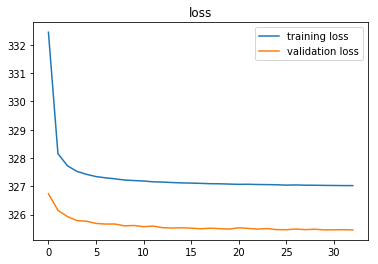

Plotting metrics...


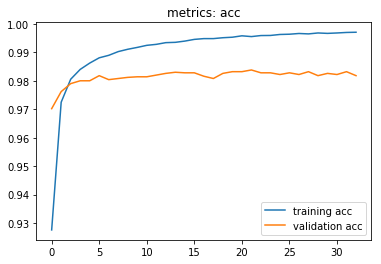

train {'acc': 0.99727273}
test {'acc': 0.9829}

Training student with temperature = 15 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8765218019127806061
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 13128556203729580521
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 520.18524 , acc = 0.39 
Epoch 1 , step 100 , loss= 442.095 , acc = 0.91 
Epoch 1 , step 200 , loss= 432.21442 , acc = 0.98 
Epoch 1 , step 300 , loss= 418.04926 , acc = 0.99 
Epoch 1 , step 400 , loss= 430.03503 , acc = 0.97 
Epoch 1 , step 500 , loss= 437.09927 , acc = 0.92 
Epoch 1 , step 549 , loss= 437.83228 val_loss= 435.56882 , acc = 0.99 val acc = 0.9678 
Epoch 1 finished, loss= 442.99014 val loss= 435.56882 ,  acc = 0.92872727 val acc = 0.9678
val_acc improv

Epoch 17 , step 549 , loss= 439.8678 val_loss= 434.01617 , acc = 0.98 val acc = 0.9822 
Epoch 17 finished, loss= 436.12637 val loss= 434.01617 ,  acc = 0.99107265 val acc = 0.9822

Epoch 18 , step 50 , loss= 434.8093 , acc = 0.99 
Epoch 18 , step 150 , loss= 433.58768 , acc = 1.0 
Epoch 18 , step 250 , loss= 443.07864 , acc = 1.0 
Epoch 18 , step 350 , loss= 442.9931 , acc = 0.98 
Epoch 18 , step 450 , loss= 434.53064 , acc = 1.0 
Epoch 18 , step 549 , loss= 419.36932 val_loss= 433.987 , acc = 0.99 val acc = 0.9814 
Epoch 18 finished, loss= 436.12268 val loss= 433.987 ,  acc = 0.991509 val acc = 0.9814

Epoch 19 , step 0 , loss= 441.5051 , acc = 1.0 
Epoch 19 , step 100 , loss= 450.65918 , acc = 0.99 
Epoch 19 , step 200 , loss= 450.55762 , acc = 0.97 
Epoch 19 , step 300 , loss= 432.48914 , acc = 1.0 
Epoch 19 , step 400 , loss= 424.80234 , acc = 0.97 
Epoch 19 , step 500 , loss= 433.15494 , acc = 0.98 
Epoch 19 , step 549 , loss= 438.47168 val_loss= 433.99054 , acc = 1.0 val acc = 0.

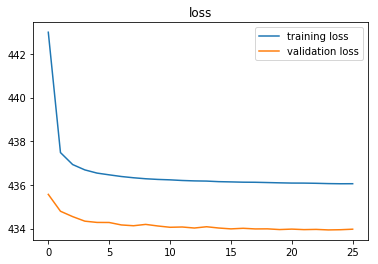

Plotting metrics...


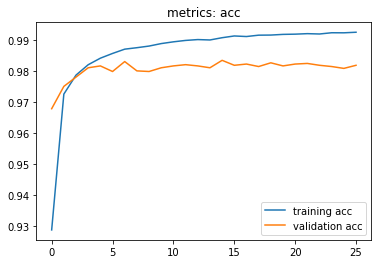

train {'acc': 0.9922364}
test {'acc': 0.982}

Training student with temperature = 20 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12229551761321278501
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 5157799164675330575
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.9392147 , acc = 0.41 
Epoch 1 , step 100 , loss= 0.3020408 , acc = 0.91 
Epoch 1 , step 200 , loss= 0.13839068 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.18452318 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.17000589 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.07991986 , acc = 0.99 
Epoch 1 , step 549 , loss= 0.17132188 val_loss= 0.0980505 , acc = 0.97 val acc = 0.9718 
Epoch 1 finished, loss= 0.21561646 val loss= 0.0980505 ,  acc = 0.9470363 val acc = 0.9718
val_acc i

Epoch 17 , step 100 , loss= 0.0017080912 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.0009343288 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.0033541175 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.006413056 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.0032558525 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0011479388 val_loss= 0.104838535 , acc = 1.0 val acc = 0.979 
Epoch 17 finished, loss= 0.007995801 val loss= 0.104838535 ,  acc = 0.9998182 val acc = 0.979

Epoch 18 , step 50 , loss= 1.9950212e-05 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.00072410755 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.007219541 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.010843702 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0039831353 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0025195999 val_loss= 0.15752973 , acc = 1.0 val acc = 0.9718 
Epoch 18 finished, loss= 0.011324432 val loss= 0.15752973 ,  acc = 0.99965453 val acc = 0.9718

Epoch 19 , step 0 , loss= 0.0005968575 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.00078

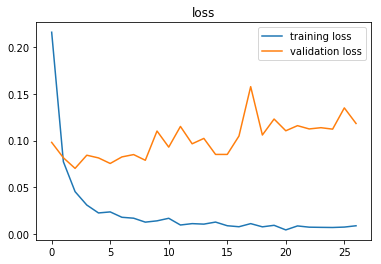

Plotting metrics...


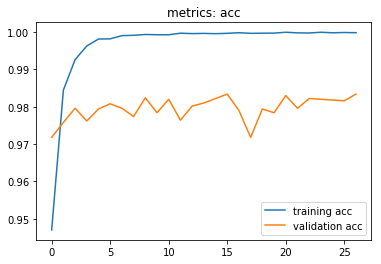

train {'acc': 0.9977818}
test {'acc': 0.9797}

Training student with temperature = 20 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13247801064806118642
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 556201807345861215
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 233.02853 , acc = 0.28 
Epoch 1 , step 100 , loss= 214.95605 , acc = 0.95 
Epoch 1 , step 200 , loss= 211.25417 , acc = 0.93 
Epoch 1 , step 300 , loss= 206.123 , acc = 0.94 
Epoch 1 , step 400 , loss= 212.6948 , acc = 1.0 
Epoch 1 , step 500 , loss= 211.56917 , acc = 0.97 
Epoch 1 , step 549 , loss= 209.023 val_loss= 209.62598 , acc = 0.97 val acc = 0.9706 
Epoch 1 finished, loss= 211.76006 val loss= 209.62598 ,  acc = 0.94107264 val acc = 0.9706
val_acc improved. 

Epoch 17 , step 549 , loss= 209.64253 val_loss= 209.12646 , acc = 1.0 val acc = 0.9854 
Epoch 17 finished, loss= 209.64668 val loss= 209.12646 ,  acc = 0.9999272 val acc = 0.9854

Epoch 18 , step 50 , loss= 206.77408 , acc = 1.0 
Epoch 18 , step 150 , loss= 207.23915 , acc = 1.0 
Epoch 18 , step 250 , loss= 213.7168 , acc = 1.0 
Epoch 18 , step 350 , loss= 210.72437 , acc = 1.0 
Epoch 18 , step 450 , loss= 211.69751 , acc = 1.0 
Epoch 18 , step 549 , loss= 212.39597 val_loss= 209.13052 , acc = 1.0 val acc = 0.9846 
Epoch 18 finished, loss= 209.64088 val loss= 209.13052 ,  acc = 0.999909 val acc = 0.9846

Epoch 19 , step 0 , loss= 208.75325 , acc = 1.0 
Epoch 19 , step 100 , loss= 212.3353 , acc = 1.0 
Epoch 19 , step 200 , loss= 208.33876 , acc = 1.0 
Epoch 19 , step 300 , loss= 207.92369 , acc = 1.0 
Epoch 19 , step 400 , loss= 209.3952 , acc = 1.0 
Epoch 19 , step 500 , loss= 211.11708 , acc = 1.0 
Epoch 19 , step 549 , loss= 206.15627 val_loss= 209.12836 , acc = 1.0 val acc = 0.9854

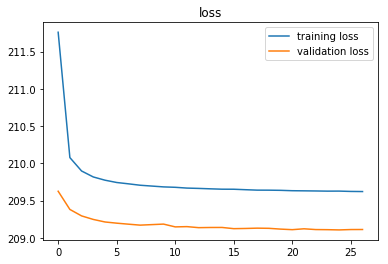

Plotting metrics...


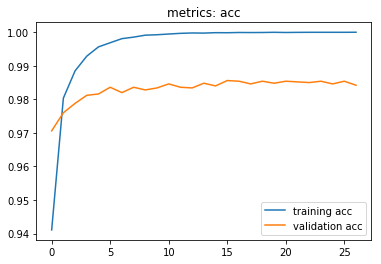

train {'acc': 1.0}
test {'acc': 0.9845}

Training student with temperature = 20 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1261697727130550730
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739766989
locality {
  bus_id: 1
}
incarnation: 8300951203213069713
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 464.16312 , acc = 0.42 
Epoch 1 , step 100 , loss= 422.6592 , acc = 0.89 
Epoch 1 , step 200 , loss= 425.54962 , acc = 0.94 
Epoch 1 , step 300 , loss= 413.15164 , acc = 0.96 
Epoch 1 , step 400 , loss= 420.52908 , acc = 0.98 
Epoch 1 , step 500 , loss= 417.61273 , acc = 0.97 
Epoch 1 , step 549 , loss= 417.37872 val_loss= 419.15225 , acc = 0.94 val acc = 0.9682 
Epoch 1 finished, loss= 423.08212 val loss= 419.15225 ,  acc = 0.9337453 val acc = 0.9682
val_acc improved. 
Epo

Epoch 17 , step 549 , loss= 413.48914 val_loss= 418.18222 , acc = 1.0 val acc = 0.9844 
Epoch 17 finished, loss= 419.27557 val loss= 418.18222 ,  acc = 0.9982546 val acc = 0.9844

Epoch 18 , step 50 , loss= 420.8657 , acc = 0.99 
Epoch 18 , step 150 , loss= 414.0706 , acc = 1.0 
Epoch 18 , step 250 , loss= 417.15005 , acc = 1.0 
Epoch 18 , step 350 , loss= 420.88596 , acc = 1.0 
Epoch 18 , step 450 , loss= 419.94656 , acc = 0.99 
Epoch 18 , step 549 , loss= 425.18088 val_loss= 418.20786 , acc = 1.0 val acc = 0.9854 
Epoch 18 finished, loss= 419.27008 val loss= 418.20786 ,  acc = 0.9984364 val acc = 0.9854
val_acc improved. 
Epoch 19 , step 0 , loss= 419.88904 , acc = 0.99 
Epoch 19 , step 100 , loss= 417.4876 , acc = 1.0 
Epoch 19 , step 200 , loss= 423.38336 , acc = 1.0 
Epoch 19 , step 300 , loss= 414.18124 , acc = 1.0 
Epoch 19 , step 400 , loss= 417.5369 , acc = 1.0 
Epoch 19 , step 500 , loss= 419.0255 , acc = 1.0 
Epoch 19 , step 549 , loss= 428.13 val_loss= 418.197 , acc = 1.0 v

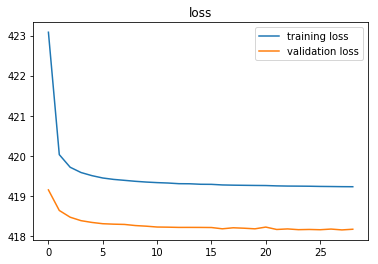

Plotting metrics...


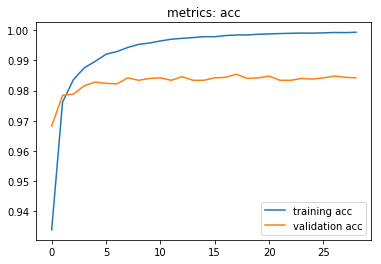

train {'acc': 0.99923635}
test {'acc': 0.9838}

Training student with temperature = 20 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1629763100422626055
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9537549108
locality {
  bus_id: 1
}
incarnation: 8146413298873638999
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 692.29816 , acc = 0.35 
Epoch 1 , step 100 , loss= 636.126 , acc = 0.91 
Epoch 1 , step 200 , loss= 631.75494 , acc = 0.9 
Epoch 1 , step 300 , loss= 630.1721 , acc = 0.94 
Epoch 1 , step 400 , loss= 631.8798 , acc = 0.97 
Epoch 1 , step 500 , loss= 639.05743 , acc = 0.99 
Epoch 1 , step 549 , loss= 630.15466 val_loss= 628.5503 , acc = 0.97 val acc = 0.97 
Epoch 1 finished, loss= 634.37036 val loss= 628.5503 ,  acc = 0.9273273 val acc = 0.97
val_acc improved. 
Epoc

Epoch 17 , step 549 , loss= 635.12726 val_loss= 627.2647 , acc = 0.99 val acc = 0.983 
Epoch 17 finished, loss= 628.91766 val loss= 627.2647 ,  acc = 0.99469084 val acc = 0.983

Epoch 18 , step 50 , loss= 617.31866 , acc = 0.99 
Epoch 18 , step 150 , loss= 634.32294 , acc = 1.0 
Epoch 18 , step 250 , loss= 624.2073 , acc = 1.0 
Epoch 18 , step 350 , loss= 629.1931 , acc = 0.99 
Epoch 18 , step 450 , loss= 627.6593 , acc = 1.0 
Epoch 18 , step 549 , loss= 630.9099 val_loss= 627.2515 , acc = 0.99 val acc = 0.9844 
Epoch 18 finished, loss= 628.89984 val loss= 627.2515 ,  acc = 0.9949454 val acc = 0.9844
val_acc improved. 
Epoch 19 , step 0 , loss= 625.9358 , acc = 1.0 
Epoch 19 , step 100 , loss= 633.86835 , acc = 0.98 
Epoch 19 , step 200 , loss= 623.93335 , acc = 0.98 
Epoch 19 , step 300 , loss= 634.8342 , acc = 0.99 
Epoch 19 , step 400 , loss= 635.7907 , acc = 0.98 
Epoch 19 , step 500 , loss= 626.0299 , acc = 1.0 
Epoch 19 , step 549 , loss= 623.95575 val_loss= 627.24005 , acc = 0.9

Epoch 35 , step 549 , loss= 624.3243 val_loss= 627.2119 , acc = 1.0 val acc = 0.9836 
Epoch 35 finished, loss= 628.8187 val loss= 627.2119 ,  acc = 0.99716365 val acc = 0.9836

Epoch 36 , step 50 , loss= 631.17584 , acc = 1.0 
Epoch 36 , step 150 , loss= 631.5956 , acc = 0.99 
Epoch 36 , step 250 , loss= 625.26996 , acc = 1.0 
Epoch 36 , step 350 , loss= 632.656 , acc = 0.99 
Epoch 36 , step 450 , loss= 636.92426 , acc = 1.0 
Epoch 36 , step 549 , loss= 622.20374 val_loss= 627.1855 , acc = 1.0 val acc = 0.984 
Epoch 36 finished, loss= 628.82263 val loss= 627.1855 ,  acc = 0.99725455 val acc = 0.984

Epoch 37 , step 0 , loss= 633.1045 , acc = 1.0 
Epoch 37 , step 100 , loss= 628.78265 , acc = 1.0 
Epoch 37 , step 200 , loss= 635.8804 , acc = 0.99 
Epoch 37 , step 300 , loss= 627.2155 , acc = 0.99 
Epoch 37 , step 400 , loss= 630.917 , acc = 1.0 
Epoch 37 , step 500 , loss= 636.77496 , acc = 1.0 
Epoch 37 , step 549 , loss= 628.672 val_loss= 627.2049 , acc = 0.99 val acc = 0.9826 
Epoch 

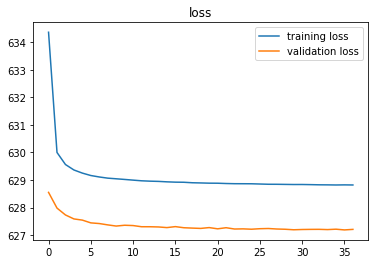

Plotting metrics...


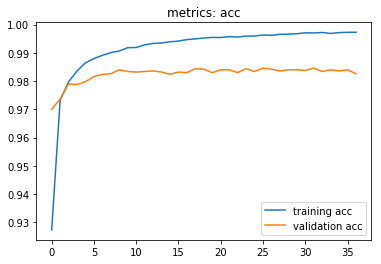

train {'acc': 0.99707276}
test {'acc': 0.9827}

Training student with temperature = 20 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2719757824952146400
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9537549108
locality {
  bus_id: 1
}
incarnation: 5273435393781630730
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 921.9152 , acc = 0.34 
Epoch 1 , step 100 , loss= 844.8616 , acc = 0.92 
Epoch 1 , step 200 , loss= 834.13074 , acc = 0.94 
Epoch 1 , step 300 , loss= 831.5239 , acc = 0.94 
Epoch 1 , step 400 , loss= 837.9919 , acc = 0.97 
Epoch 1 , step 500 , loss= 852.2863 , acc = 0.98 
Epoch 1 , step 549 , loss= 834.7744 val_loss= 838.0558 , acc = 0.97 val acc = 0.968 
Epoch 1 finished, loss= 845.6899 val loss= 838.0558 ,  acc = 0.92670906 val acc = 0.968
val_acc improved. 
Epoch

Epoch 17 , step 549 , loss= 838.17175 val_loss= 836.3659 , acc = 0.99 val acc = 0.982 
Epoch 17 finished, loss= 838.54456 val loss= 836.3659 ,  acc = 0.99039996 val acc = 0.982

Epoch 18 , step 50 , loss= 831.3239 , acc = 0.98 
Epoch 18 , step 150 , loss= 842.20056 , acc = 0.99 
Epoch 18 , step 250 , loss= 835.87885 , acc = 1.0 
Epoch 18 , step 350 , loss= 832.8237 , acc = 1.0 
Epoch 18 , step 450 , loss= 841.53107 , acc = 0.99 
Epoch 18 , step 549 , loss= 842.8982 val_loss= 836.32153 , acc = 0.98 val acc = 0.9822 
Epoch 18 finished, loss= 838.54395 val loss= 836.32153 ,  acc = 0.9910001 val acc = 0.9822

Epoch 19 , step 0 , loss= 838.5666 , acc = 0.99 
Epoch 19 , step 100 , loss= 844.9412 , acc = 0.97 
Epoch 19 , step 200 , loss= 844.29877 , acc = 1.0 
Epoch 19 , step 300 , loss= 838.75543 , acc = 0.99 
Epoch 19 , step 400 , loss= 839.77893 , acc = 1.0 
Epoch 19 , step 500 , loss= 833.20197 , acc = 0.99 
Epoch 19 , step 549 , loss= 838.6079 val_loss= 836.34 , acc = 1.0 val acc = 0.982

Epoch 35 , step 500 , loss= 839.87274 , acc = 0.98 
Epoch 35 , step 549 , loss= 831.7646 val_loss= 836.2488 , acc = 1.0 val acc = 0.9814 
Epoch 35 finished, loss= 838.42554 val loss= 836.2488 ,  acc = 0.99289083 val acc = 0.9814

Epoch 36 , step 50 , loss= 848.24945 , acc = 0.99 
Epoch 36 , step 150 , loss= 833.7709 , acc = 1.0 
Epoch 36 , step 250 , loss= 845.1179 , acc = 1.0 
Epoch 36 , step 350 , loss= 837.45233 , acc = 0.99 
Epoch 36 , step 450 , loss= 843.7192 , acc = 1.0 
Epoch 36 , step 549 , loss= 842.33167 val_loss= 836.2393 , acc = 0.99 val acc = 0.9836 
Epoch 36 finished, loss= 838.4222 val loss= 836.2393 ,  acc = 0.99280006 val acc = 0.9836

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 1.0, 'coef_hardloss': 0.0, 'temperature': 20, 'temperature_effect': 400, 'train_acc': 0.99305457, 'test_acc': 0.9823}
Plotting loss...


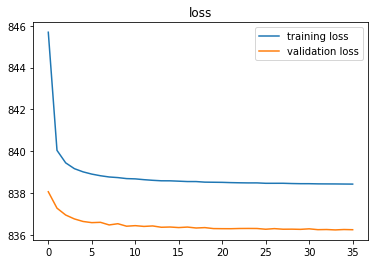

Plotting metrics...


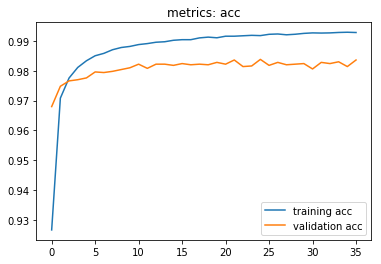

train {'acc': 0.99305457}
test {'acc': 0.9823}

Training student with temperature = 25 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 625 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3782765186131574474
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9537549108
locality {
  bus_id: 1
}
incarnation: 17504484990003696711
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.9964304 , acc = 0.2 
Epoch 1 , step 100 , loss= 0.16282004 , acc = 0.96 
Epoch 1 , step 200 , loss= 0.13590254 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.15146405 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.14271474 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.060769625 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.14748512 val_loss= 0.10939454 , acc = 0.96 val acc = 0.965 
Epoch 1 finished, loss= 0.21979418 val loss= 0.10939454 ,  acc = 0.94763637 val acc = 0.965
val_a

Epoch 17 , step 100 , loss= 5.8751248e-05 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.017103218 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.025611399 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0003229994 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.023231003 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.00958475 val_loss= 0.0895563 , acc = 1.0 val acc = 0.9844 
Epoch 17 finished, loss= 0.010473805 val loss= 0.0895563 ,  acc = 0.99967265 val acc = 0.9844
val_acc improved. 
Epoch 18 , step 50 , loss= 0.0059426893 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.00026868586 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0032616642 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.00034884206 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.011393584 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0043404195 val_loss= 0.086187415 , acc = 1.0 val acc = 0.9826 
Epoch 18 finished, loss= 0.010435299 val loss= 0.086187415 ,  acc = 0.9997091 val acc = 0.9826

Epoch 19 , step 0 , loss= 0.007564536 , acc = 1.0 
Epoch 19 , step 100 

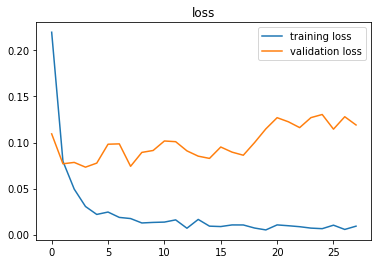

Plotting metrics...


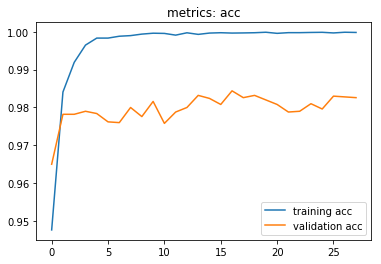

train {'acc': 0.9976364}
test {'acc': 0.9808}

Training student with temperature = 25 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 625 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17827634667172855519
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9537549108
locality {
  bus_id: 1
}
incarnation: 10924146178154138094
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 362.01038 , acc = 0.41 
Epoch 1 , step 100 , loss= 342.43585 , acc = 0.92 
Epoch 1 , step 200 , loss= 340.94714 , acc = 0.93 
Epoch 1 , step 300 , loss= 342.65814 , acc = 0.94 
Epoch 1 , step 400 , loss= 341.30994 , acc = 0.96 
Epoch 1 , step 500 , loss= 343.80478 , acc = 1.0 
Epoch 1 , step 549 , loss= 338.8998 val_loss= 339.51947 , acc = 0.97 val acc = 0.9724 
Epoch 1 finished, loss= 341.62683 val loss= 339.51947 ,  acc = 0.9399818 val acc = 0.9724
val_acc impro

Epoch 17 , step 549 , loss= 337.3917 val_loss= 339.03265 , acc = 1.0 val acc = 0.984 
Epoch 17 finished, loss= 339.5488 val loss= 339.03265 ,  acc = 0.999909 val acc = 0.984

Epoch 18 , step 50 , loss= 341.50418 , acc = 1.0 
Epoch 18 , step 150 , loss= 344.05676 , acc = 1.0 
Epoch 18 , step 250 , loss= 337.29593 , acc = 1.0 
Epoch 18 , step 350 , loss= 339.11673 , acc = 1.0 
Epoch 18 , step 450 , loss= 337.39096 , acc = 1.0 
Epoch 18 , step 549 , loss= 340.17343 val_loss= 339.02045 , acc = 1.0 val acc = 0.9844 
Epoch 18 finished, loss= 339.5439 val loss= 339.02045 ,  acc = 0.9999636 val acc = 0.9844

Epoch 19 , step 0 , loss= 337.0204 , acc = 1.0 
Epoch 19 , step 100 , loss= 341.15564 , acc = 1.0 
Epoch 19 , step 200 , loss= 337.20447 , acc = 1.0 
Epoch 19 , step 300 , loss= 336.1838 , acc = 1.0 
Epoch 19 , step 400 , loss= 336.30005 , acc = 1.0 
Epoch 19 , step 500 , loss= 340.89865 , acc = 1.0 
Epoch 19 , step 549 , loss= 339.75745 val_loss= 339.02542 , acc = 1.0 val acc = 0.9854 
Ep

Epoch 35 , step 549 , loss= 339.6026 val_loss= 339.01917 , acc = 1.0 val acc = 0.984 
Epoch 35 finished, loss= 339.51553 val loss= 339.01917 ,  acc = 1.0 val acc = 0.984

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.25, 'coef_hardloss': 0.75, 'temperature': 25, 'temperature_effect': 625, 'train_acc': 0.99996364, 'test_acc': 0.9854}
Plotting loss...


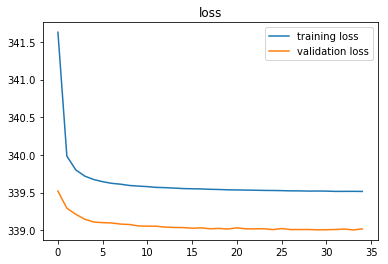

Plotting metrics...


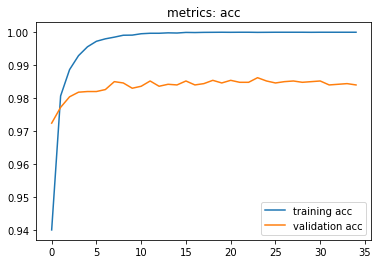

train {'acc': 0.99996364}
test {'acc': 0.9854}

Training student with temperature = 25 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 625 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13150342506746735072
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9385138586
locality {
  bus_id: 1
}
incarnation: 1578968805242041160
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 721.95825 , acc = 0.44 
Epoch 1 , step 100 , loss= 692.1081 , acc = 0.89 
Epoch 1 , step 200 , loss= 684.15546 , acc = 0.96 
Epoch 1 , step 300 , loss= 681.45483 , acc = 0.94 
Epoch 1 , step 400 , loss= 674.9785 , acc = 0.97 
Epoch 1 , step 500 , loss= 678.20734 , acc = 0.99 
Epoch 1 , step 549 , loss= 685.1393 val_loss= 678.8782 , acc = 0.97 val acc = 0.9698 
Epoch 1 finished, loss= 682.82477 val loss= 678.8782 ,  acc = 0.9348 val acc = 0.9698
val_acc improved. 
Ep

Epoch 18 , step 150 , loss= 678.70135 , acc = 1.0 
Epoch 18 , step 250 , loss= 678.1535 , acc = 1.0 
Epoch 18 , step 350 , loss= 682.6463 , acc = 1.0 
Epoch 18 , step 450 , loss= 683.67303 , acc = 1.0 
Epoch 18 , step 549 , loss= 681.01843 val_loss= 677.9863 , acc = 1.0 val acc = 0.9822 
Epoch 18 finished, loss= 679.08044 val loss= 677.9863 ,  acc = 0.9982909 val acc = 0.9822

Epoch 19 , step 0 , loss= 674.3423 , acc = 1.0 
Epoch 19 , step 100 , loss= 677.2674 , acc = 0.99 
Epoch 19 , step 200 , loss= 677.6735 , acc = 1.0 
Epoch 19 , step 300 , loss= 680.4863 , acc = 1.0 
Epoch 19 , step 400 , loss= 671.38226 , acc = 1.0 
Epoch 19 , step 500 , loss= 676.834 , acc = 1.0 
Epoch 19 , step 549 , loss= 684.66986 val_loss= 677.9995 , acc = 1.0 val acc = 0.9828 
Epoch 19 finished, loss= 679.07764 val loss= 677.9995 ,  acc = 0.9983454 val acc = 0.9828

Epoch 20 , step 50 , loss= 679.8358 , acc = 1.0 
Epoch 20 , step 150 , loss= 682.5722 , acc = 1.0 
Epoch 20 , step 250 , loss= 681.3203 , acc =

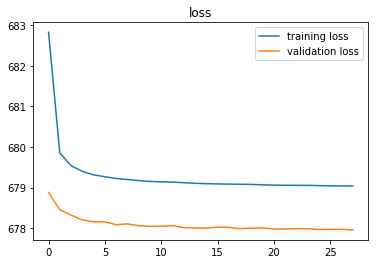

Plotting metrics...


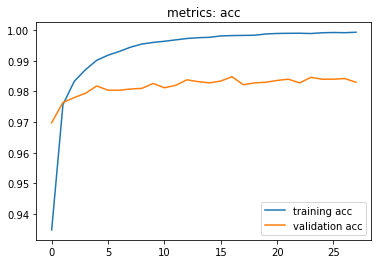

train {'acc': 0.9992909}
test {'acc': 0.9827}

Training student with temperature = 25 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 625 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4848101306532588304
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9385138586
locality {
  bus_id: 1
}
incarnation: 10360234631341187313
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 1081.2345 , acc = 0.28 
Epoch 1 , step 100 , loss= 1030.0828 , acc = 0.93 
Epoch 1 , step 200 , loss= 1015.52856 , acc = 0.91 
Epoch 1 , step 300 , loss= 1015.3143 , acc = 0.98 
Epoch 1 , step 400 , loss= 1020.7537 , acc = 0.96 
Epoch 1 , step 500 , loss= 1008.74133 , acc = 0.98 
Epoch 1 , step 549 , loss= 1014.1697 val_loss= 1018.31274 , acc = 0.96 val acc = 0.966 
Epoch 1 finished, loss= 1024.0929 val loss= 1018.31274 ,  acc = 0.9280182 val acc = 0.966
val_acc im

Epoch 17 , step 300 , loss= 1019.5812 , acc = 1.0 
Epoch 17 , step 400 , loss= 1021.88275 , acc = 1.0 
Epoch 17 , step 500 , loss= 1022.60974 , acc = 1.0 
Epoch 17 , step 549 , loss= 1019.3701 val_loss= 1016.9683 , acc = 1.0 val acc = 0.9828 
Epoch 17 finished, loss= 1018.6249 val loss= 1016.9683 ,  acc = 0.99460006 val acc = 0.9828

Epoch 18 , step 50 , loss= 1020.7286 , acc = 1.0 
Epoch 18 , step 150 , loss= 1023.9776 , acc = 1.0 
Epoch 18 , step 250 , loss= 1017.4064 , acc = 0.98 
Epoch 18 , step 350 , loss= 1008.1789 , acc = 1.0 
Epoch 18 , step 450 , loss= 1011.12335 , acc = 1.0 
Epoch 18 , step 549 , loss= 1022.1669 val_loss= 1016.9633 , acc = 1.0 val acc = 0.9812 
Epoch 18 finished, loss= 1018.60944 val loss= 1016.9633 ,  acc = 0.995 val acc = 0.9812

Epoch 19 , step 0 , loss= 1022.04114 , acc = 1.0 
Epoch 19 , step 100 , loss= 1023.6625 , acc = 1.0 
Epoch 19 , step 200 , loss= 1017.3157 , acc = 1.0 
Epoch 19 , step 300 , loss= 1021.3789 , acc = 0.99 
Epoch 19 , step 400 , loss=

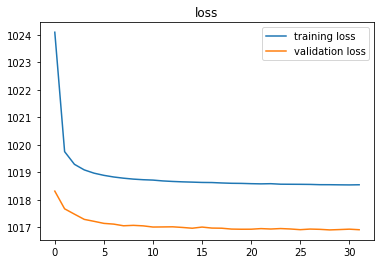

Plotting metrics...


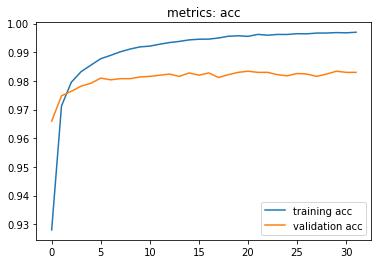

train {'acc': 0.99709094}
test {'acc': 0.9831}

Training student with temperature = 25 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 625 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9971760341092044805
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9385138586
locality {
  bus_id: 1
}
incarnation: 17199376547560930397
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 1442.1884 , acc = 0.32 
Epoch 1 , step 100 , loss= 1356.6794 , acc = 0.9 
Epoch 1 , step 200 , loss= 1349.2853 , acc = 0.97 
Epoch 1 , step 300 , loss= 1368.5181 , acc = 0.94 
Epoch 1 , step 400 , loss= 1362.0725 , acc = 0.96 
Epoch 1 , step 500 , loss= 1371.7703 , acc = 0.96 
Epoch 1 , step 549 , loss= 1376.0829 val_loss= 1357.6752 , acc = 0.97 val acc = 0.9698 
Epoch 1 finished, loss= 1365.2766 val loss= 1357.6752 ,  acc = 0.92454547 val acc = 0.9698
val_acc impro

Epoch 17 , step 400 , loss= 1363.2559 , acc = 0.98 
Epoch 17 , step 500 , loss= 1351.9908 , acc = 0.99 
Epoch 17 , step 549 , loss= 1359.1235 val_loss= 1355.9325 , acc = 0.99 val acc = 0.9826 
Epoch 17 finished, loss= 1358.1519 val loss= 1355.9325 ,  acc = 0.99060005 val acc = 0.9826
val_acc improved. 
Epoch 18 , step 50 , loss= 1358.5305 , acc = 1.0 
Epoch 18 , step 150 , loss= 1354.7706 , acc = 1.0 
Epoch 18 , step 250 , loss= 1354.2278 , acc = 1.0 
Epoch 18 , step 350 , loss= 1362.8375 , acc = 0.99 
Epoch 18 , step 450 , loss= 1355.1635 , acc = 1.0 
Epoch 18 , step 549 , loss= 1364.2075 val_loss= 1355.905 , acc = 1.0 val acc = 0.983 
Epoch 18 finished, loss= 1358.1345 val loss= 1355.905 ,  acc = 0.99056363 val acc = 0.983
val_acc improved. 
Epoch 19 , step 0 , loss= 1367.3092 , acc = 0.99 
Epoch 19 , step 100 , loss= 1363.106 , acc = 0.99 
Epoch 19 , step 200 , loss= 1361.4769 , acc = 1.0 
Epoch 19 , step 300 , loss= 1351.7275 , acc = 1.0 
Epoch 19 , step 400 , loss= 1351.9791 , acc

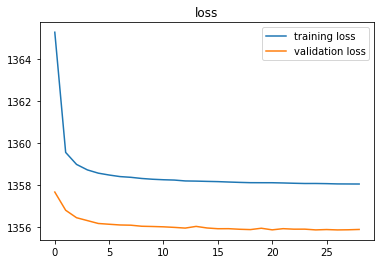

Plotting metrics...


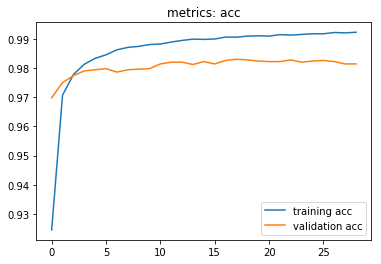

train {'acc': 0.99192727}
test {'acc': 0.9815}

Training student with temperature = 30 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 900 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16729366967383729083
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9385138586
locality {
  bus_id: 1
}
incarnation: 5429582690423203293
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.7717445 , acc = 0.28 
Epoch 1 , step 100 , loss= 0.1889557 , acc = 0.95 
Epoch 1 , step 200 , loss= 0.22806026 , acc = 0.94 
Epoch 1 , step 300 , loss= 0.2233538 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.0748836 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.17408936 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.17564835 val_loss= 0.1048714 , acc = 0.95 val acc = 0.9698 
Epoch 1 finished, loss= 0.21539667 val loss= 0.1048714 ,  acc = 0.9465272 val acc = 0.9698
val_acc i

Epoch 17 , step 100 , loss= 0.037196767 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.0009985093 , acc = 1.0 
Epoch 17 , step 300 , loss= 5.96894e-05 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.016861517 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.037815467 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.001223123 val_loss= 0.098575756 , acc = 1.0 val acc = 0.982 
Epoch 17 finished, loss= 0.012119848 val loss= 0.098575756 ,  acc = 0.999709 val acc = 0.982

Epoch 18 , step 50 , loss= 0.007561112 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0015165929 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.011514482 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0002164703 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.031277873 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.02055532 val_loss= 0.11445541 , acc = 1.0 val acc = 0.9784 
Epoch 18 finished, loss= 0.0070898132 val loss= 0.11445541 ,  acc = 0.9998909 val acc = 0.9784

Epoch 19 , step 0 , loss= 7.8932855e-05 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.00712863 , acc

Epoch 34 , step 150 , loss= 0.00036695588 , acc = 1.0 
Epoch 34 , step 250 , loss= 0.00554389 , acc = 1.0 
Epoch 34 , step 350 , loss= 0.00040302068 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.01229378 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.011851452 val_loss= 0.1378344 , acc = 1.0 val acc = 0.982 
Epoch 34 finished, loss= 0.011355184 val loss= 0.1378344 ,  acc = 0.999709 val acc = 0.982

Epoch 35 , step 0 , loss= 0.014091069 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.00020873606 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.00022452934 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.0004133041 , acc = 1.0 
Epoch 35 , step 400 , loss= 8.933507e-06 , acc = 1.0 
Epoch 35 , step 500 , loss= 1.7525213e-05 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.00055933656 val_loss= 0.1341615 , acc = 1.0 val acc = 0.9846 
Epoch 35 finished, loss= 0.0052698883 val loss= 0.1341615 ,  acc = 0.9999272 val acc = 0.9846

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_sof

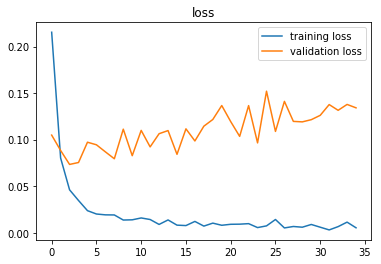

Plotting metrics...


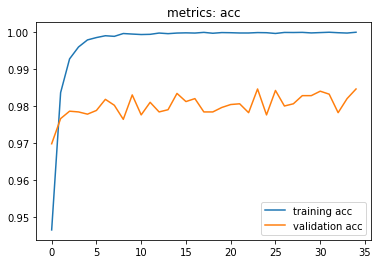

train {'acc': 0.99954545}
test {'acc': 0.9849}

Training student with temperature = 30 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 900 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14939264266183525140
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9385138586
locality {
  bus_id: 1
}
incarnation: 12654779309343513111
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 520.9753 , acc = 0.43 
Epoch 1 , step 100 , loss= 503.19305 , acc = 0.96 
Epoch 1 , step 200 , loss= 500.356 , acc = 0.95 
Epoch 1 , step 300 , loss= 501.96725 , acc = 0.91 
Epoch 1 , step 400 , loss= 501.59894 , acc = 0.94 
Epoch 1 , step 500 , loss= 498.9859 , acc = 0.95 
Epoch 1 , step 549 , loss= 502.18573 val_loss= 498.29742 , acc = 0.97 val acc = 0.9706 
Epoch 1 finished, loss= 500.34836 val loss= 498.29742 ,  acc = 0.94087267 val acc = 0.9706
val_acc impro

Epoch 17 , step 549 , loss= 500.06467 val_loss= 497.7728 , acc = 1.0 val acc = 0.984 
Epoch 17 finished, loss= 498.28598 val loss= 497.7728 ,  acc = 0.9999454 val acc = 0.984
val_acc improved. 
Epoch 18 , step 50 , loss= 495.1419 , acc = 1.0 
Epoch 18 , step 150 , loss= 500.22342 , acc = 1.0 
Epoch 18 , step 250 , loss= 496.58188 , acc = 1.0 
Epoch 18 , step 350 , loss= 497.07166 , acc = 1.0 
Epoch 18 , step 450 , loss= 496.6181 , acc = 1.0 
Epoch 18 , step 549 , loss= 496.83224 val_loss= 497.7719 , acc = 1.0 val acc = 0.9846 
Epoch 18 finished, loss= 498.28268 val loss= 497.7719 ,  acc = 0.9999454 val acc = 0.9846
val_acc improved. 
Epoch 19 , step 0 , loss= 497.52594 , acc = 1.0 
Epoch 19 , step 100 , loss= 494.6169 , acc = 1.0 
Epoch 19 , step 200 , loss= 501.91635 , acc = 1.0 
Epoch 19 , step 300 , loss= 496.72122 , acc = 1.0 
Epoch 19 , step 400 , loss= 500.1064 , acc = 1.0 
Epoch 19 , step 500 , loss= 497.1215 , acc = 1.0 
Epoch 19 , step 549 , loss= 498.3354 val_loss= 497.77228 

Epoch 35 , step 549 , loss= 499.4875 val_loss= 497.7494 , acc = 1.0 val acc = 0.9848 
Epoch 35 finished, loss= 498.2517 val loss= 497.7494 ,  acc = 1.0 val acc = 0.9848

Epoch 36 , step 50 , loss= 501.99054 , acc = 1.0 
Epoch 36 , step 150 , loss= 499.56128 , acc = 1.0 
Epoch 36 , step 250 , loss= 494.18542 , acc = 1.0 
Epoch 36 , step 350 , loss= 496.68143 , acc = 1.0 
Epoch 36 , step 450 , loss= 496.6692 , acc = 1.0 
Epoch 36 , step 549 , loss= 494.92102 val_loss= 497.74704 , acc = 1.0 val acc = 0.984 
Epoch 36 finished, loss= 498.25342 val loss= 497.74704 ,  acc = 1.0 val acc = 0.984

Epoch 37 , step 0 , loss= 498.06305 , acc = 1.0 
Epoch 37 , step 100 , loss= 496.5729 , acc = 1.0 
Epoch 37 , step 200 , loss= 496.61603 , acc = 1.0 
Epoch 37 , step 300 , loss= 493.0186 , acc = 1.0 
Epoch 37 , step 400 , loss= 498.753 , acc = 1.0 
Epoch 37 , step 500 , loss= 501.03613 , acc = 1.0 
Epoch 37 , step 549 , loss= 496.94757 val_loss= 497.74854 , acc = 1.0 val acc = 0.9846 
Epoch 37 finished

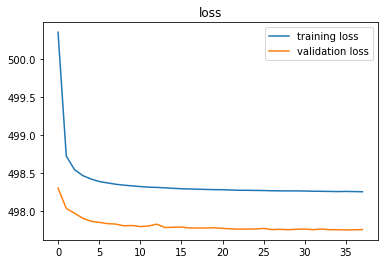

Plotting metrics...


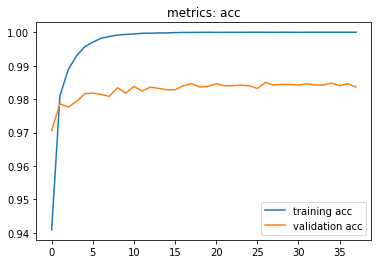

train {'acc': 1.0}
test {'acc': 0.9831}

Training student with temperature = 30 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 900 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8151573143249551241
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9385138586
locality {
  bus_id: 1
}
incarnation: 2648517910886695994
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 1038.2722 , acc = 0.32 
Epoch 1 , step 100 , loss= 999.7429 , acc = 0.94 
Epoch 1 , step 200 , loss= 995.6467 , acc = 0.95 
Epoch 1 , step 300 , loss= 999.507 , acc = 0.97 
Epoch 1 , step 400 , loss= 997.2725 , acc = 0.96 
Epoch 1 , step 500 , loss= 993.6615 , acc = 0.98 
Epoch 1 , step 549 , loss= 989.7926 val_loss= 996.3916 , acc = 1.0 val acc = 0.971 
Epoch 1 finished, loss= 1000.3232 val loss= 996.3916 ,  acc = 0.9325455 val acc = 0.971
val_acc improved. 
Epoch 2 , step

Epoch 17 , step 549 , loss= 996.72815 val_loss= 995.49176 , acc = 1.0 val acc = 0.984 
Epoch 17 finished, loss= 996.5651 val loss= 995.49176 ,  acc = 0.9981272 val acc = 0.984

Epoch 18 , step 50 , loss= 1002.40845 , acc = 1.0 
Epoch 18 , step 150 , loss= 990.3693 , acc = 1.0 
Epoch 18 , step 250 , loss= 1002.44244 , acc = 1.0 
Epoch 18 , step 350 , loss= 995.4486 , acc = 1.0 
Epoch 18 , step 450 , loss= 994.2536 , acc = 0.98 
Epoch 18 , step 549 , loss= 995.10284 val_loss= 995.4798 , acc = 1.0 val acc = 0.9842 
Epoch 18 finished, loss= 996.5514 val loss= 995.4798 ,  acc = 0.9986728 val acc = 0.9842

Epoch 19 , step 0 , loss= 997.12616 , acc = 1.0 
Epoch 19 , step 100 , loss= 998.18475 , acc = 1.0 
Epoch 19 , step 200 , loss= 1001.0599 , acc = 1.0 
Epoch 19 , step 300 , loss= 994.56256 , acc = 1.0 
Epoch 19 , step 400 , loss= 991.4879 , acc = 1.0 
Epoch 19 , step 500 , loss= 998.661 , acc = 1.0 
Epoch 19 , step 549 , loss= 994.74646 val_loss= 995.468 , acc = 1.0 val acc = 0.9836 
Epoch

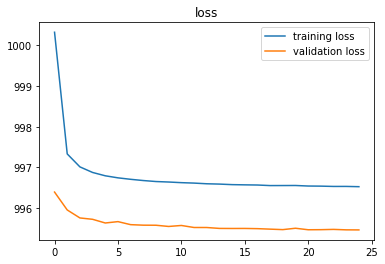

Plotting metrics...


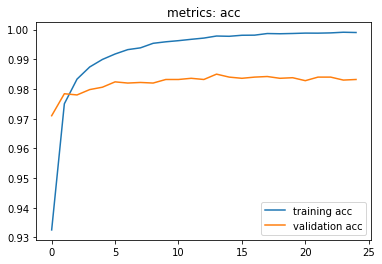

train {'acc': 0.99921817}
test {'acc': 0.9833}

Training student with temperature = 30 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 900 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4155098374675121030
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9385138586
locality {
  bus_id: 1
}
incarnation: 725355387535885564
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 1555.8619 , acc = 0.37 
Epoch 1 , step 100 , loss= 1507.7196 , acc = 0.93 
Epoch 1 , step 200 , loss= 1500.151 , acc = 0.95 
Epoch 1 , step 300 , loss= 1504.5618 , acc = 0.97 
Epoch 1 , step 400 , loss= 1503.2942 , acc = 0.96 
Epoch 1 , step 500 , loss= 1504.3489 , acc = 0.95 
Epoch 1 , step 549 , loss= 1497.2141 val_loss= 1494.5396 , acc = 0.95 val acc = 0.9664 
Epoch 1 finished, loss= 1500.1571 val loss= 1494.5396 ,  acc = 0.9293636 val acc = 0.9664
val_acc improv

Epoch 17 , step 549 , loss= 1490.8611 val_loss= 1493.209 , acc = 1.0 val acc = 0.9834 
Epoch 17 finished, loss= 1494.8379 val loss= 1493.209 ,  acc = 0.994909 val acc = 0.9834
val_acc improved. 
Epoch 18 , step 50 , loss= 1496.457 , acc = 1.0 
Epoch 18 , step 150 , loss= 1486.952 , acc = 0.99 
Epoch 18 , step 250 , loss= 1498.3541 , acc = 1.0 
Epoch 18 , step 350 , loss= 1494.9884 , acc = 0.99 
Epoch 18 , step 450 , loss= 1490.0146 , acc = 1.0 
Epoch 18 , step 549 , loss= 1479.5664 val_loss= 1493.1848 , acc = 0.98 val acc = 0.9828 
Epoch 18 finished, loss= 1494.8246 val loss= 1493.1848 ,  acc = 0.99483633 val acc = 0.9828

Epoch 19 , step 0 , loss= 1488.9724 , acc = 1.0 
Epoch 19 , step 100 , loss= 1501.3905 , acc = 1.0 
Epoch 19 , step 200 , loss= 1497.655 , acc = 0.99 
Epoch 19 , step 300 , loss= 1484.7632 , acc = 0.99 
Epoch 19 , step 400 , loss= 1502.774 , acc = 1.0 
Epoch 19 , step 500 , loss= 1496.4829 , acc = 1.0 
Epoch 19 , step 549 , loss= 1492.3552 val_loss= 1493.1877 , acc =

Epoch 35 , step 400 , loss= 1498.2195 , acc = 1.0 
Epoch 35 , step 500 , loss= 1497.6365 , acc = 1.0 
Epoch 35 , step 549 , loss= 1487.9717 val_loss= 1493.1392 , acc = 1.0 val acc = 0.9828 
Epoch 35 finished, loss= 1494.7444 val loss= 1493.1392 ,  acc = 0.9973454 val acc = 0.9828

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.75, 'coef_hardloss': 0.25, 'temperature': 30, 'temperature_effect': 900, 'train_acc': 0.9973091, 'test_acc': 0.9834}
Plotting loss...


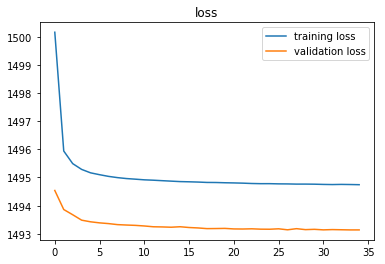

Plotting metrics...


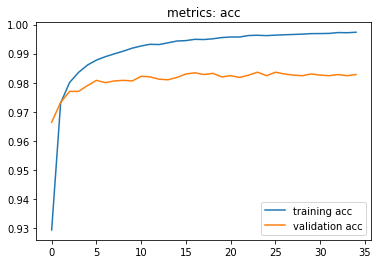

train {'acc': 0.9973091}
test {'acc': 0.9834}

Training student with temperature = 30 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 900 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15699255619358558527
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9385138586
locality {
  bus_id: 1
}
incarnation: 12936332911243769463
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2073.054 , acc = 0.3 
Epoch 1 , step 100 , loss= 1989.4751 , acc = 0.89 
Epoch 1 , step 200 , loss= 1999.2521 , acc = 0.95 
Epoch 1 , step 300 , loss= 1996.243 , acc = 0.91 
Epoch 1 , step 400 , loss= 1993.7853 , acc = 0.94 
Epoch 1 , step 500 , loss= 2006.6019 , acc = 0.94 
Epoch 1 , step 549 , loss= 1991.3241 val_loss= 1992.7706 , acc = 0.95 val acc = 0.9676 
Epoch 1 finished, loss= 2000.1877 val loss= 1992.7706 ,  acc = 0.92398185 val acc = 0.9676
val_acc improve

Epoch 17 , step 500 , loss= 1995.5615 , acc = 0.99 
Epoch 17 , step 549 , loss= 1993.0205 val_loss= 1990.8846 , acc = 1.0 val acc = 0.9816 
Epoch 17 finished, loss= 1993.1136 val loss= 1990.8846 ,  acc = 0.9908727 val acc = 0.9816

Epoch 18 , step 50 , loss= 1992.7369 , acc = 1.0 
Epoch 18 , step 150 , loss= 2003.8881 , acc = 0.97 
Epoch 18 , step 250 , loss= 2003.1703 , acc = 0.99 
Epoch 18 , step 350 , loss= 1986.5408 , acc = 0.99 
Epoch 18 , step 450 , loss= 1989.421 , acc = 1.0 
Epoch 18 , step 549 , loss= 2002.0796 val_loss= 1990.8932 , acc = 0.99 val acc = 0.9822 
Epoch 18 finished, loss= 1993.0878 val loss= 1990.8932 ,  acc = 0.99060005 val acc = 0.9822

Epoch 19 , step 0 , loss= 1980.559 , acc = 0.98 
Epoch 19 , step 100 , loss= 2005.0787 , acc = 1.0 
Epoch 19 , step 200 , loss= 2016.6141 , acc = 0.99 
Epoch 19 , step 300 , loss= 1992.2174 , acc = 1.0 
Epoch 19 , step 400 , loss= 1987.7286 , acc = 1.0 
Epoch 19 , step 500 , loss= 1992.5839 , acc = 1.0 
Epoch 19 , step 549 , los

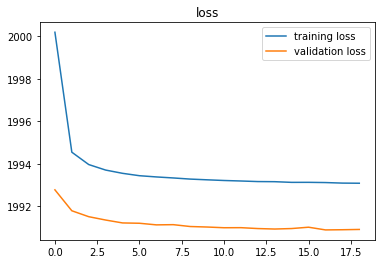

Plotting metrics...


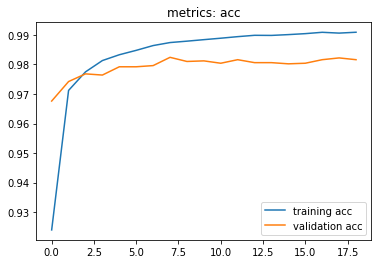

train {'acc': 0.9915091}
test {'acc': 0.9809}

{5: [{'acc': 0.9798}, {'acc': 0.9845}, {'acc': 0.9843}, {'acc': 0.9819}, {'acc': 0.9817}], 10: [{'acc': 0.9828}, {'acc': 0.9845}, {'acc': 0.9829}, {'acc': 0.9817}, {'acc': 0.9811}], 15: [{'acc': 0.9797}, {'acc': 0.9832}, {'acc': 0.9824}, {'acc': 0.9829}, {'acc': 0.982}], 20: [{'acc': 0.9797}, {'acc': 0.9845}, {'acc': 0.9838}, {'acc': 0.9827}, {'acc': 0.9823}], 25: [{'acc': 0.9808}, {'acc': 0.9854}, {'acc': 0.9827}, {'acc': 0.9831}, {'acc': 0.9815}], 30: [{'acc': 0.9849}, {'acc': 0.9831}, {'acc': 0.9833}, {'acc': 0.9834}, {'acc': 0.9809}]}


In [16]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])
temperatures = [5,10,15,20,25,30]

list_exp2 = []
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    coef_soft_losses = [0.0, 0.25, 0.5, 0.75, 1.0]#[1.0, 0.75, 0.5, 0.25, 0.0]
    tmp_effect = temperature**2 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True, gpu_id=gpu_id)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=100
            ,display_steps=100
            ,earlystop_params={'monitor':'val_acc', 'patience':10}
        )
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        # show result
        print('Student performance with',dict_exp)
        student.plt_loss()
        student.plt_metrics()
        print('train',train_metric)
        print('test',test_metric)
        print()
        list_exp2.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp2 = pd.DataFrame(list_exp2)
print(test_metrics)

In [17]:
print(df_exp2)
print(df_exp2['test_acc'].mean())

    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            1.00           0.00            5                  25    0.9798   
1            0.75           0.25            5                  25    0.9845   
2            0.50           0.50            5                  25    0.9843   
3            0.25           0.75            5                  25    0.9819   
4            0.00           1.00            5                  25    0.9817   
5            1.00           0.00           10                 100    0.9828   
6            0.75           0.25           10                 100    0.9845   
7            0.50           0.50           10                 100    0.9829   
8            0.25           0.75           10                 100    0.9817   
9            0.00           1.00           10                 100    0.9811   
10           1.00           0.00           15                 225    0.9797   
11           0.75           0.25           15       

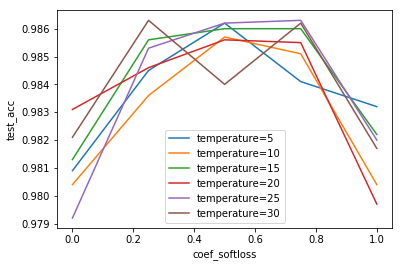

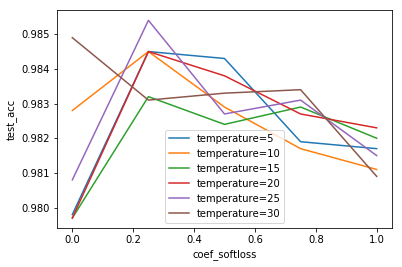

In [18]:
plot_trend(df_exp, label_x='coef_softloss', label_y='test_acc', label_line='temperature')
plot_trend(df_exp2, label_x='coef_softloss', label_y='test_acc', label_line='temperature')

In [19]:

# close_session(session)